Reading Data

In [1]:
# here the initial annotations will be manually confirmed and refined
import numpy as np
import pandas as pd
import seaborn as sns
import scanpy as sc
from glob import iglob
import anndata
import os
import sklearn
from sklearn.linear_model import LogisticRegression
import pickle
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(0)
sc.settings.verbosity = 3
sc.logging.print_versions()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sc.settings.set_figure_params(dpi = 180)

In [2]:
save_path = '/lustre/scratch117/cellgen/team292/ab55/'

In [3]:
adata = anndata.read_h5ad(save_path + "N3-pbmc-initial-clustering.h5ad")
adata

AnnData object with n_obs × n_vars = 97499 × 22572
    obs: 'souporcell', 'demultiplexed', 'sample_names', 'log2p1_count', 'percent_mito', 'n_genes', 'batch', 'FolderName', 'Lane', 'Sort', 'Type', 'Donor Id', 'Age', 'Sex', 'Race', 'Ethnicity', 'BMI', 'Pre-existing heart disease', 'Pre-existing lung disease', 'Pre-existing kidney disease', 'Pre-existing diabetes', 'Pre-existing Hypertension', 'Pre-existing immunocompromised condition', 'Smoking', 'SARS-CoV-2 PCR', 'SARS-CoV-2 Ab', 'Symptomatic', 'Admitted to hospital', 'Highest level of respiratory support', 'Vasoactive agents required during hospitalization', '28-day death', 'scrublet_pred', 'scrublet_local_pred', 'scrublet_score', 'scrublet_cluster_score', 'filtered_cells', 'S_score', 'G2M_score', 'phase', 'leiden_sampl_cc', 'leidenres2_sampl_cc', 'DonorSubset', 'leiden_scvi_subset_cc', 'leidenres2_scvi_subset_cc', 'leiden_tvi_subset_cc', 'leidenres2_tvi_subset_cc', 'louvain', 'Celltype_Predictions', 'Prediction_Probabilities', 'louva

In [4]:
np.unique(adata.obs['General_Celltype'])

array(['CD14 mono', 'CD16 mono', 'DC', 'Exhausted B', 'HSC', 'Memory B',
       'NK', 'Naïve B', 'Neutrophil', 'Plasma B', 'Plasmablast',
       'Platelets', 'RBC', 'T-cells', 'pDC'], dtype=object)

NK Cells

In [4]:
adata_NK = adata[adata.obs['General_Celltype'] == 'NK'].copy()
adata_NK

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


AnnData object with n_obs × n_vars = 12356 × 22572
    obs: 'souporcell', 'demultiplexed', 'sample_names', 'log2p1_count', 'percent_mito', 'n_genes', 'batch', 'FolderName', 'Lane', 'Sort', 'Type', 'Donor Id', 'Age', 'Sex', 'Race', 'Ethnicity', 'BMI', 'Pre-existing heart disease', 'Pre-existing lung disease', 'Pre-existing kidney disease', 'Pre-existing diabetes', 'Pre-existing Hypertension', 'Pre-existing immunocompromised condition', 'Smoking', 'SARS-CoV-2 PCR', 'SARS-CoV-2 Ab', 'Symptomatic', 'Admitted to hospital', 'Highest level of respiratory support', 'Vasoactive agents required during hospitalization', '28-day death', 'scrublet_pred', 'scrublet_local_pred', 'scrublet_score', 'scrublet_cluster_score', 'filtered_cells', 'S_score', 'G2M_score', 'phase', 'leiden_sampl_cc', 'leidenres2_sampl_cc', 'DonorSubset', 'leiden_scvi_subset_cc', 'leidenres2_scvi_subset_cc', 'leiden_tvi_subset_cc', 'leidenres2_tvi_subset_cc', 'louvain', 'Celltype_Predictions', 'Prediction_Probabilities', 'louva

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:21)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 10 clusters and added
    'louvain_NK', the cluster labels (adata.obs, categorical) (0:00:00)


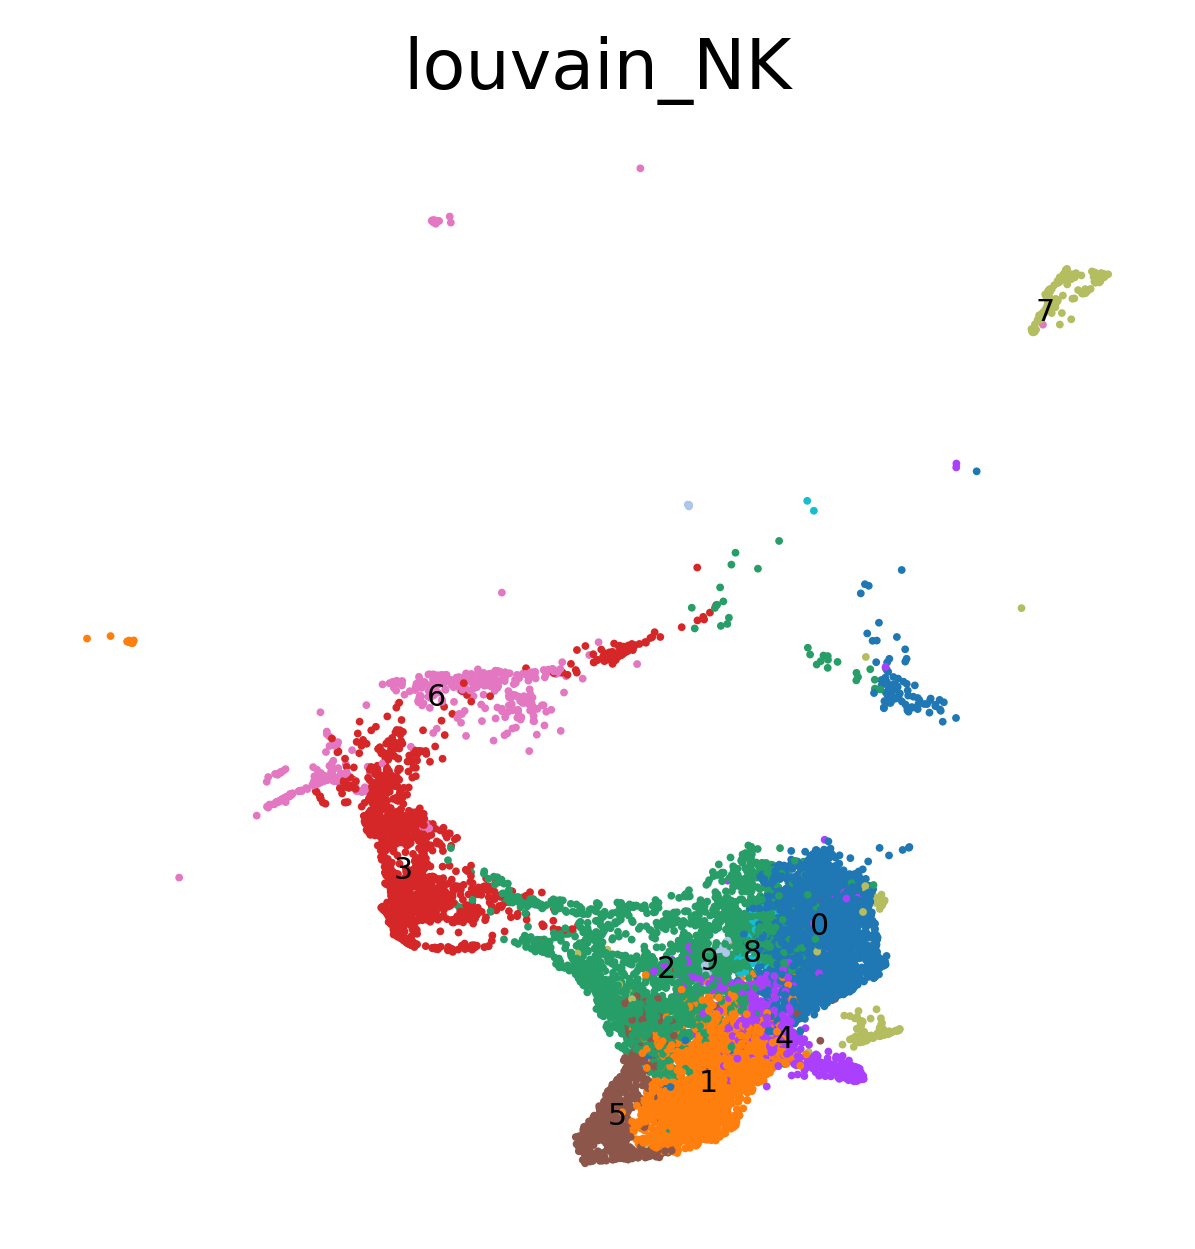

In [6]:
# subcluster cell types using known cell-specific marker genes
sc.tl.louvain(adata_NK, key_added = 'louvain_NK', resolution = 0.3)
sc.pl.umap(adata_NK, color = ["louvain_NK"], legend_loc = 'on data', legend_fontweight = 'normal', legend_fontsize = 6, frameon = False)

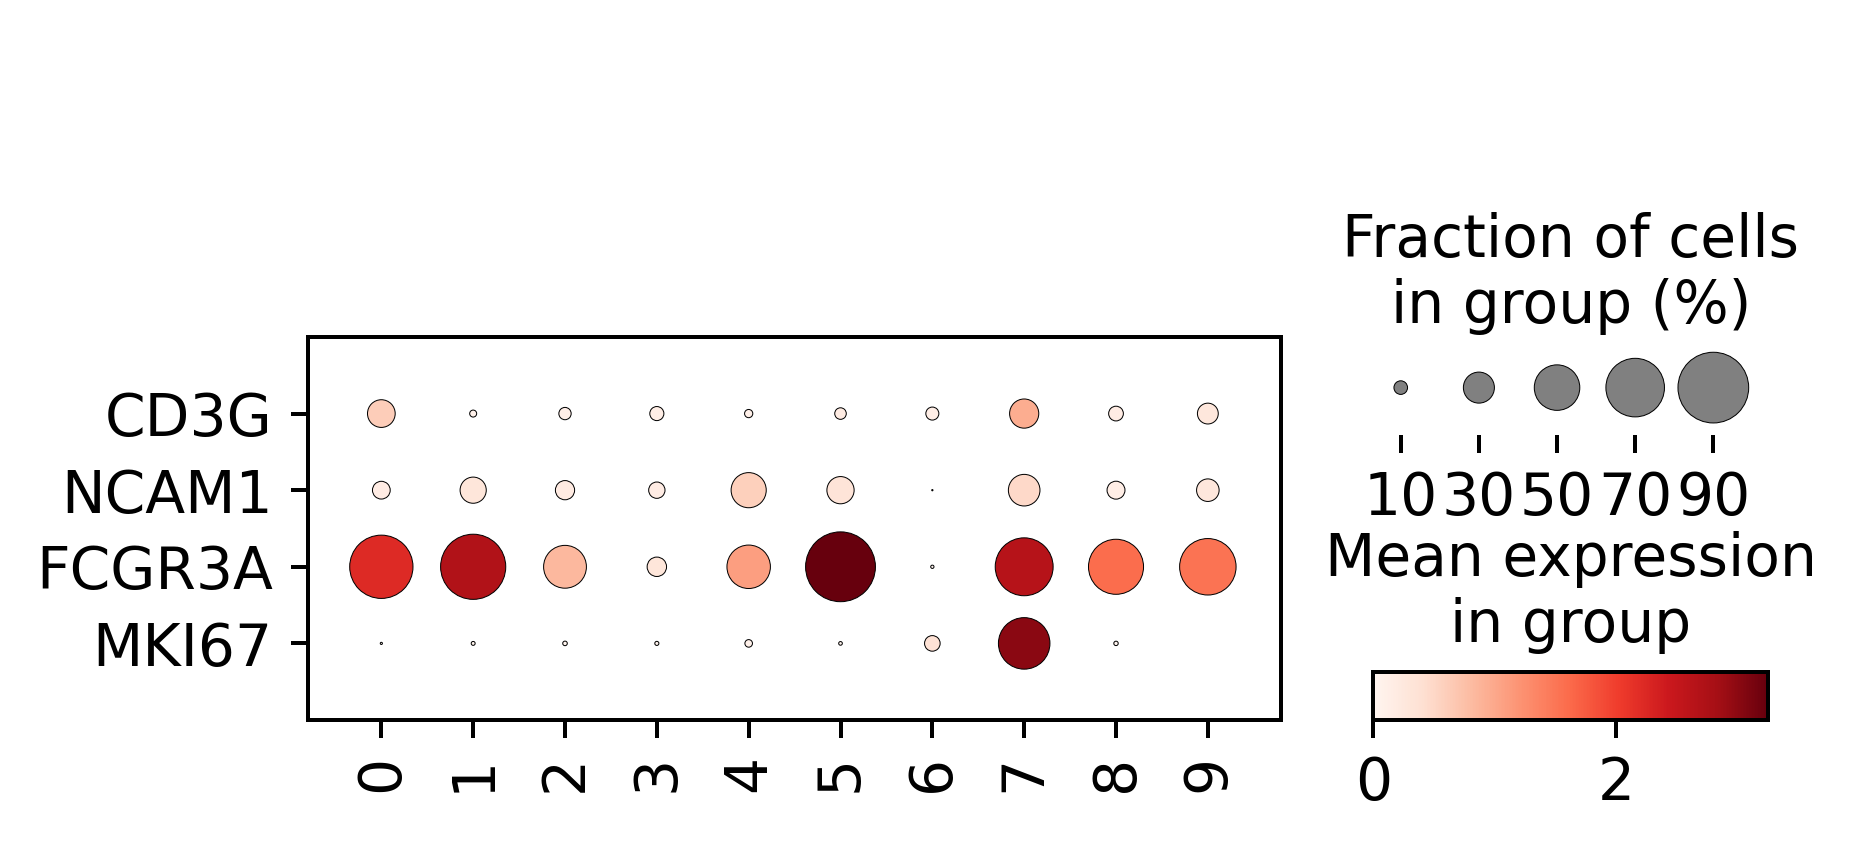

In [18]:
sc.pl.dotplot(adata_NK, var_names = ['CD3G','NCAM1','FCGR3A','MKI67'], groupby = 'louvain_NK', swap_axes = True)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 17 clusters and added
    'louvain_NK_0', the cluster labels (adata.obs, categorical) (0:00:00)


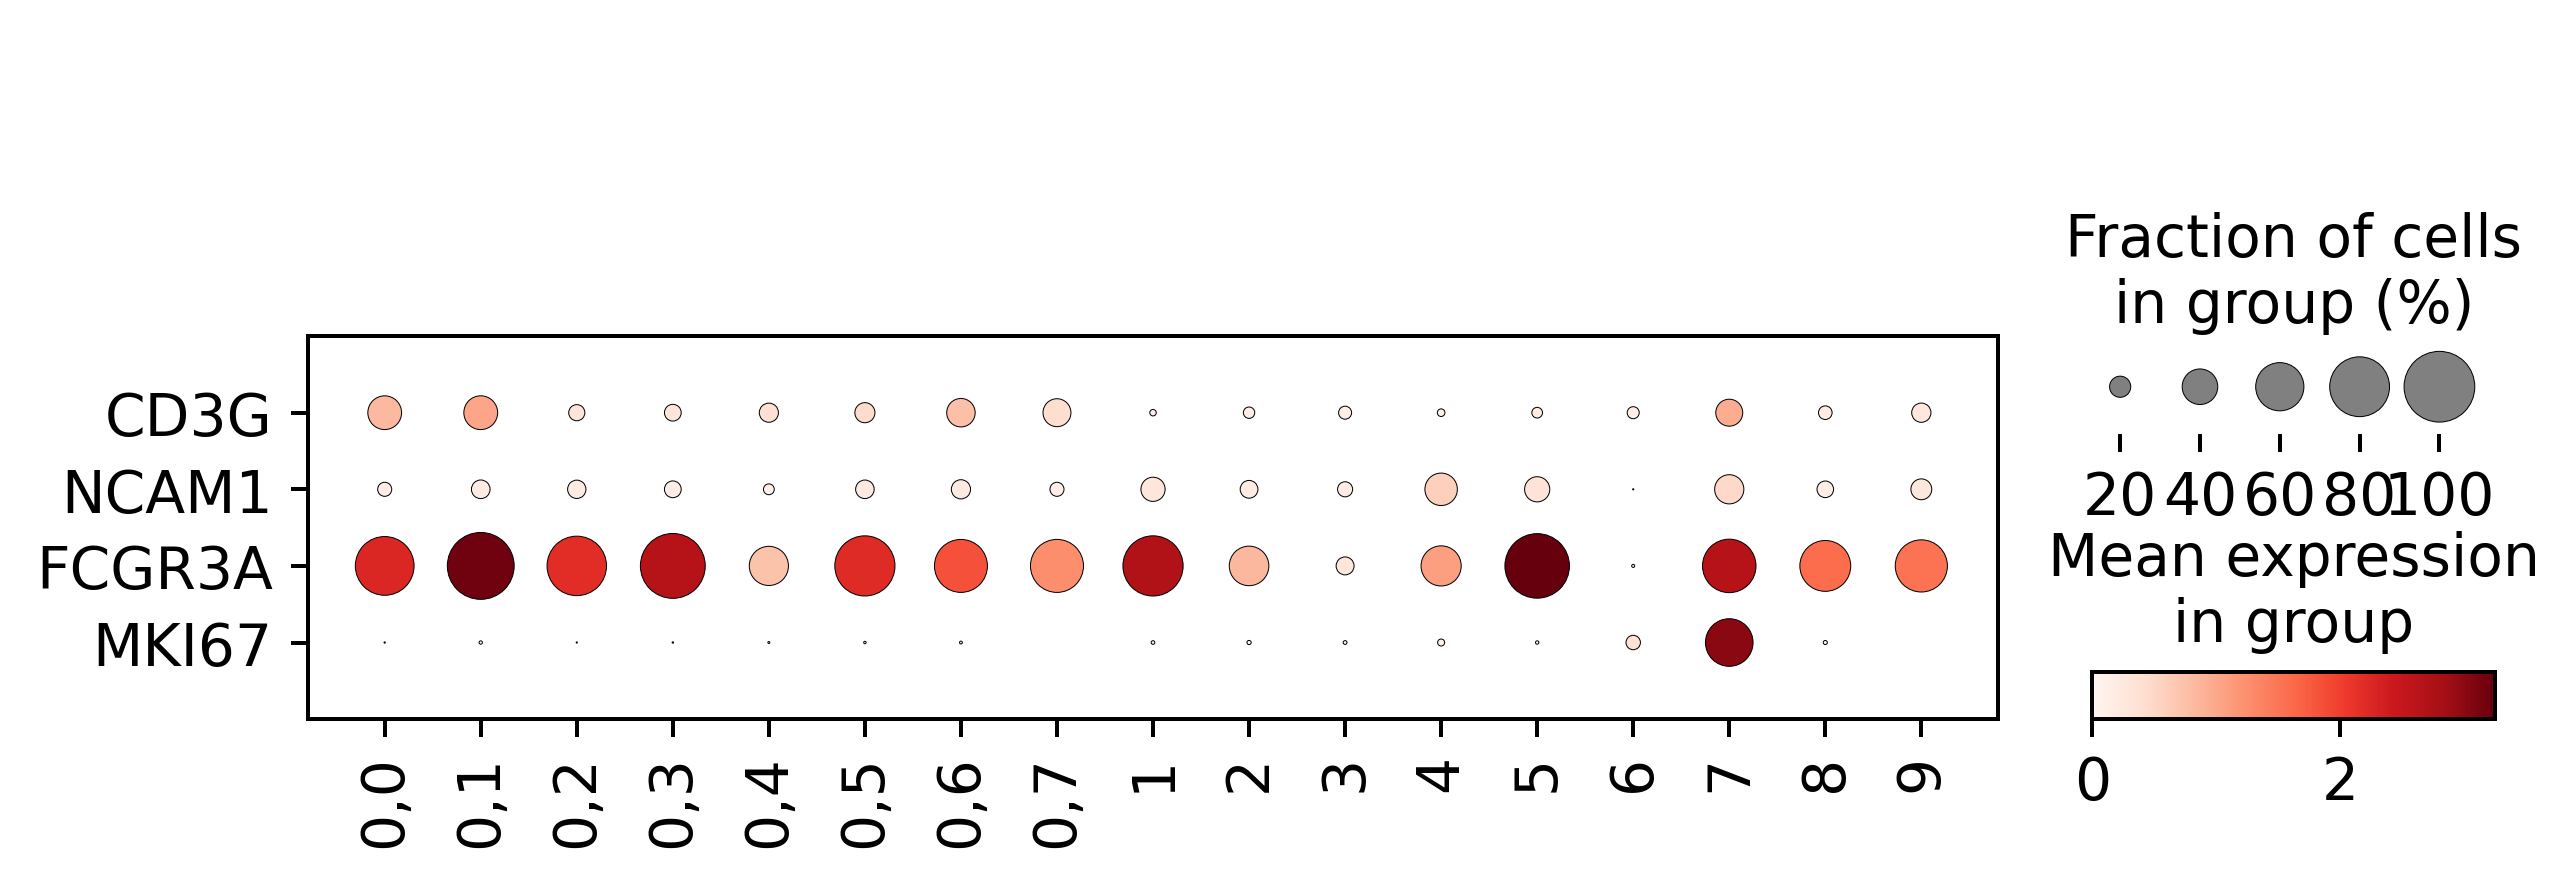

In [7]:
# zoom-in on cluster 0
sc.tl.louvain(adata_NK, restrict_to=('louvain_NK',['0']), key_added='louvain_NK_0', resolution=0.5)
sc.pl.dotplot(adata_NK, var_names = ['CD3G','NCAM1','FCGR3A','MKI67'], groupby = 'louvain_NK_0', swap_axes = True)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 17 clusters and added
    'louvain_NK_2', the cluster labels (adata.obs, categorical) (0:00:00)


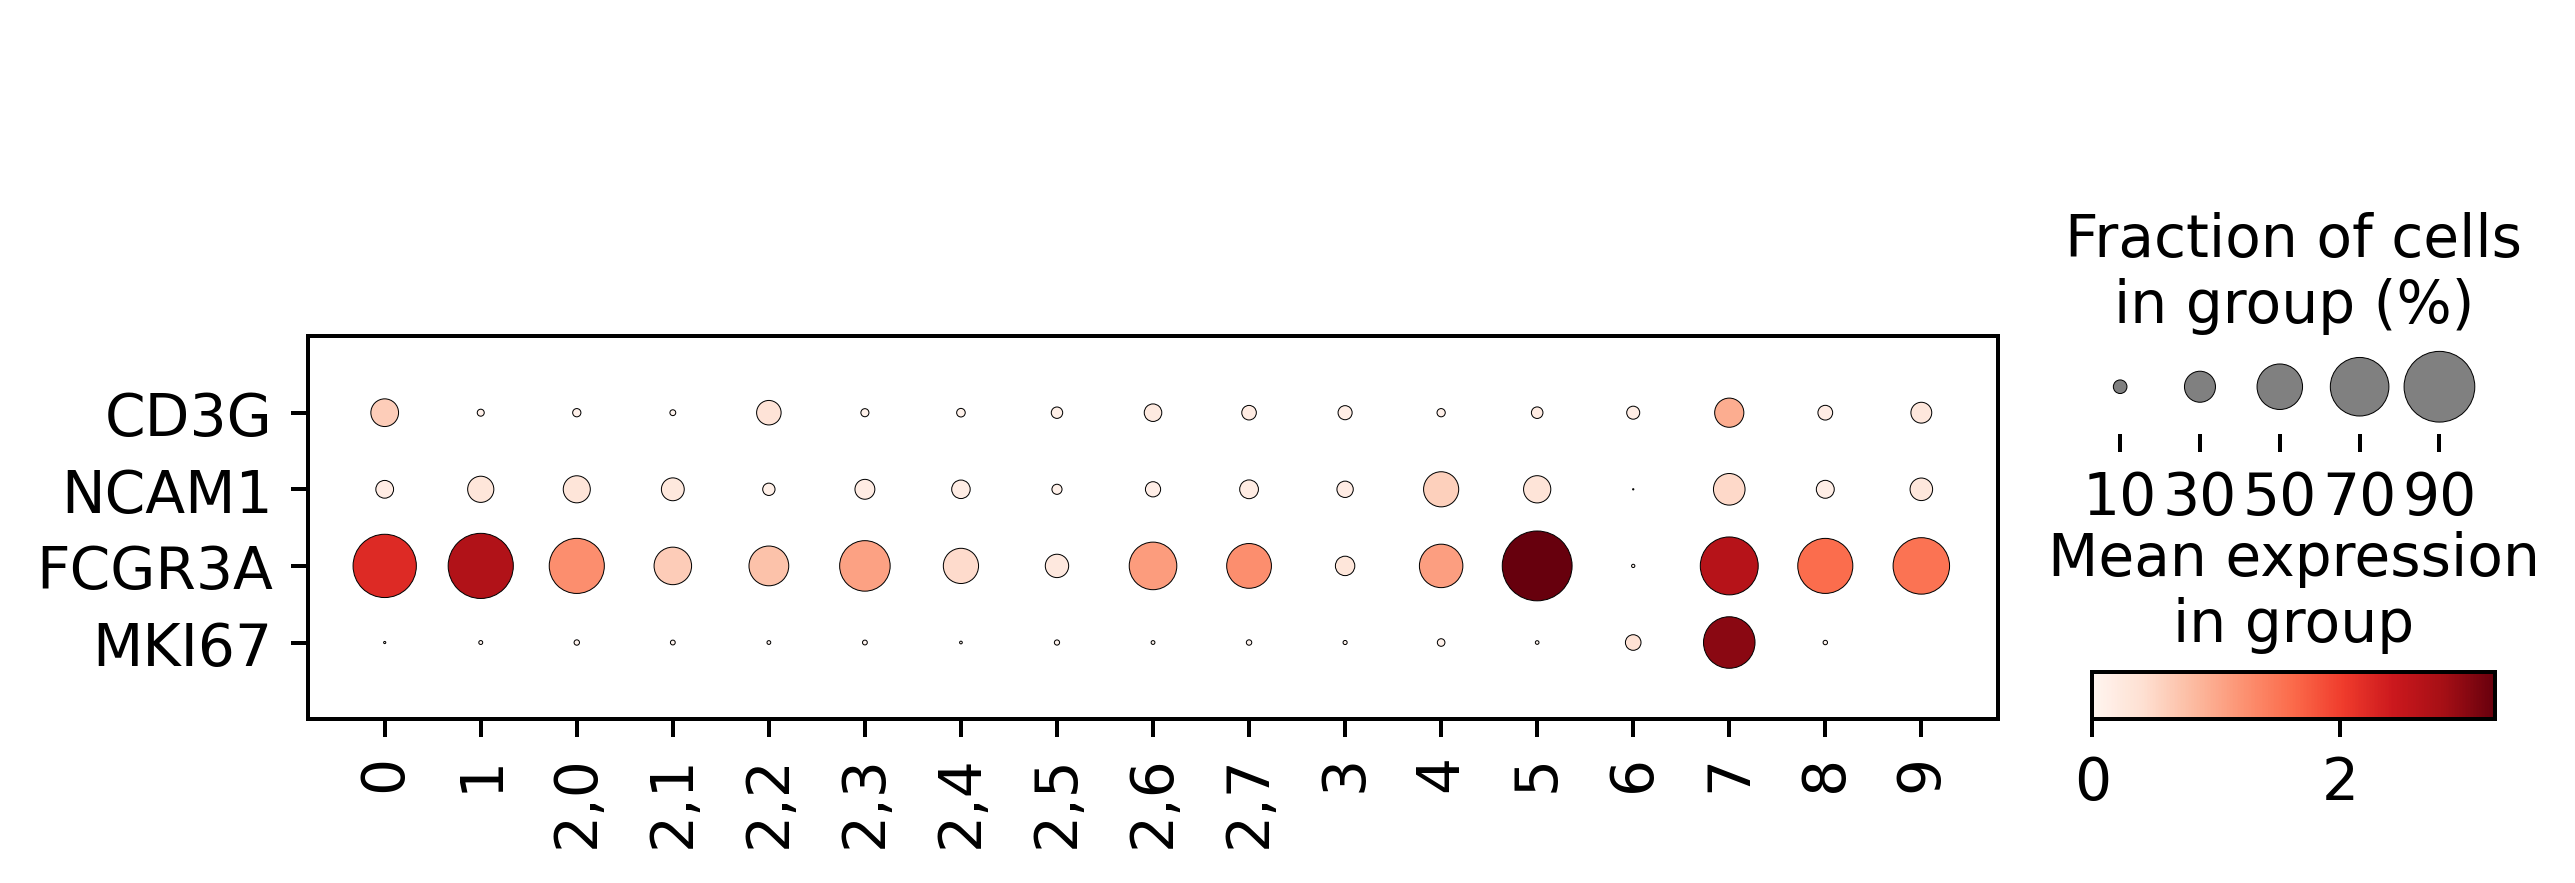

In [8]:
# zoom-in on cluster 2
sc.tl.louvain(adata_NK, restrict_to=('louvain_NK',['2']), key_added='louvain_NK_2', resolution=0.5)
sc.pl.dotplot(adata_NK, var_names = ['CD3G','NCAM1','FCGR3A','MKI67'], groupby = 'louvain_NK_2', swap_axes = True)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 18 clusters and added
    'louvain_NK_7', the cluster labels (adata.obs, categorical) (0:00:00)


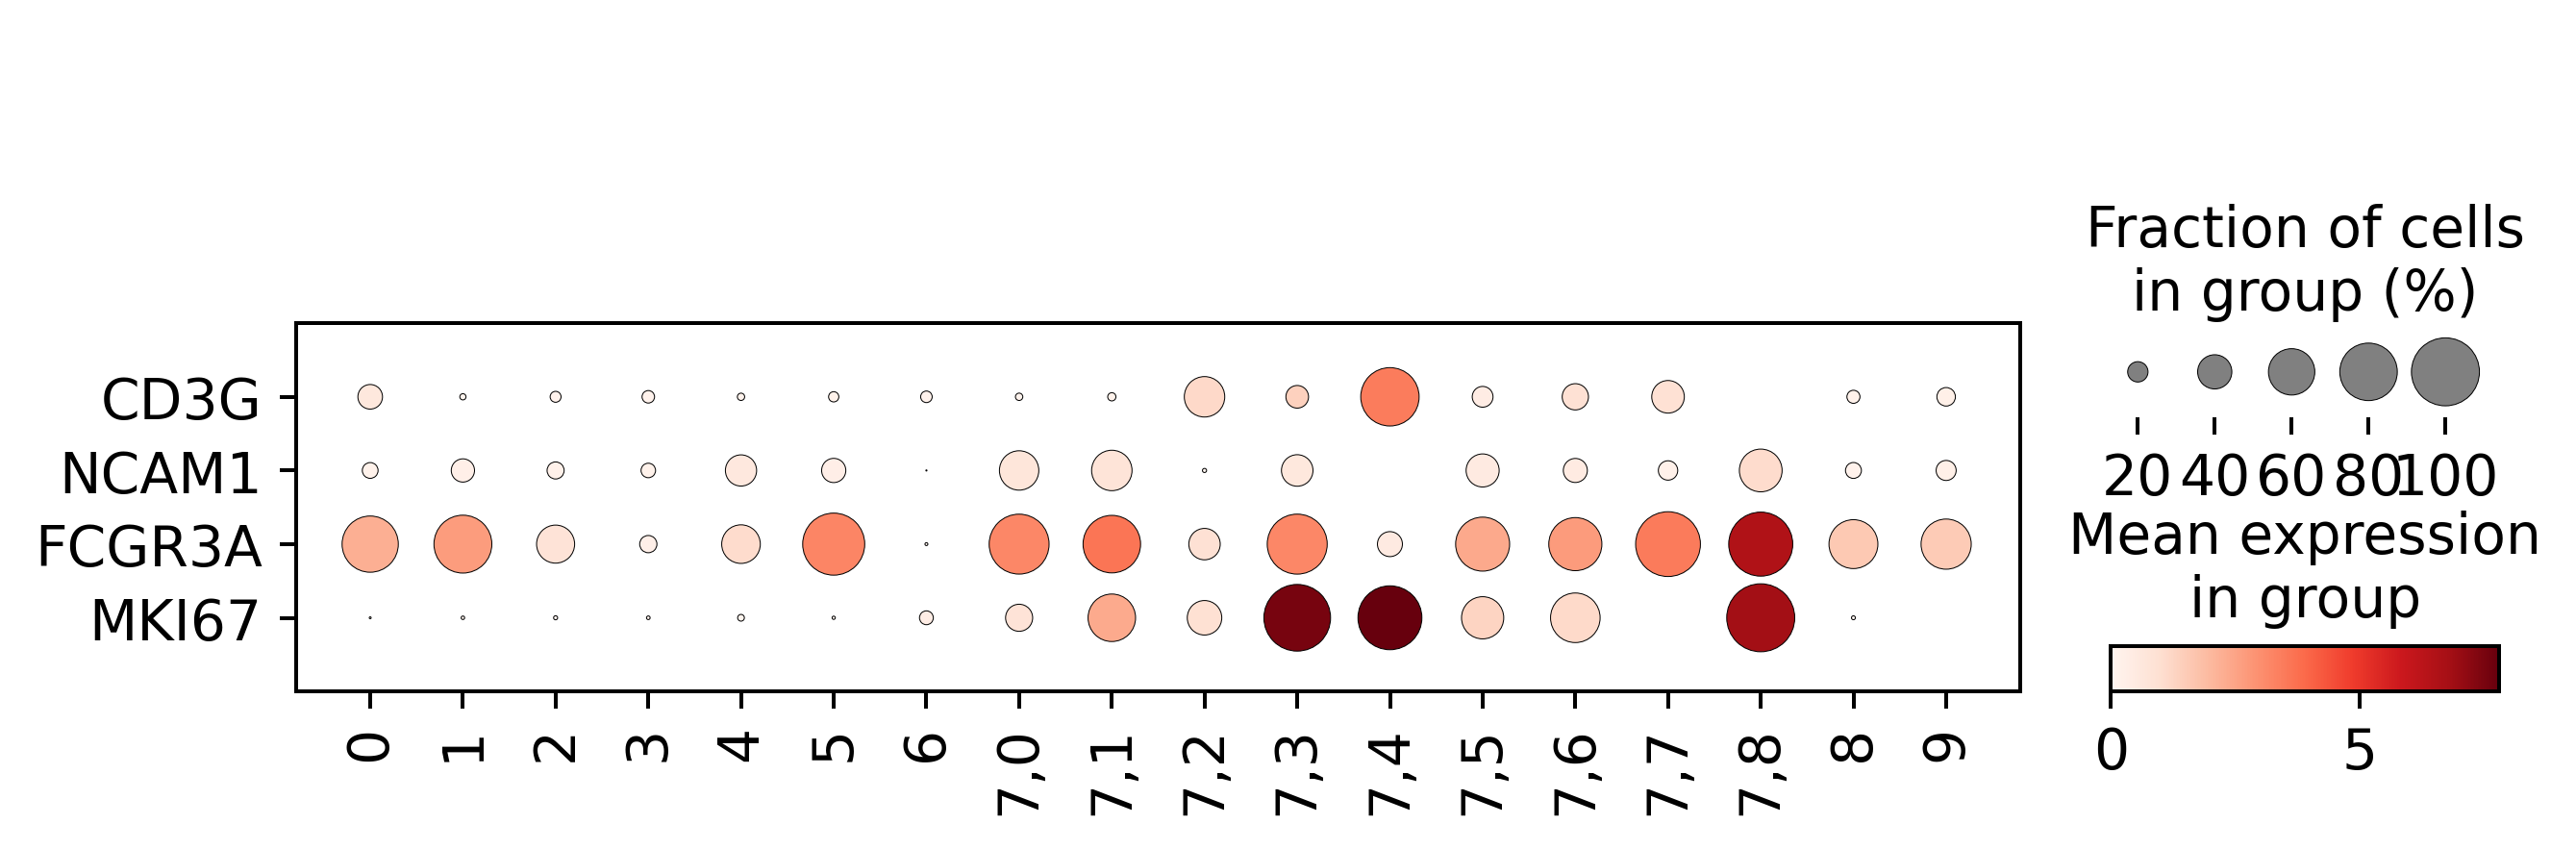

In [9]:
# zoom-in on cluster 7
sc.tl.louvain(adata_NK, restrict_to=('louvain_NK',['7']), key_added='louvain_NK_7', resolution=0.8)
sc.pl.dotplot(adata_NK, var_names = ['CD3G','NCAM1','FCGR3A','MKI67'], groupby = 'louvain_NK_7', swap_axes = True)

In [10]:
# define subclusters
def Annotation_NK(adata_obj, barcode):
    
    curr_louvain_coarse = adata_obj.obs.loc[barcode,'louvain_NK']

    if curr_louvain_coarse == '0':
        zoomed_in_louvain = adata_obj.obs.loc[barcode,'louvain_NK_0']
        if zoomed_in_louvain in ['0,0', '0,1', '0,6', '0,7']:
            return('NKT')
        elif zoomed_in_louvain in ['0,2', '0,3', '0,4', '0,5']:
            return('NK CD56(dim)')
        
    elif curr_louvain_coarse in ['1', '5', '8', '9']:
        return('NK CD56(dim)')

    elif curr_louvain_coarse == '2':
        zoomed_in_louvain = adata_obj.obs.loc[barcode,'louvain_NK_2']
        if zoomed_in_louvain in ['2,0', '2,2', '2,3', '2,6', '2,7']:
            return('NK CD56(dim)')
        elif zoomed_in_louvain in ['2,1', '2,4', '2,5']:
            return('NK CD56(bright)')
        
    elif curr_louvain_coarse in ['3', '4']:
        return('NK CD56(bright)')
    
    elif curr_louvain_coarse in ['6']:
        return('NK CD56(dim)')
    
    elif curr_louvain_coarse == '7':
        zoomed_in_louvain = adata_obj.obs.loc[barcode,'louvain_NK_7']
        if zoomed_in_louvain in ['7,0', '7,1', '7,3', '7,5', '7,6', '7,8']:
            return('Prolif NK')
        elif zoomed_in_louvain in ['7,7']:
            return('NKT')
        elif zoomed_in_louvain in ['7,2', '7,4']:
            return('Prolif T')

    else:
        return('Unassigned')

In [11]:
# add annotations to object to tranfer at the end
adata_NK.obs['barcode'] = adata_NK.obs.index
adata_NK.obs['NK_Celltype'] = adata_NK.obs['barcode'].apply(lambda x: Annotation_NK(adata_NK, x))

... storing 'NK_Celltype' as categorical


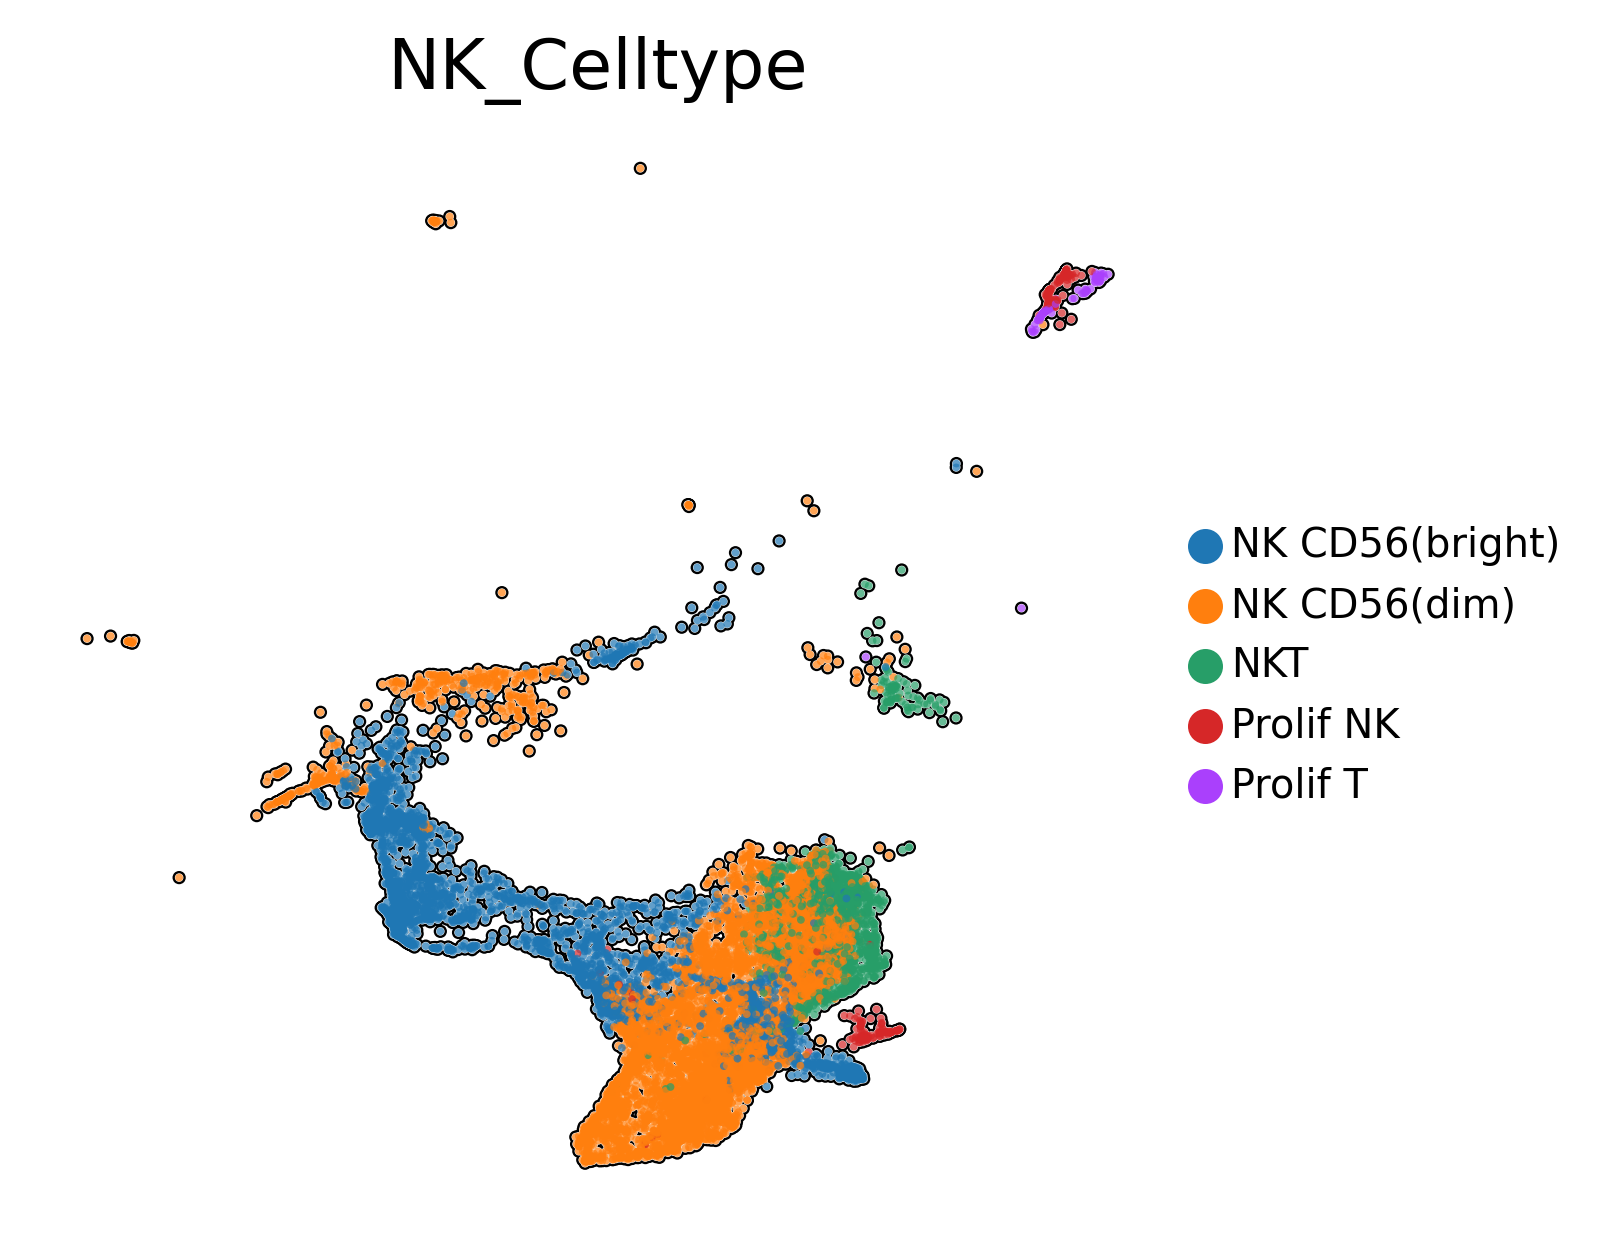

In [12]:
sc.pl.umap(adata_NK, color=['NK_Celltype'], legend_fontsize = 8, frameon = False, add_outline = True)

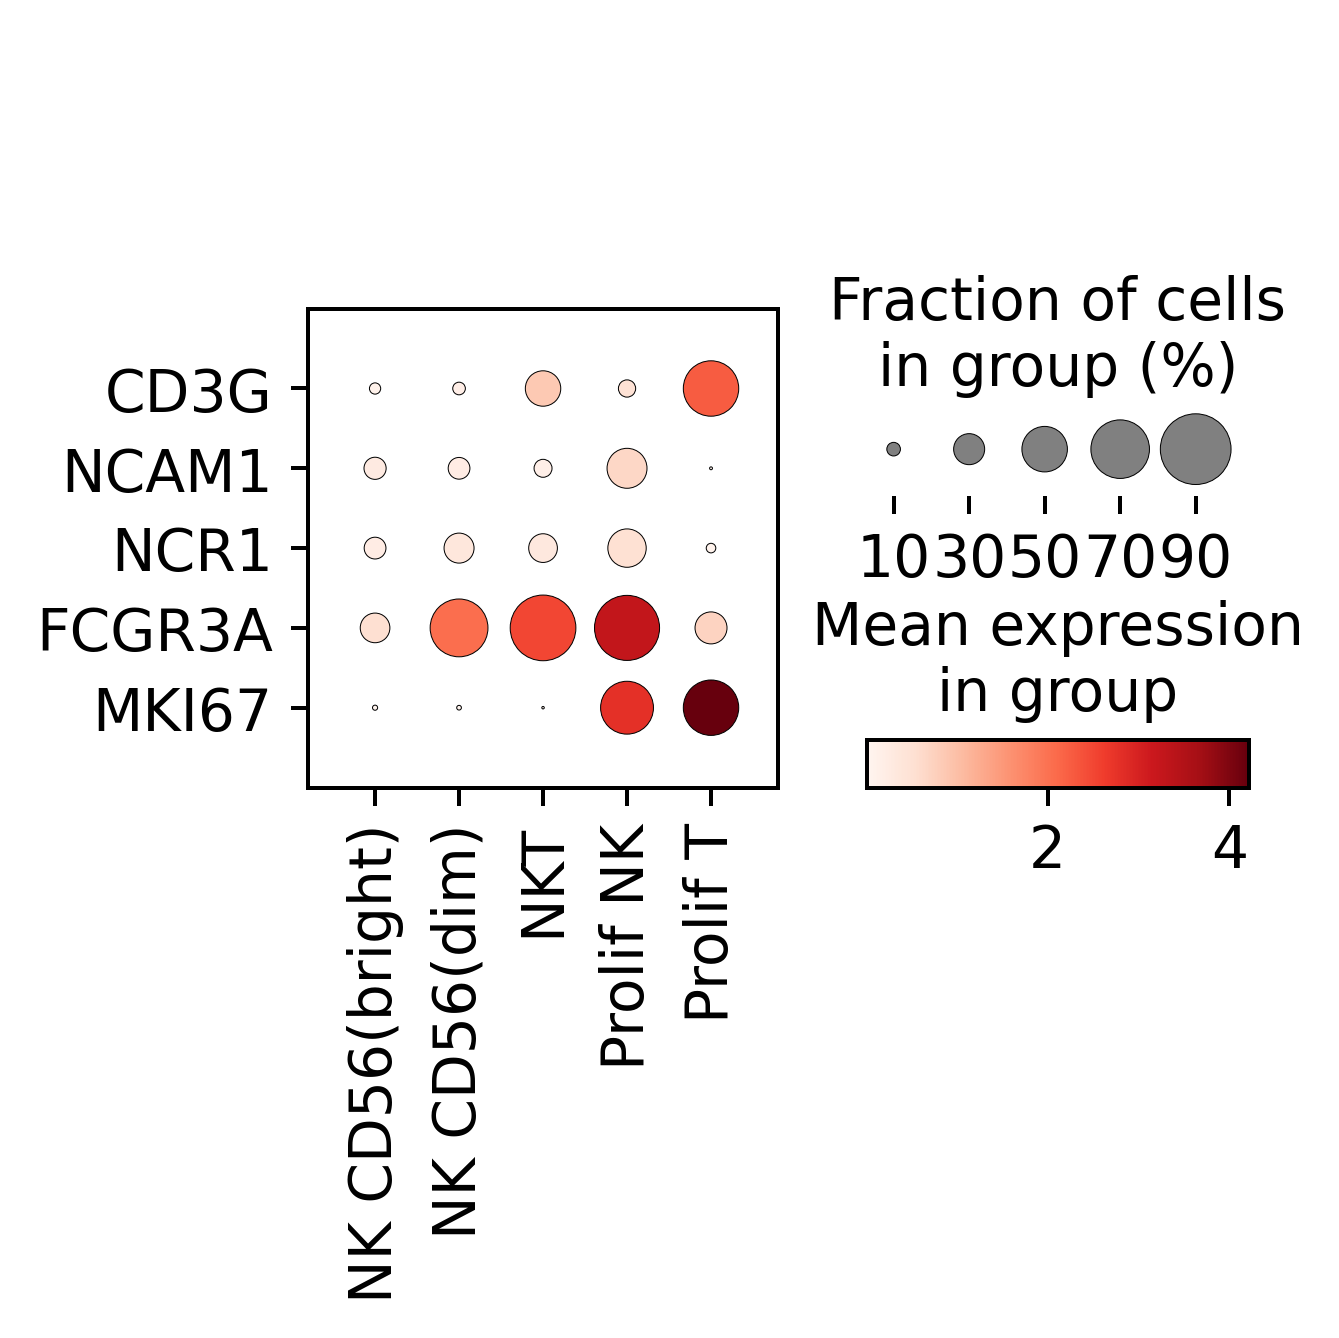

In [13]:
sc.pl.dotplot(adata_NK, var_names = ['CD3G','NCAM1','NCR1','FCGR3A','MKI67'], groupby = 'NK_Celltype', swap_axes = True)

DCs

In [18]:
adata_DC = adata[adata.obs['General_Celltype'] == 'DC'].copy()
adata_DC

AnnData object with n_obs × n_vars = 543 × 22572
    obs: 'souporcell', 'demultiplexed', 'sample_names', 'log2p1_count', 'percent_mito', 'n_genes', 'batch', 'FolderName', 'Lane', 'Sort', 'Type', 'Donor Id', 'Age', 'Sex', 'Race', 'Ethnicity', 'BMI', 'Pre-existing heart disease', 'Pre-existing lung disease', 'Pre-existing kidney disease', 'Pre-existing diabetes', 'Pre-existing Hypertension', 'Pre-existing immunocompromised condition', 'Smoking', 'SARS-CoV-2 PCR', 'SARS-CoV-2 Ab', 'Symptomatic', 'Admitted to hospital', 'Highest level of respiratory support', 'Vasoactive agents required during hospitalization', '28-day death', 'scrublet_pred', 'scrublet_local_pred', 'scrublet_score', 'scrublet_cluster_score', 'filtered_cells', 'S_score', 'G2M_score', 'phase', 'leiden_sampl_cc', 'leidenres2_sampl_cc', 'DonorSubset', 'leiden_scvi_subset_cc', 'leidenres2_scvi_subset_cc', 'leiden_tvi_subset_cc', 'leidenres2_tvi_subset_cc', 'louvain', 'Celltype_Predictions', 'Prediction_Probabilities', 'louvain

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 17 clusters and added
    'louvain_DC', the cluster labels (adata.obs, categorical) (0:00:00)


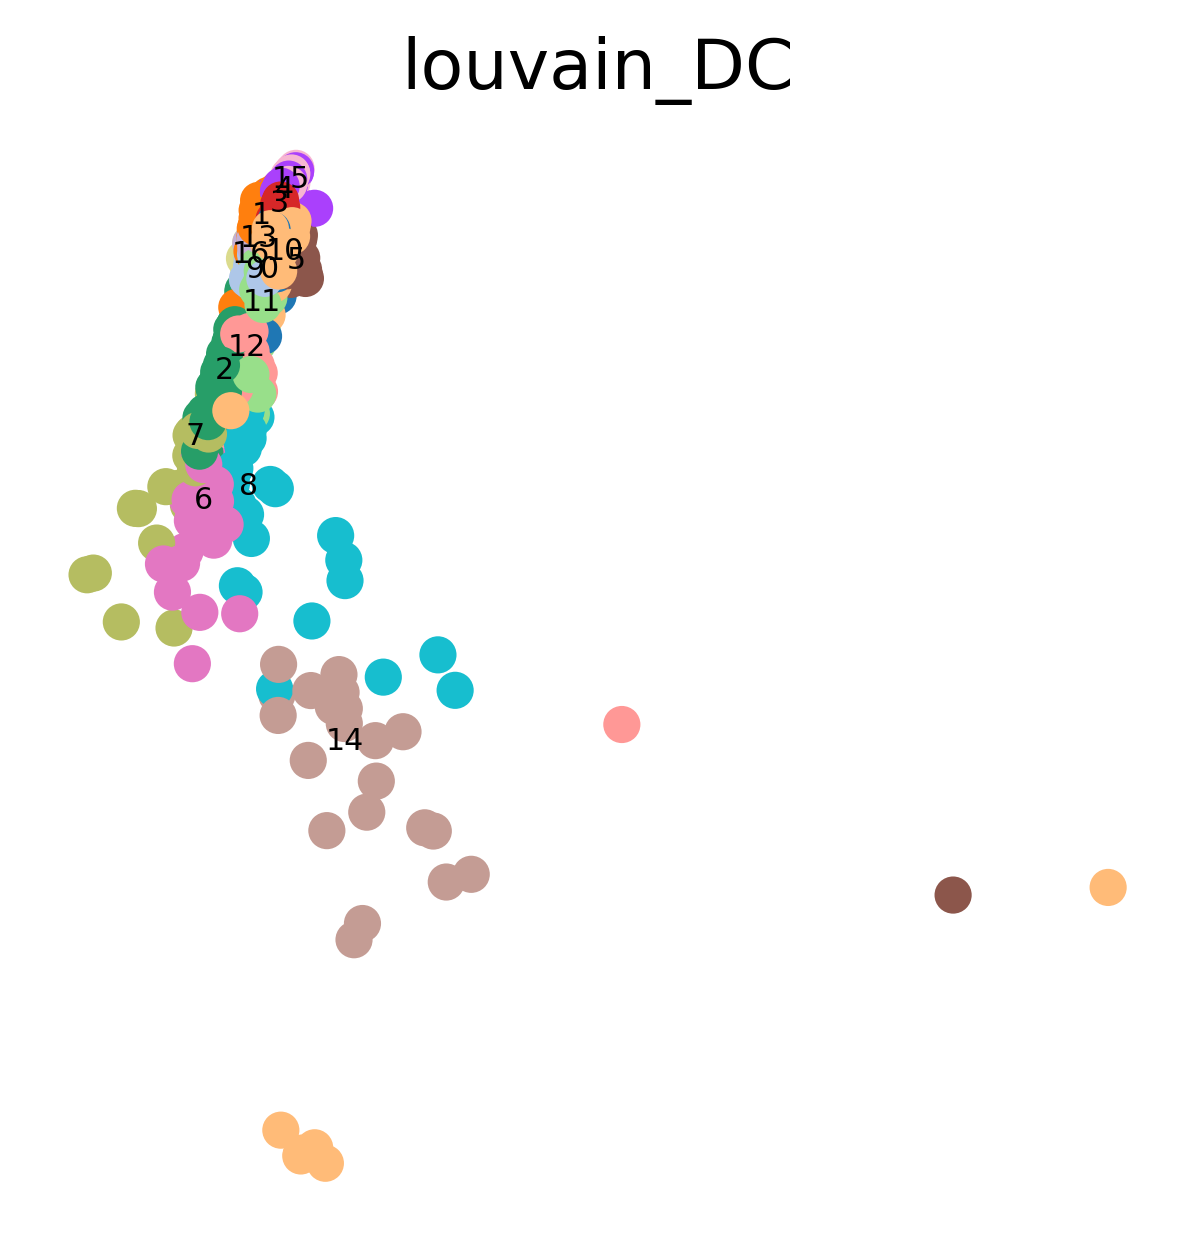

In [21]:
# subcluster cell types using known cell-specific marker genes
sc.tl.louvain(adata_DC, key_added = 'louvain_DC', resolution = 2)
sc.pl.umap(adata_DC, color=["louvain_DC"], legend_loc = 'on data', legend_fontweight = 'normal', legend_fontsize = 6, frameon = False)

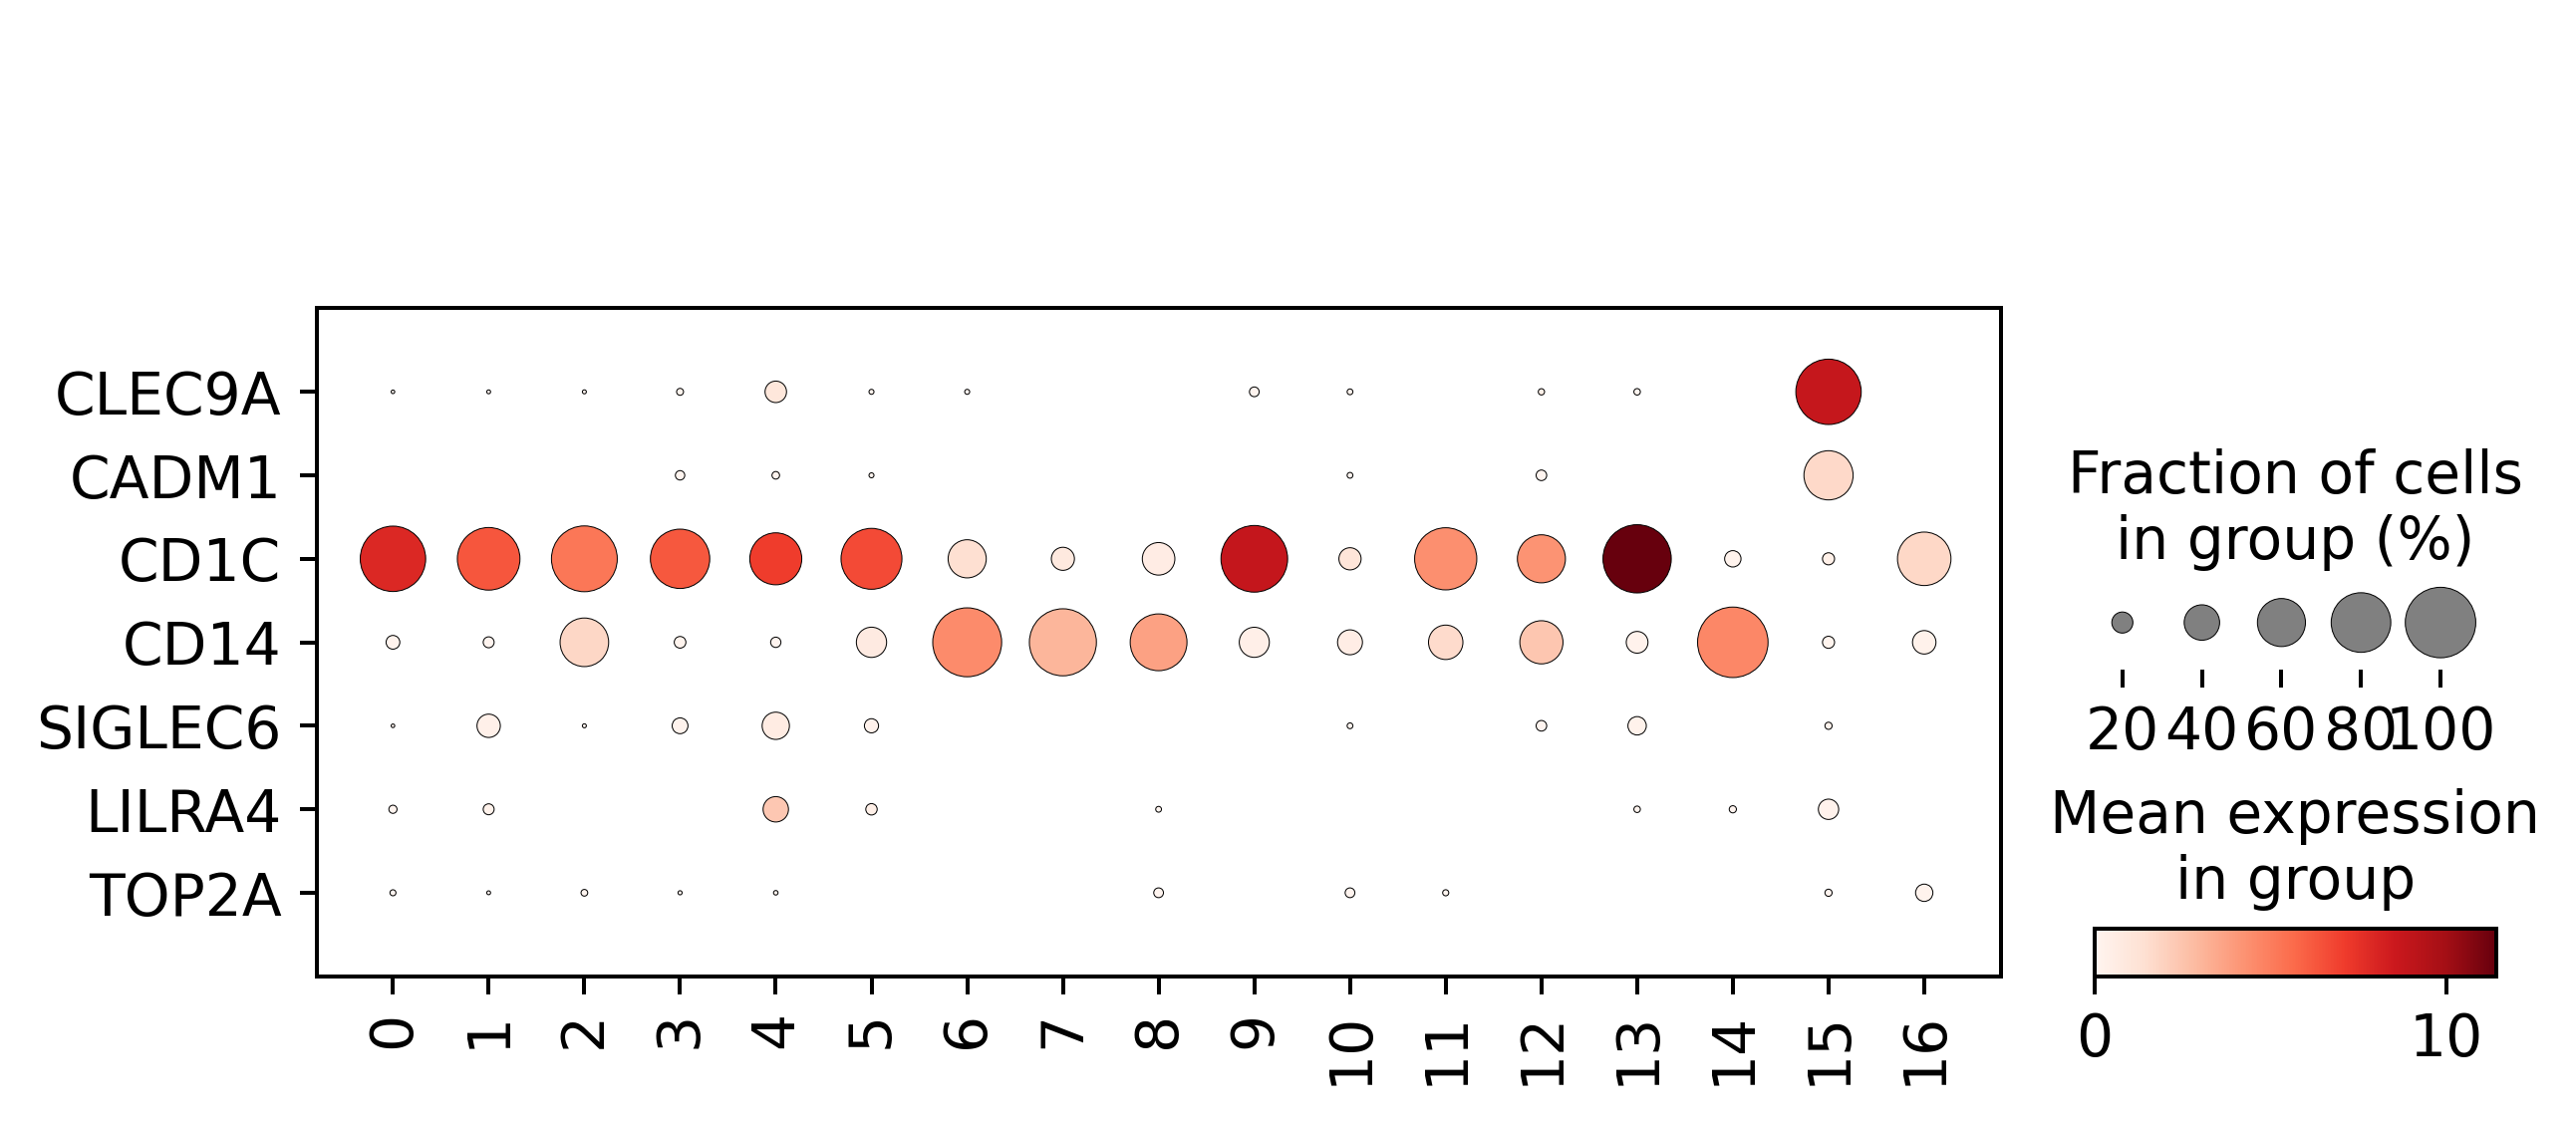

In [123]:
sc.pl.dotplot(adata_DC, var_names = ['CLEC9A', 'CADM1', 'CD1C', 'CD14','SIGLEC6', 'LILRA4', 'TOP2A'], groupby = 'louvain_DC', swap_axes = True)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 30 clusters and added
    'louvain_DC_4', the cluster labels (adata.obs, categorical) (0:00:00)


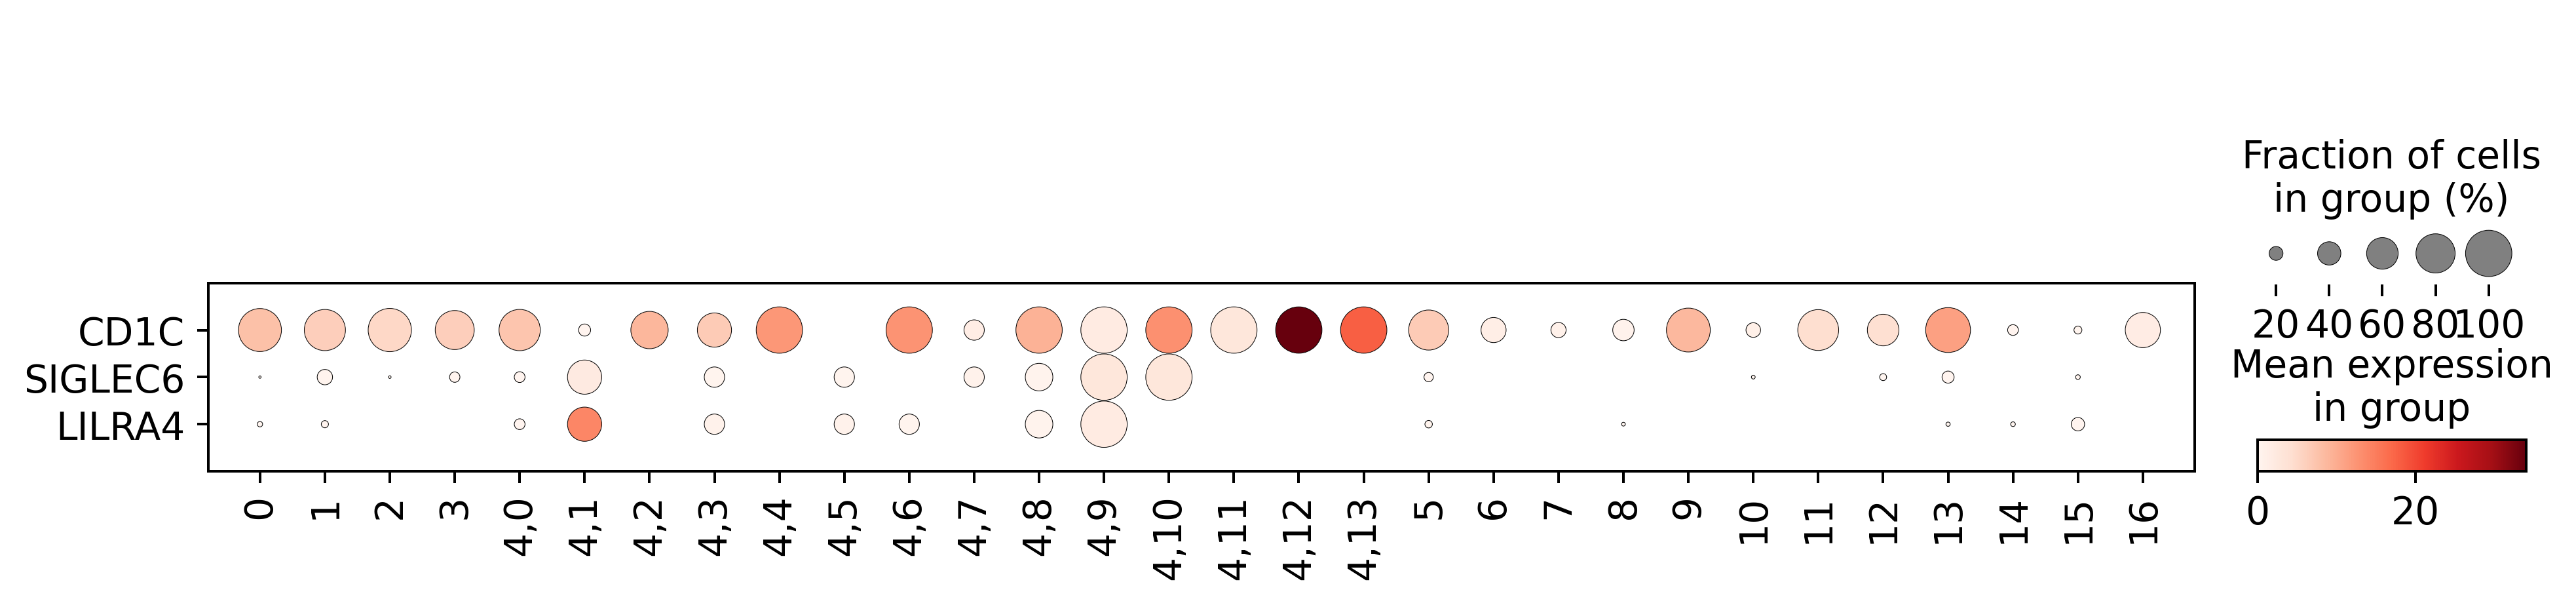

In [22]:
# zoom-in on cluster 4
sc.tl.louvain(adata_DC, restrict_to = ('louvain_DC',['4']), key_added = 'louvain_DC_4', resolution = 3)
sc.pl.dotplot(adata_DC, var_names = ['CD1C', 'SIGLEC6', 'LILRA4'], groupby = 'louvain_DC_4', swap_axes = True)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 44 clusters and added
    'louvain_DC_5', the cluster labels (adata.obs, categorical) (0:00:00)


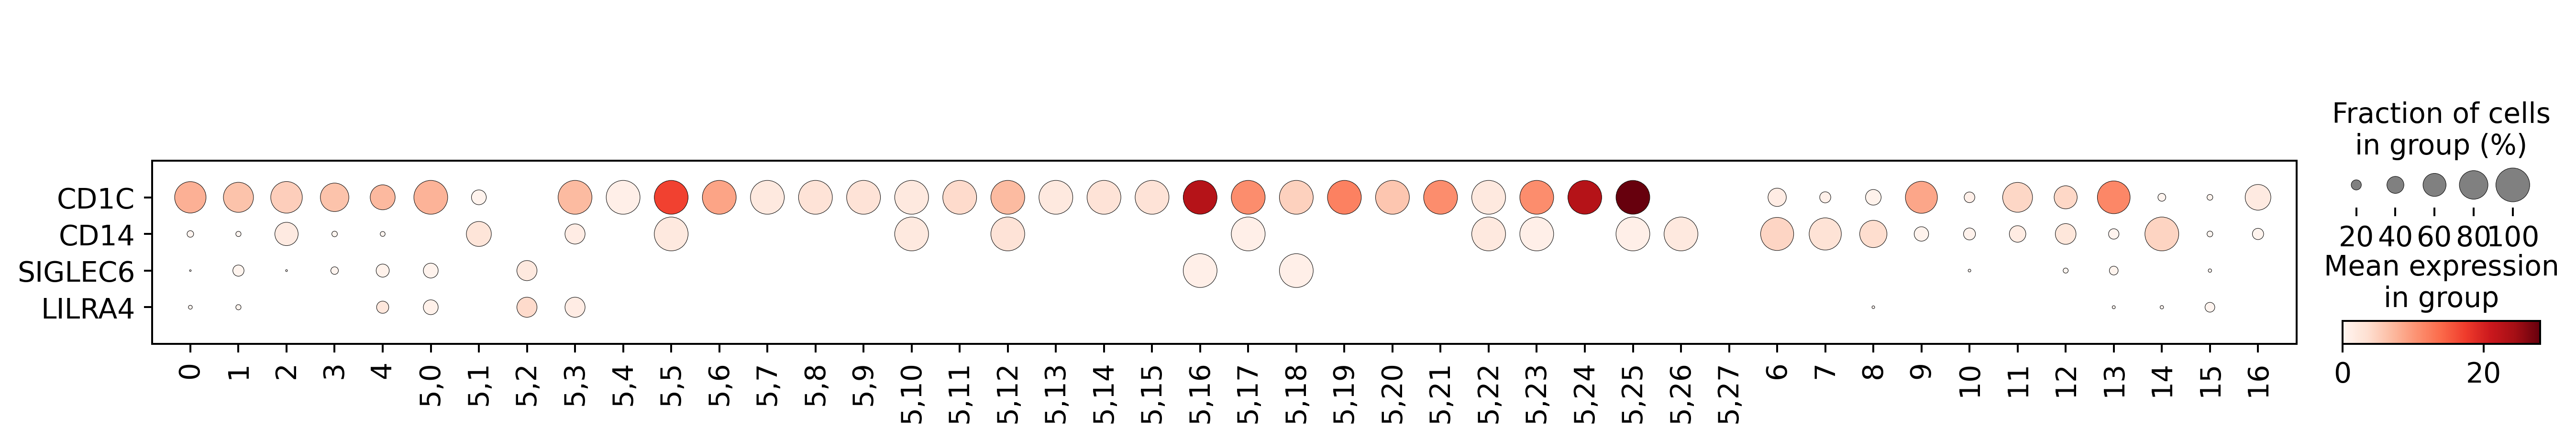

In [23]:
# zoom-in on cluster 5
sc.tl.louvain(adata_DC, restrict_to = ('louvain_DC',['5']), key_added = 'louvain_DC_5', resolution = 5)
sc.pl.dotplot(adata_DC, var_names = ['CD1C', 'CD14','SIGLEC6', 'LILRA4'], groupby = 'louvain_DC_5', swap_axes = True)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 23 clusters and added
    'louvain_DC_9', the cluster labels (adata.obs, categorical) (0:00:00)


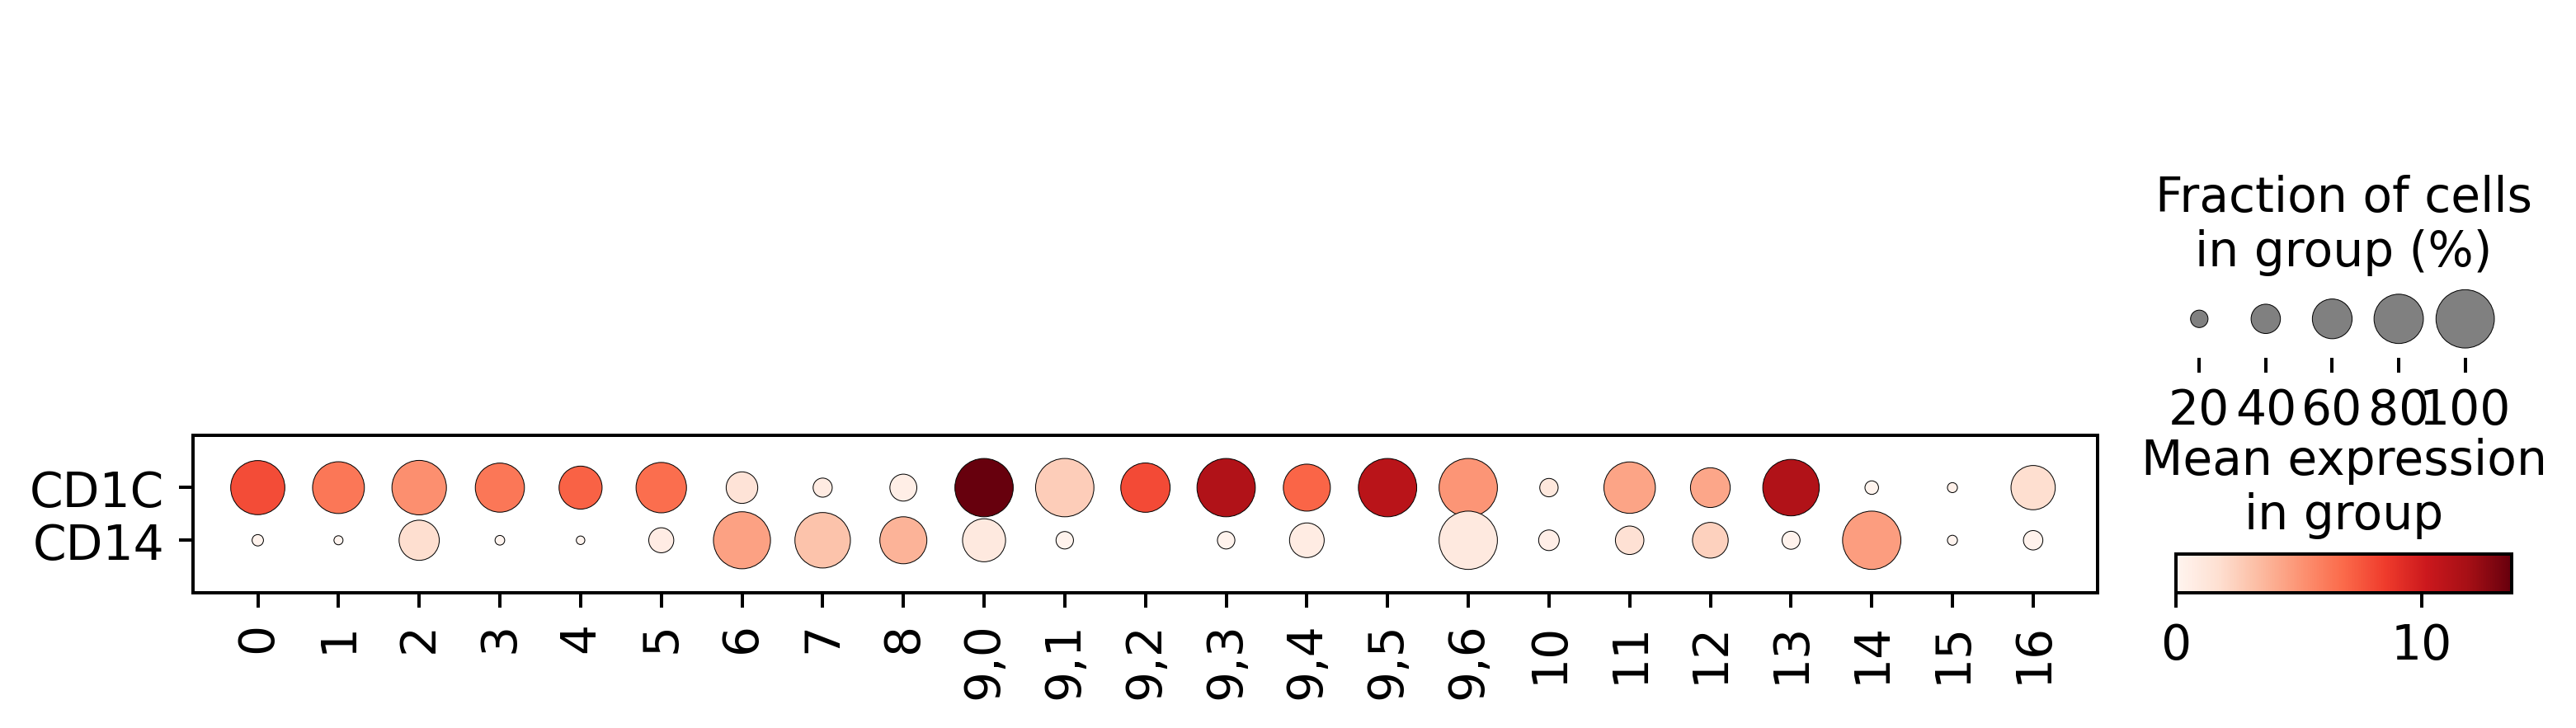

In [24]:
# zoom-in on cluster 9
sc.tl.louvain(adata_DC, restrict_to = ('louvain_DC',['9']), key_added = 'louvain_DC_9', resolution = 2)
sc.pl.dotplot(adata_DC, var_names = ['CD1C', 'CD14'], groupby = 'louvain_DC_9', swap_axes = True)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 18 clusters and added
    'louvain_DC_16', the cluster labels (adata.obs, categorical) (0:00:00)


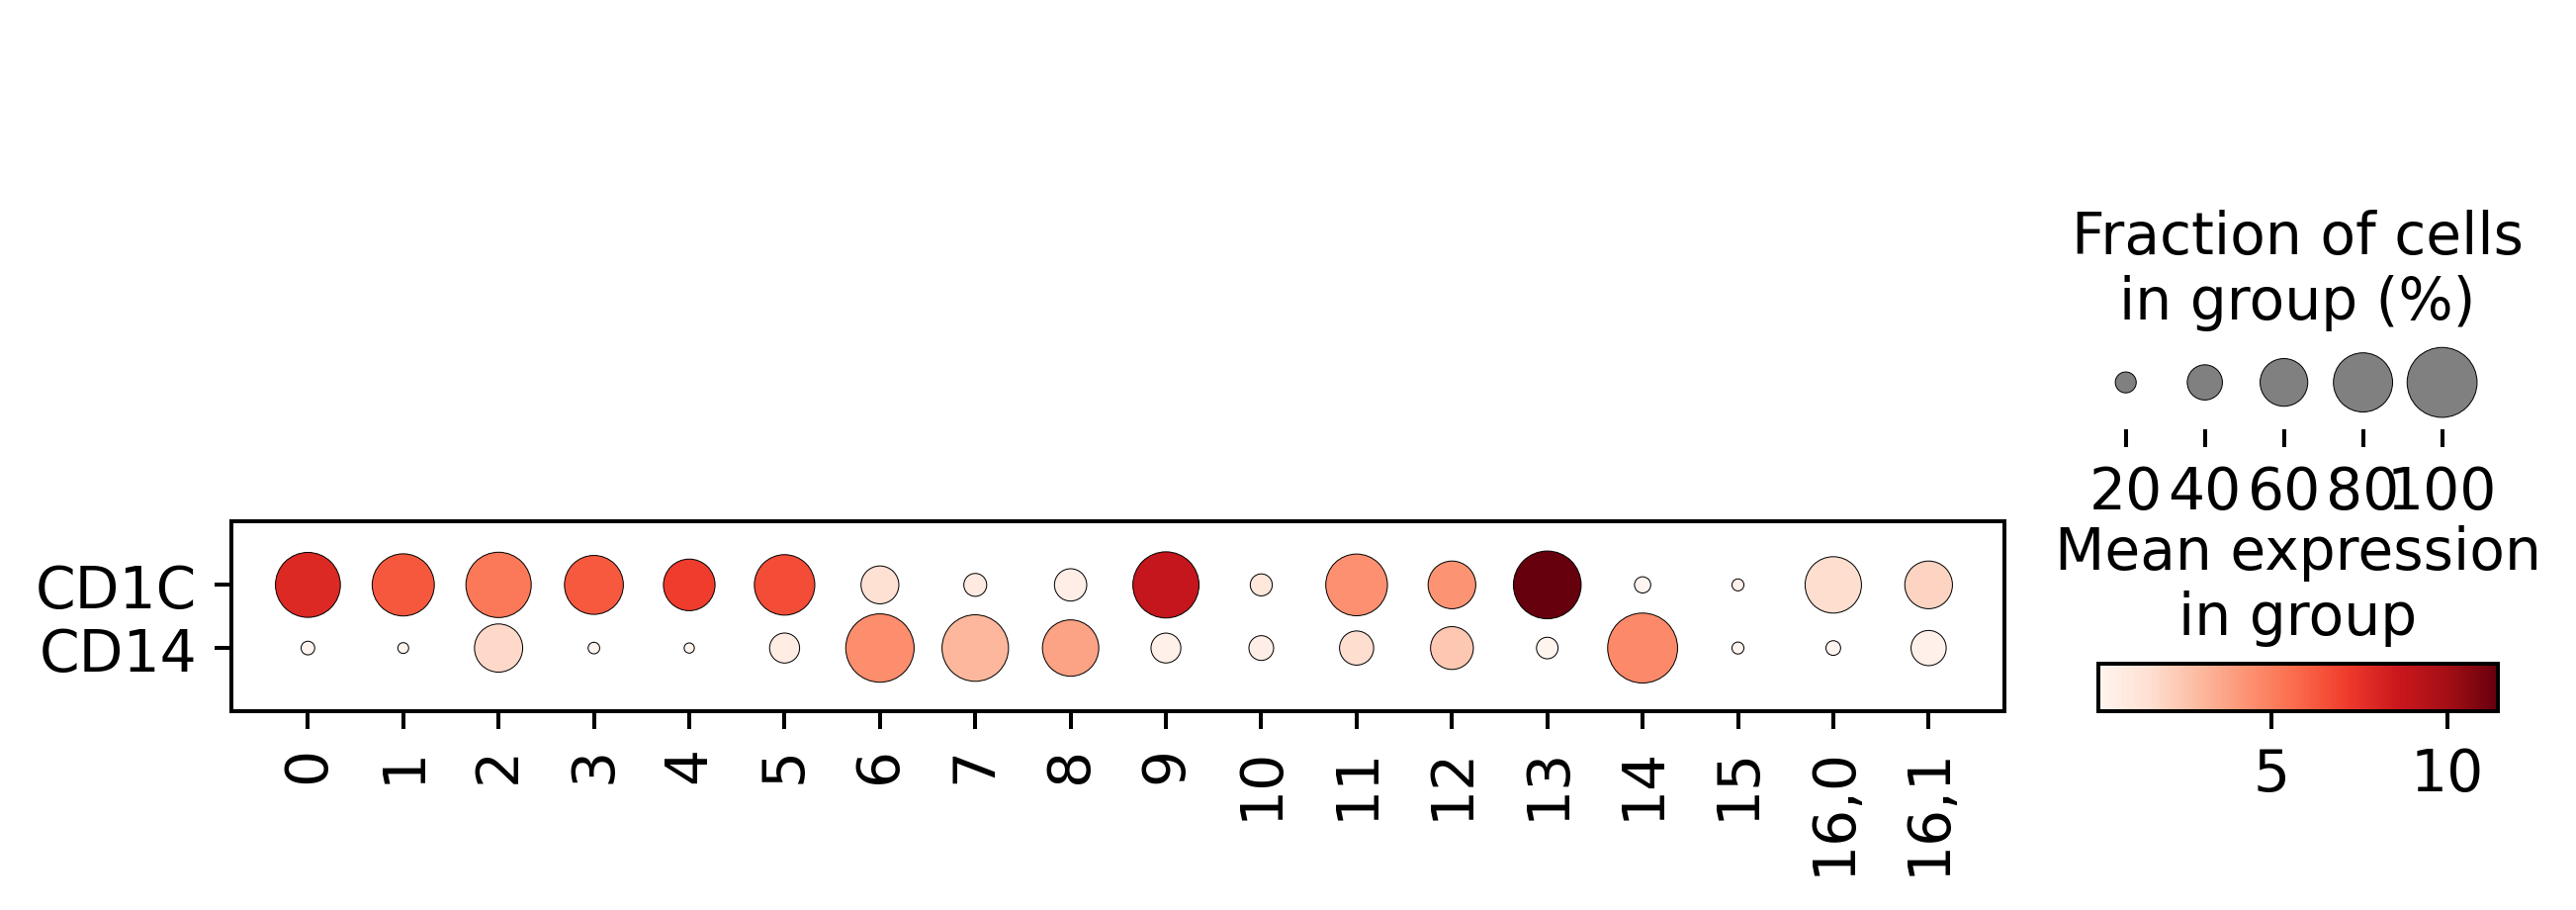

In [25]:
# zoom-in on cluster 16
sc.tl.louvain(adata_DC, restrict_to = ('louvain_DC',['16']), key_added = 'louvain_DC_16', resolution = 1)
sc.pl.dotplot(adata_DC, var_names = ['CD1C', 'CD14'], groupby = 'louvain_DC_16', swap_axes = True)

In [26]:
# define subclusters
def Annotation_DC(adata_obj, barcode):
    
    curr_louvain_coarse = adata_obj.obs.loc[barcode,'louvain_DC']
    
    if curr_louvain_coarse == '15':
        return('cDC1')

    elif curr_louvain_coarse in ['0', '1', '3', '4', '13']:
        return('cDC2')
    
    elif curr_louvain_coarse in ['2', '6', '7', '8', '10', '11', '12', '14']:
        return('cDC3')
    
    elif curr_louvain_coarse == '4':
        zoomed_in_louvain = adata_obj.obs.loc[barcode,'louvain_DC_4']
        if zoomed_in_louvain in ['4,0', '4,2', '4,3', '4,4', '4,6', '4,7', '4,8', '4,9', '4,10', '4,11', '4,12', '4,13']:
            return('cDC2')
        elif zoomed_in_louvain in ['4,1', '4,5']:
            return('cDC1')
        
    elif curr_louvain_coarse == '5':
        zoomed_in_louvain = adata_obj.obs.loc[barcode,'louvain_DC_5']
        if zoomed_in_louvain in ['5,0', '5,3','5,4', '5,6', '5,7', '5,8', '5,9', '5,11', '5,13', '5,14', '5,15', '5,16','5,18','5,19','5,20','5,21','5,24','5,27']:
            return('cDC2')
        elif zoomed_in_louvain in ['5,1', '5,5', '5,10', '5,12', '5,17', '5,22', '5,23', '5,25', '5,26']:
            return('cDC3')    
        elif zoomed_in_louvain in ['5,2']:
            return('cDC1')    
        
    elif curr_louvain_coarse == '9':
        zoomed_in_louvain = adata_obj.obs.loc[barcode,'louvain_DC_9']
        if zoomed_in_louvain in ['9,1', '9,2', '9,3', '9,5']:
            return('cDC2')
        elif zoomed_in_louvain in ['9,0', '9,4', '9,6']:
            return('cDC3')
        
    elif curr_louvain_coarse == '16':
        zoomed_in_louvain = adata_obj.obs.loc[barcode,'louvain_DC_16']
        if zoomed_in_louvain == '16,0':
            return('cDC2')
        elif zoomed_in_louvain == '16,1':
            return('cDC3')
        
    else:
        return('Unassigned')

In [27]:
# add annotations to object to transfer at the end
adata_DC.obs['barcode'] = adata_DC.obs.index
adata_DC.obs['DC_Celltype'] = adata_DC.obs['barcode'].apply(lambda x: Annotation_DC(adata_DC, x))

... storing 'DC_Celltype' as categorical


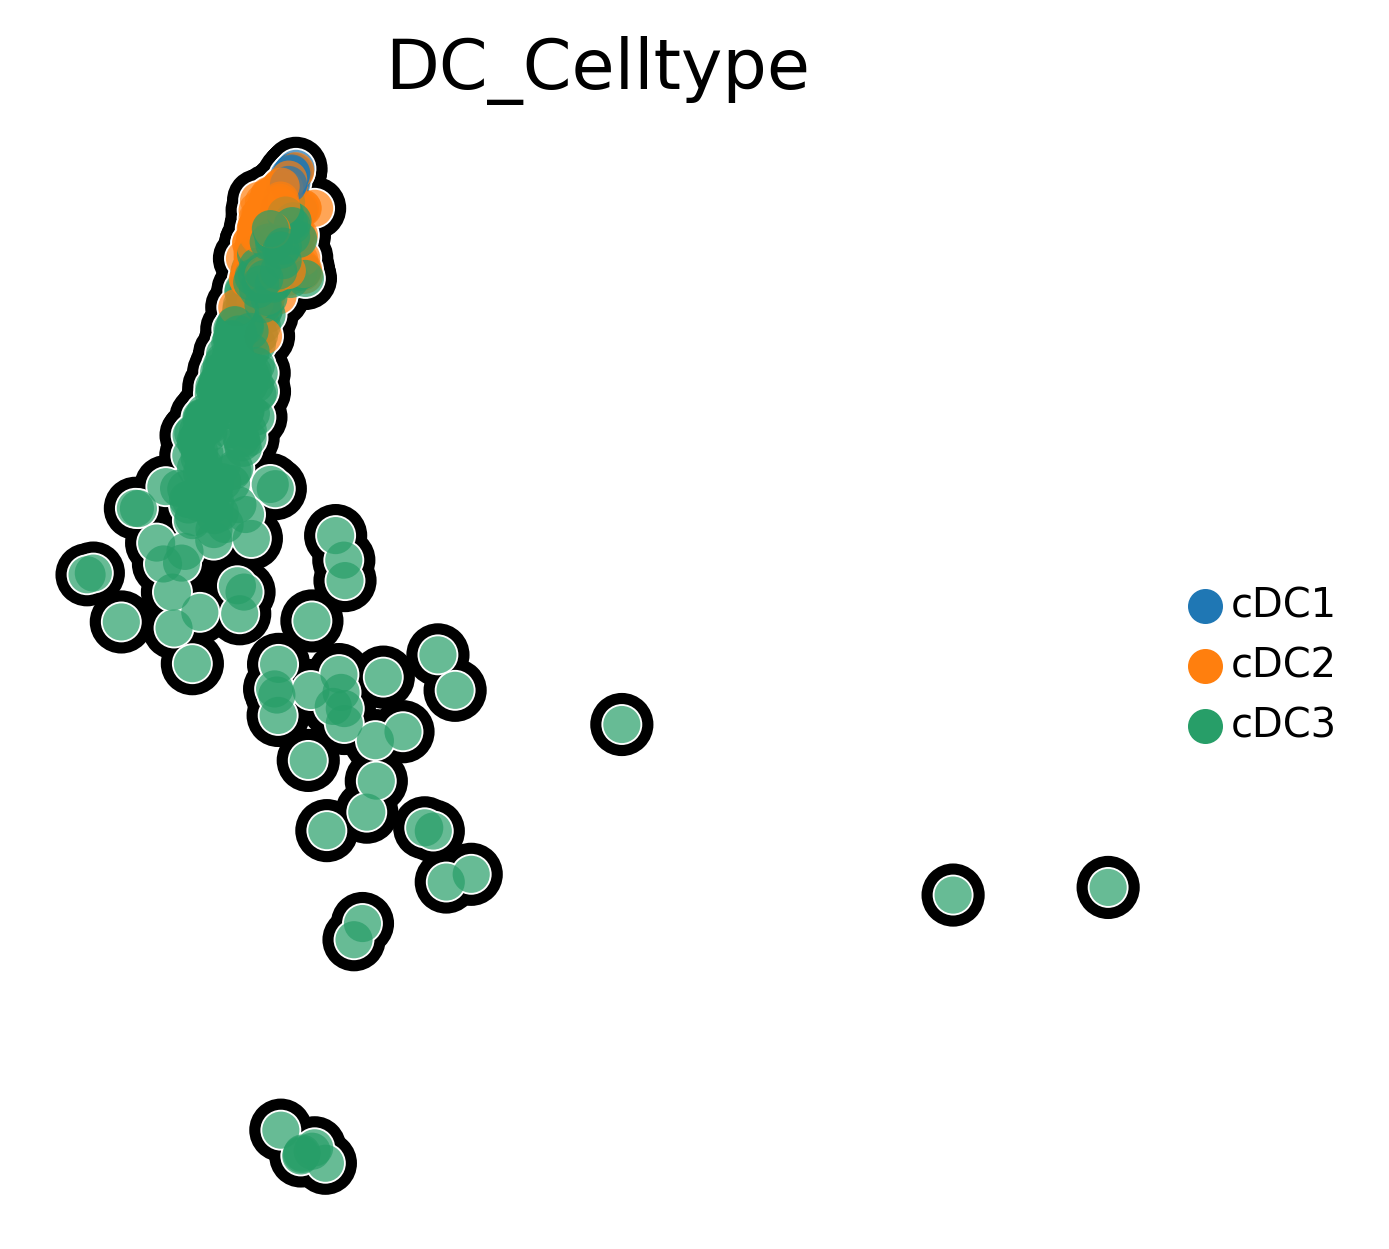

In [28]:
sc.pl.umap(adata_DC, color=['DC_Celltype'], legend_fontsize = 8, frameon = False, add_outline = True)

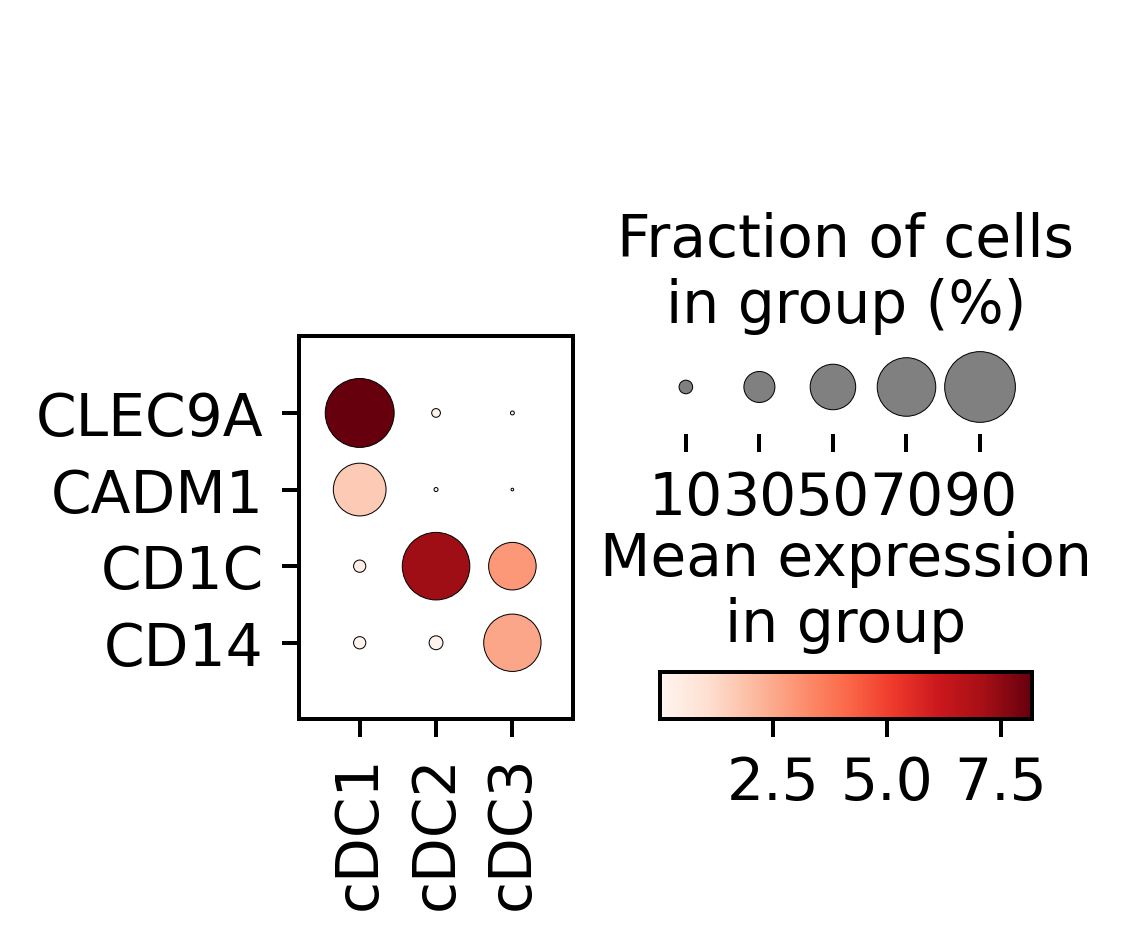

In [202]:
sc.pl.dotplot(adata_DC, var_names = ['CLEC9A', 'CADM1', 'CD1C', 'CD14'], groupby = 'DC_Celltype', swap_axes = True)

T cells

In [29]:
adata_tcells = adata[adata.obs['General_Celltype'] == 'T-cells'].copy()
adata_tcells

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


AnnData object with n_obs × n_vars = 41479 × 22572
    obs: 'souporcell', 'demultiplexed', 'sample_names', 'log2p1_count', 'percent_mito', 'n_genes', 'batch', 'FolderName', 'Lane', 'Sort', 'Type', 'Donor Id', 'Age', 'Sex', 'Race', 'Ethnicity', 'BMI', 'Pre-existing heart disease', 'Pre-existing lung disease', 'Pre-existing kidney disease', 'Pre-existing diabetes', 'Pre-existing Hypertension', 'Pre-existing immunocompromised condition', 'Smoking', 'SARS-CoV-2 PCR', 'SARS-CoV-2 Ab', 'Symptomatic', 'Admitted to hospital', 'Highest level of respiratory support', 'Vasoactive agents required during hospitalization', '28-day death', 'scrublet_pred', 'scrublet_local_pred', 'scrublet_score', 'scrublet_cluster_score', 'filtered_cells', 'S_score', 'G2M_score', 'phase', 'leiden_sampl_cc', 'leidenres2_sampl_cc', 'DonorSubset', 'leiden_scvi_subset_cc', 'leidenres2_scvi_subset_cc', 'leiden_tvi_subset_cc', 'leidenres2_tvi_subset_cc', 'louvain', 'Celltype_Predictions', 'Prediction_Probabilities', 'louva

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 7 clusters and added
    'louvain_tcells', the cluster labels (adata.obs, categorical) (0:00:04)


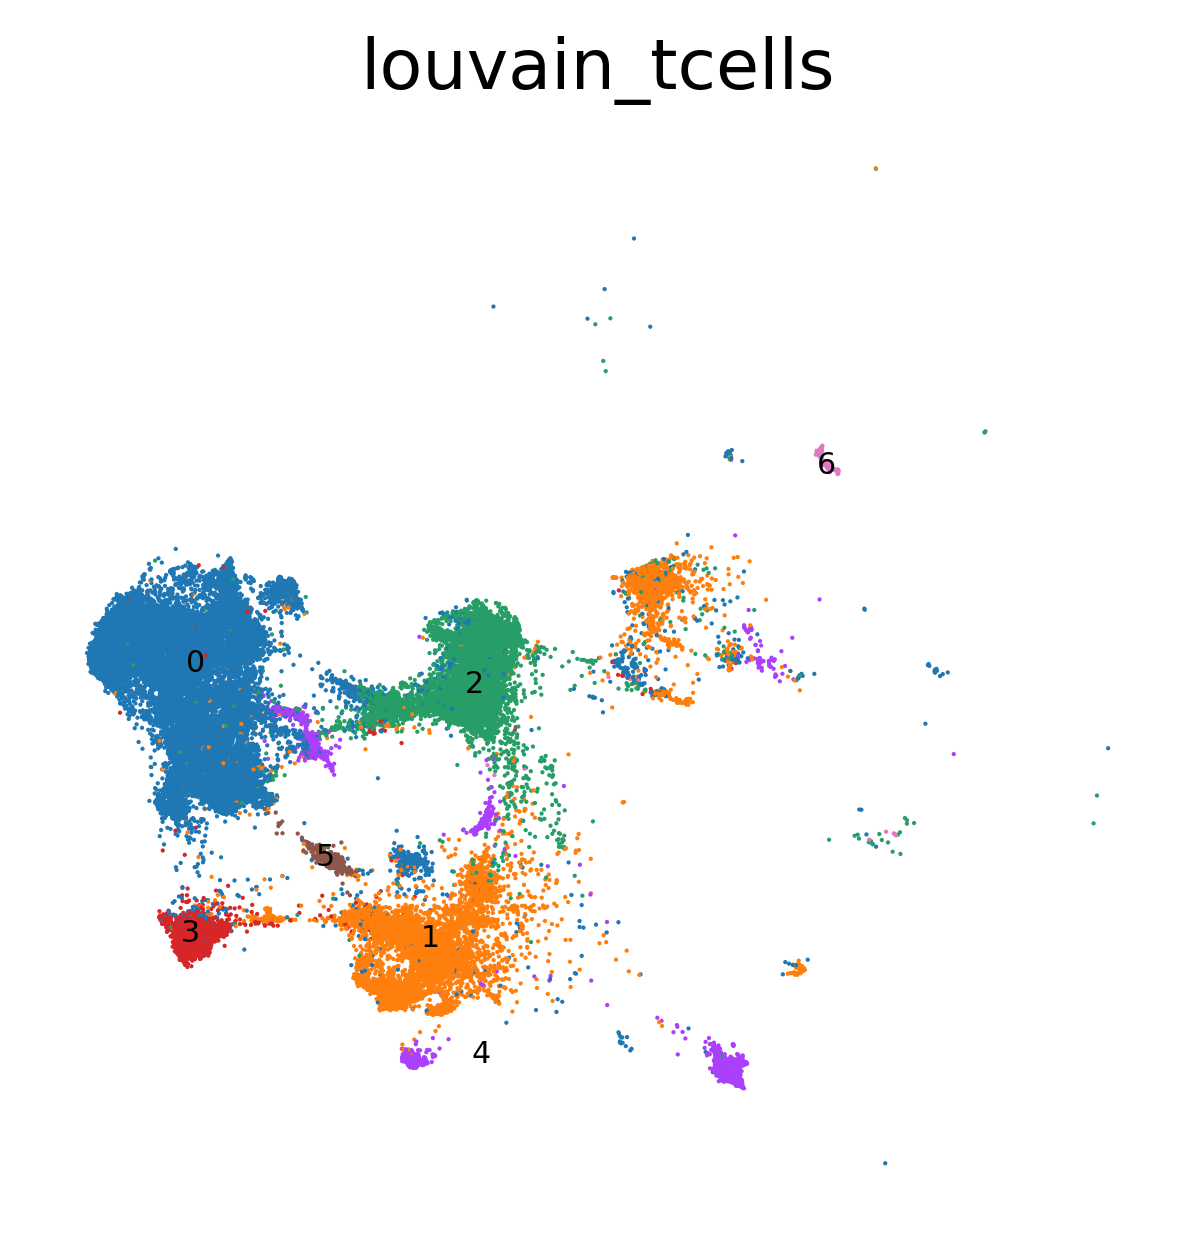

In [32]:
# subcluster cell types using known cell-specific marker genes
sc.tl.louvain(adata_tcells, key_added = 'louvain_tcells', resolution = 0.2)
sc.pl.umap(adata_tcells, color = ["louvain_tcells"], legend_loc = 'on data', legend_fontweight = 'normal', legend_fontsize = 6, frameon = False)

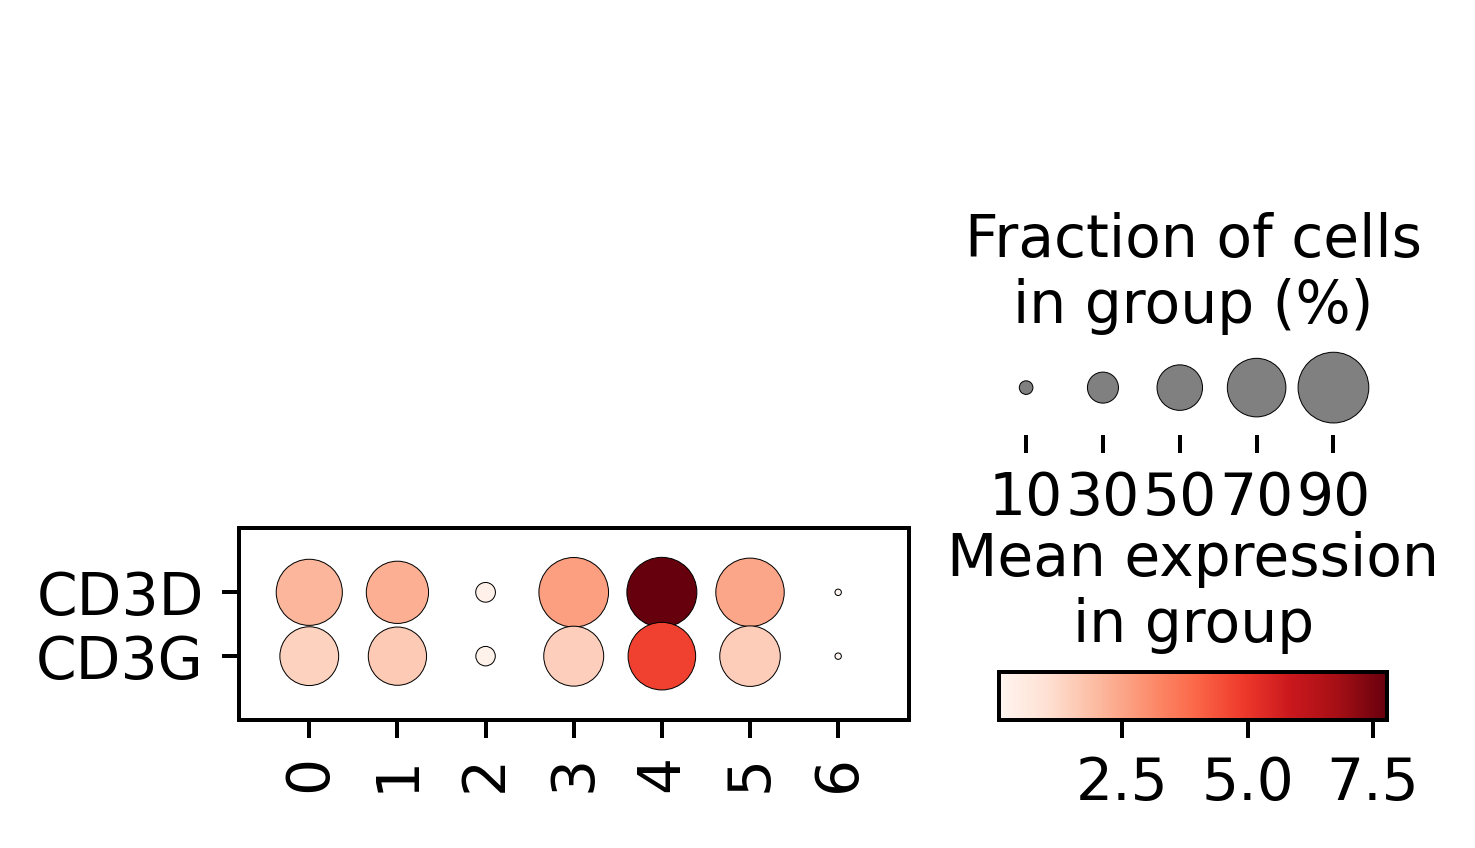

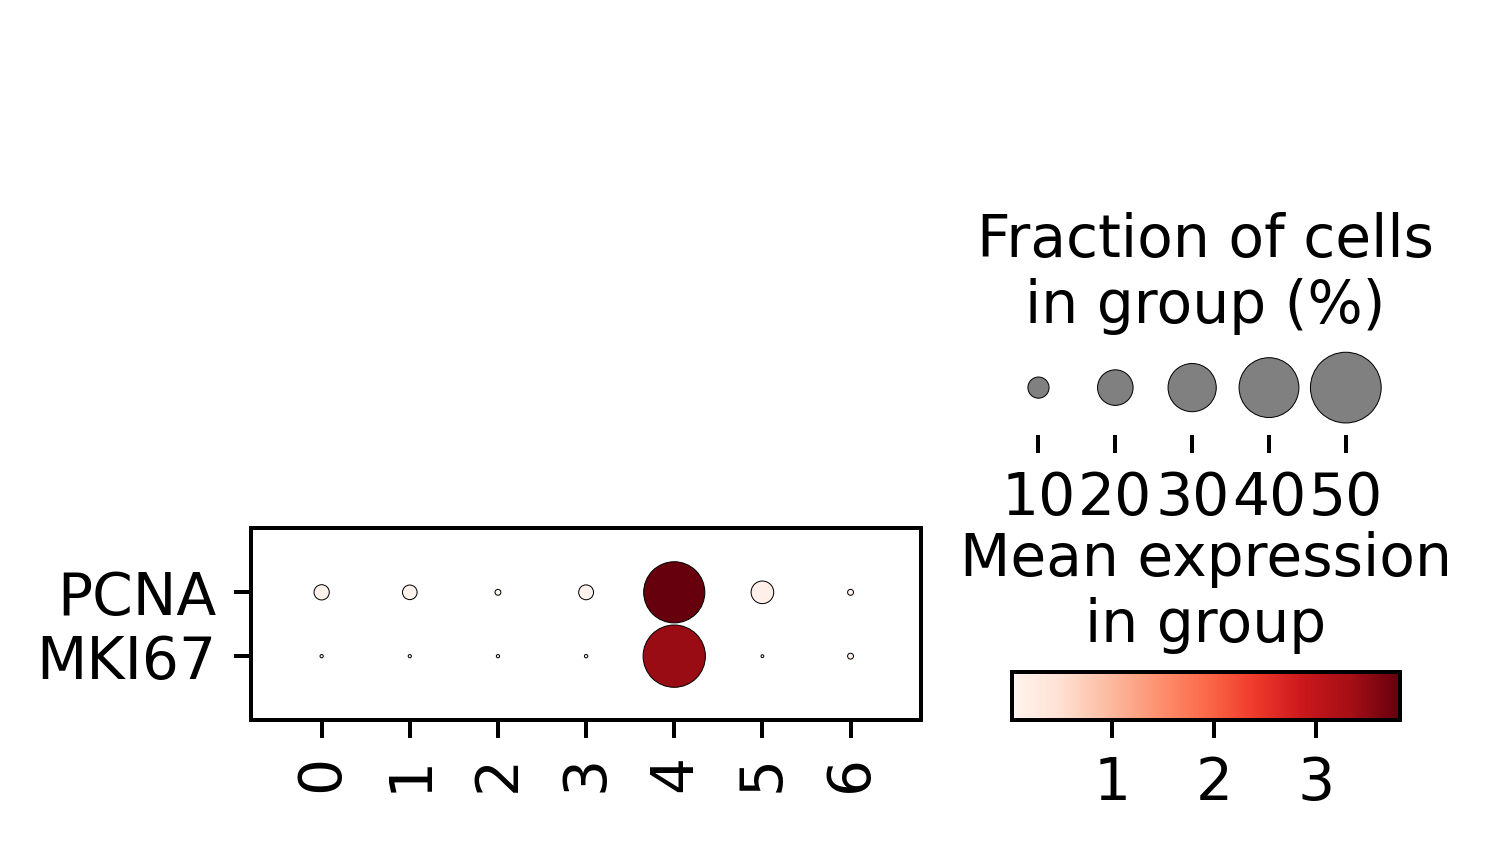

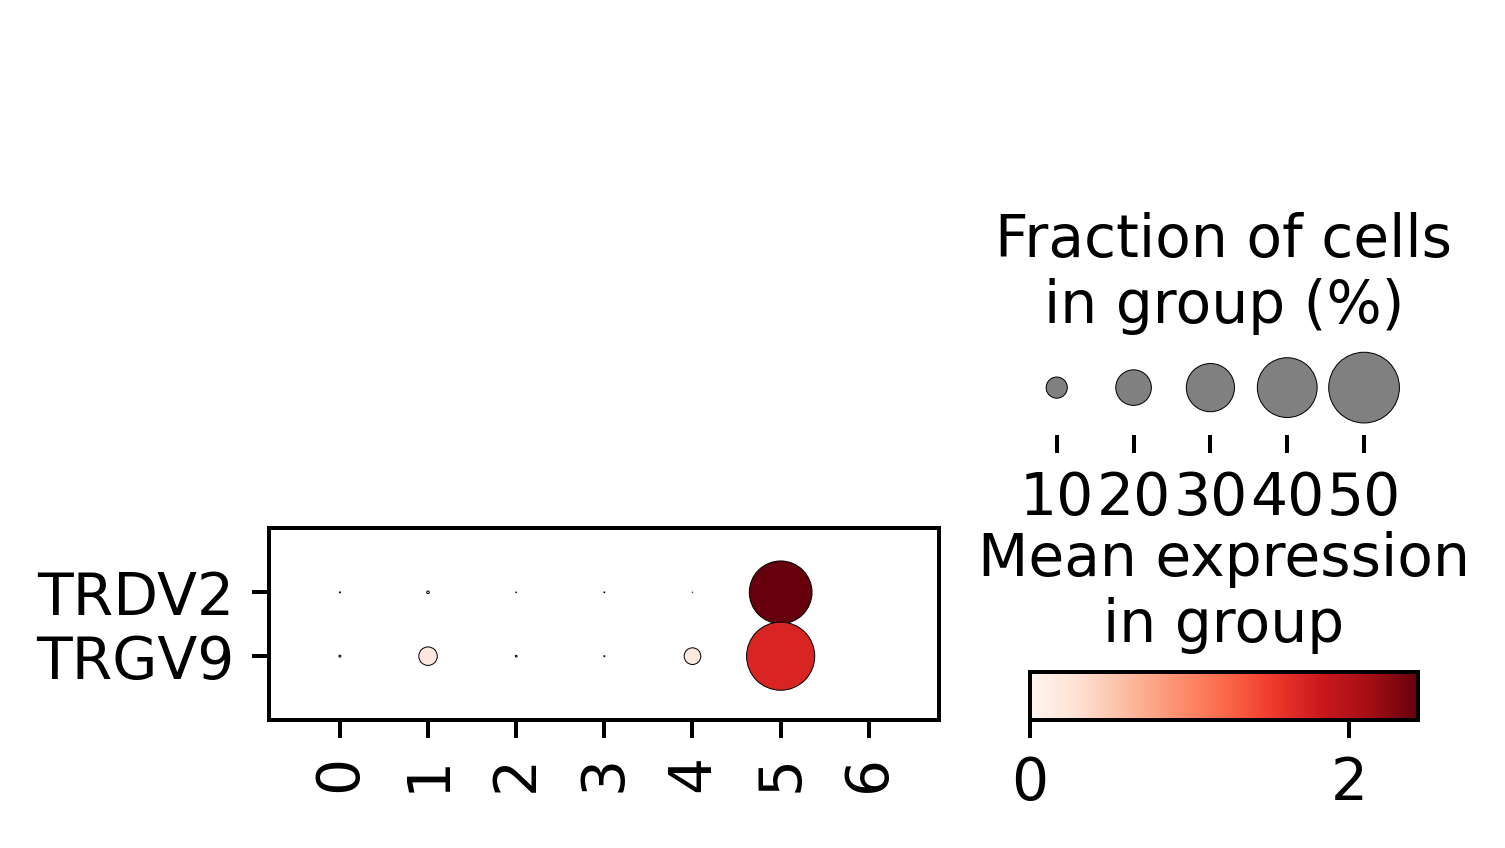

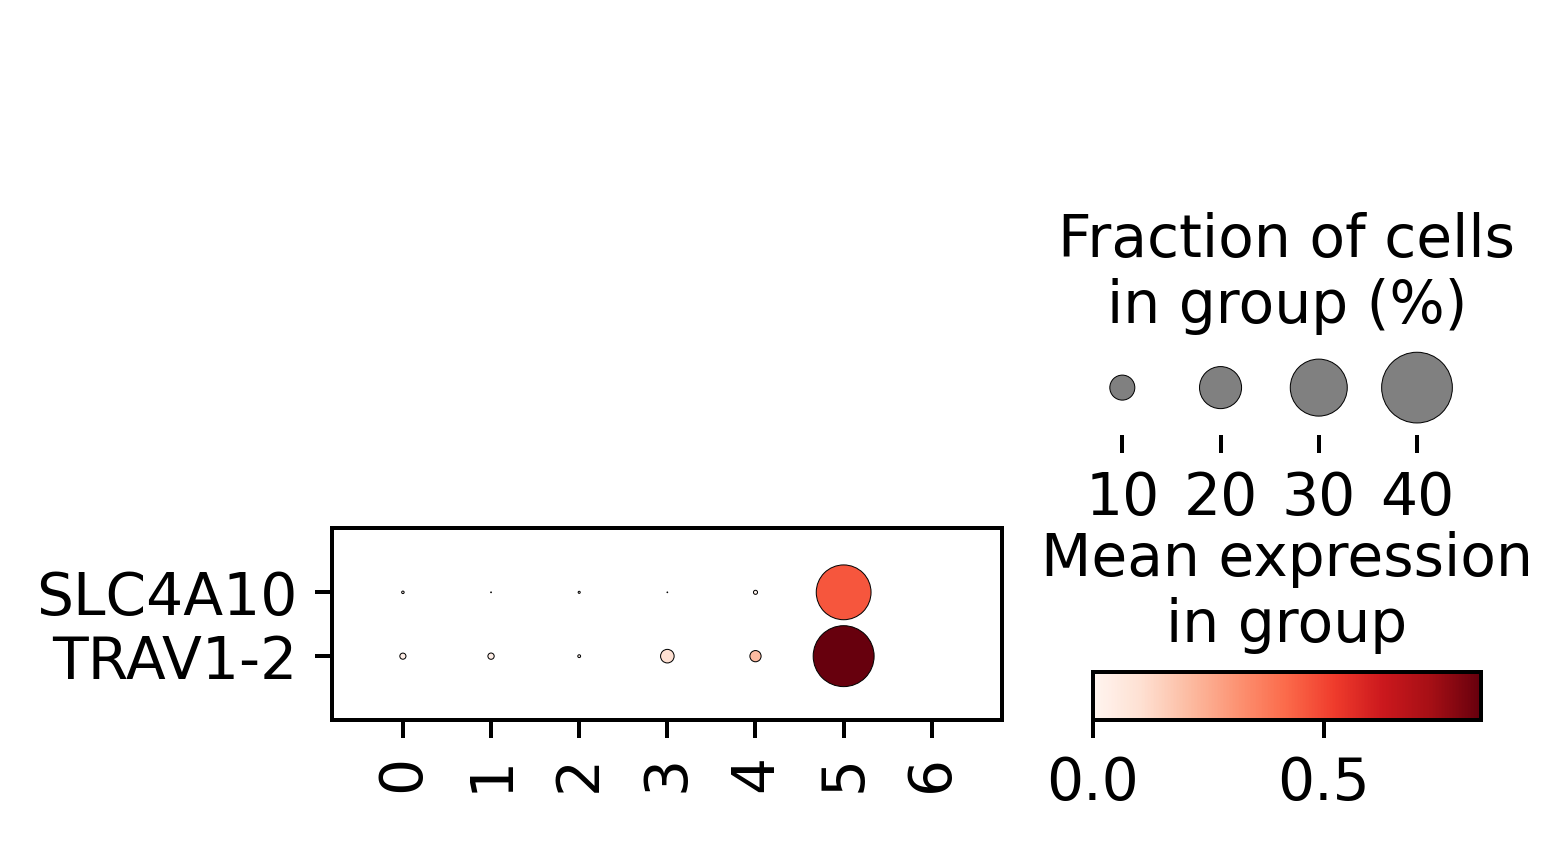

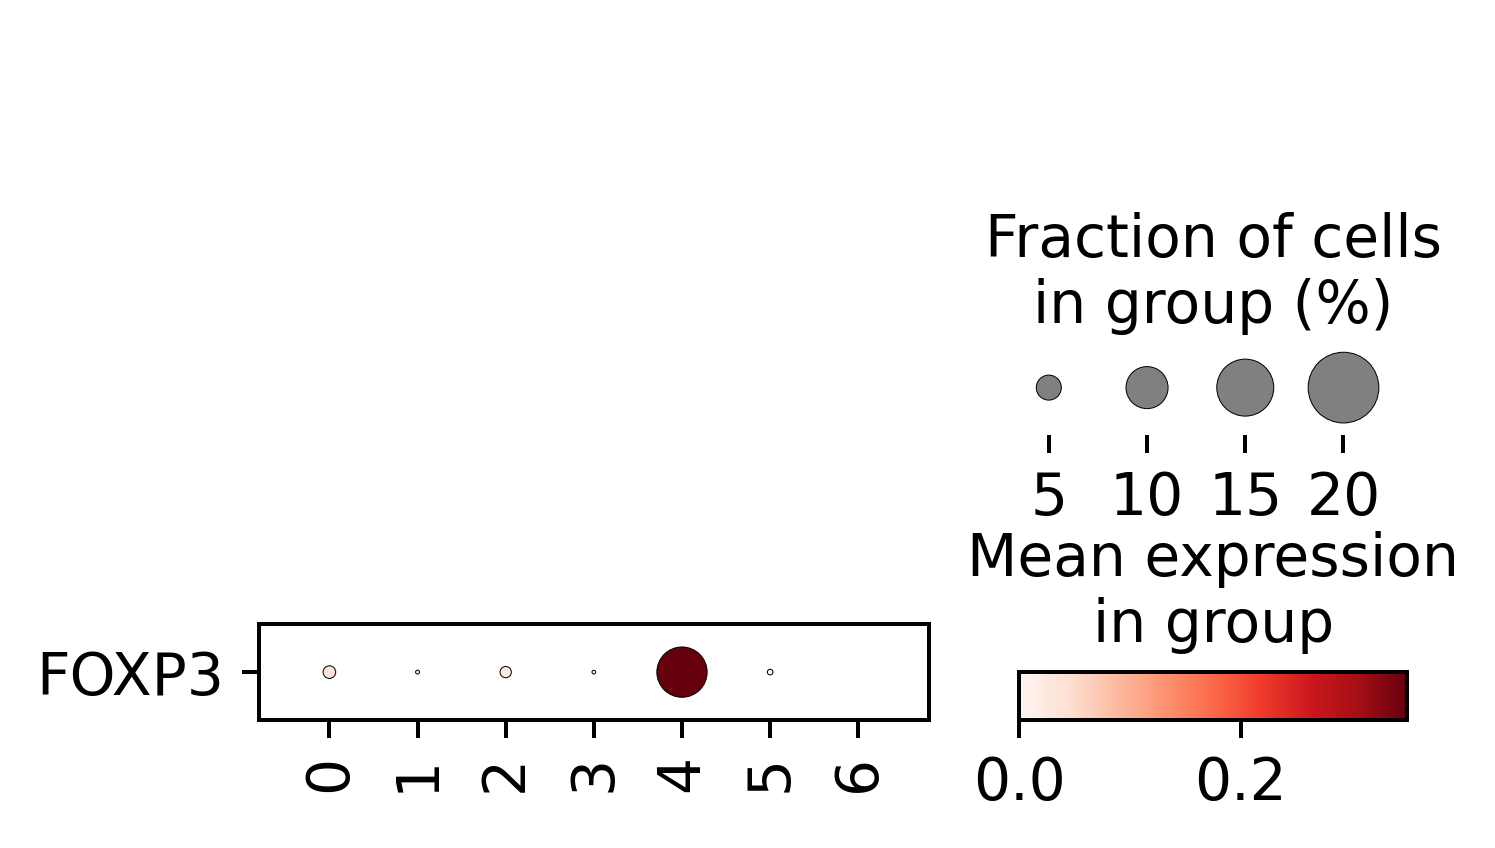

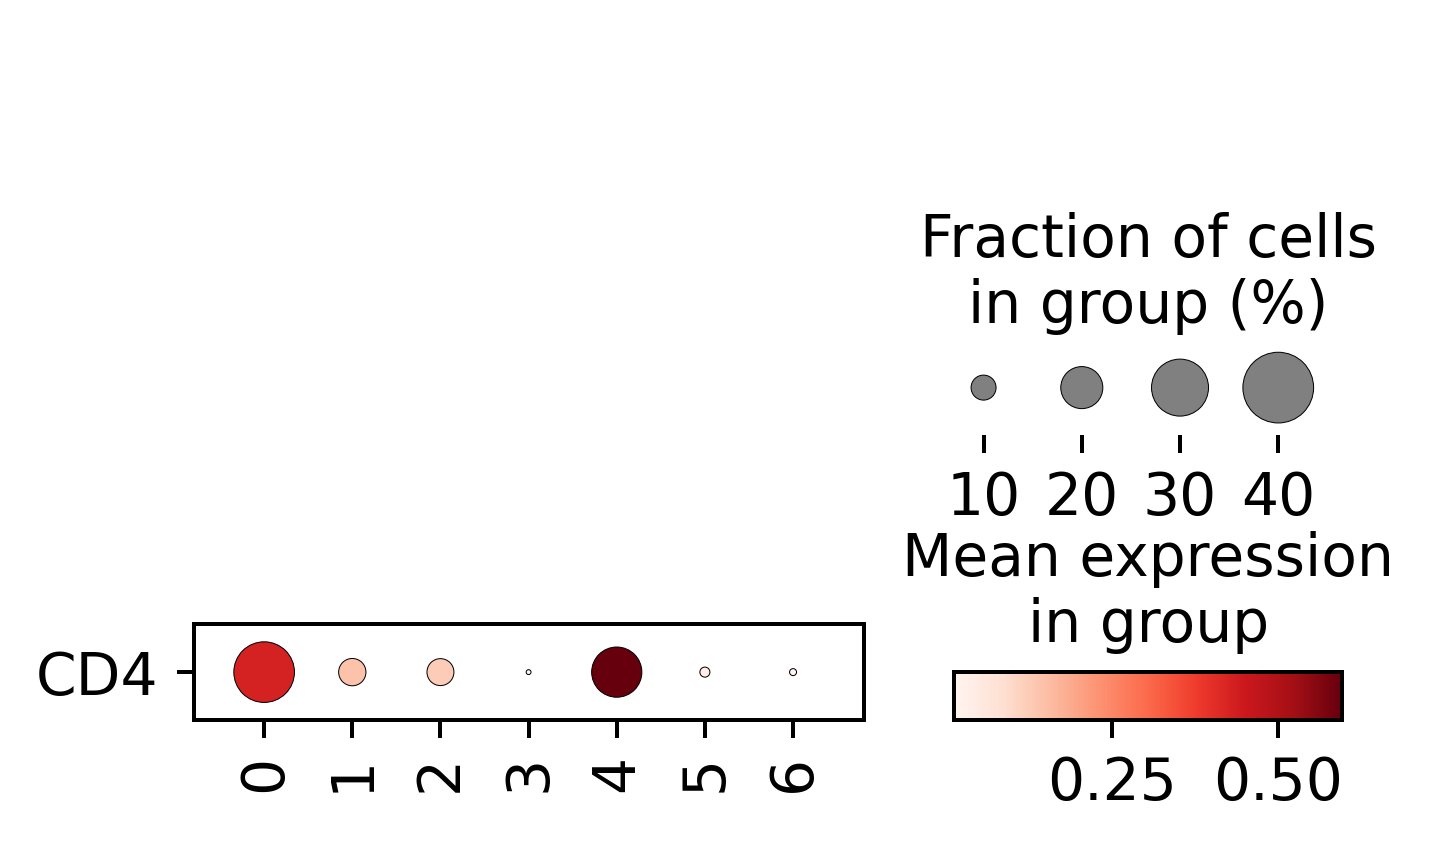

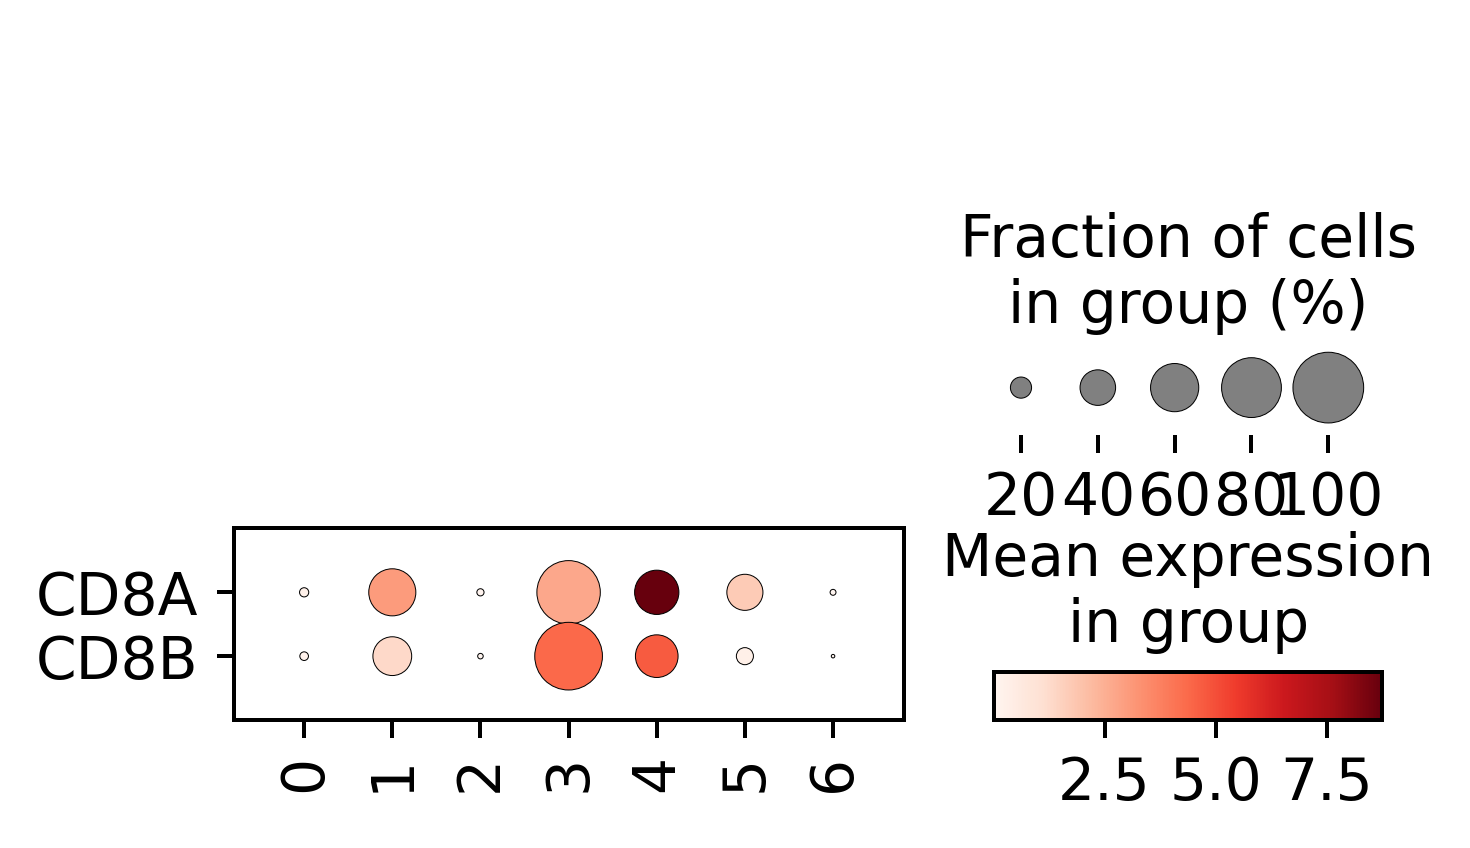

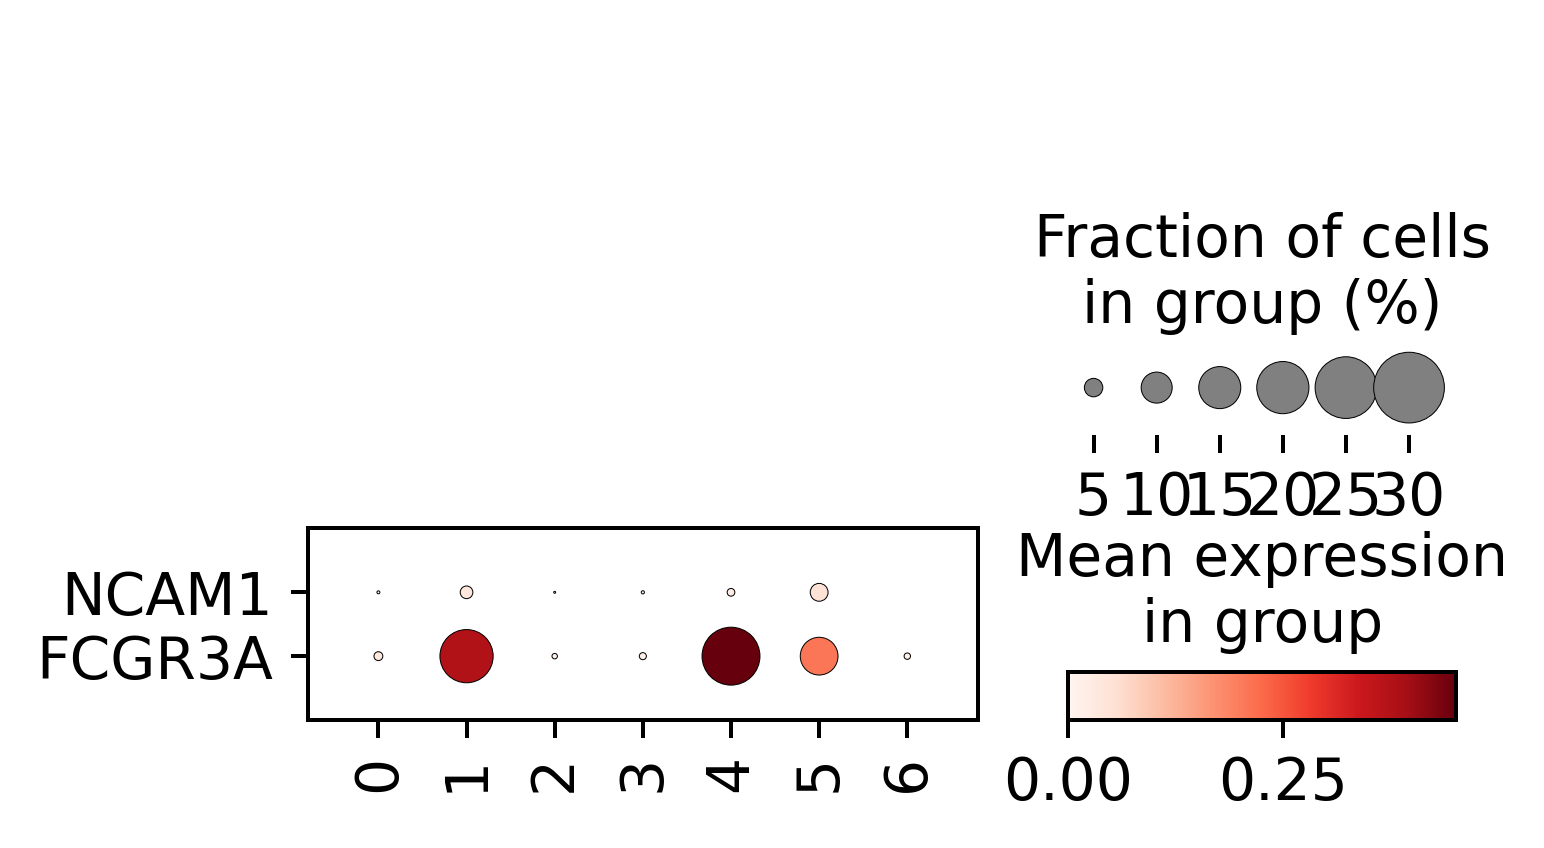

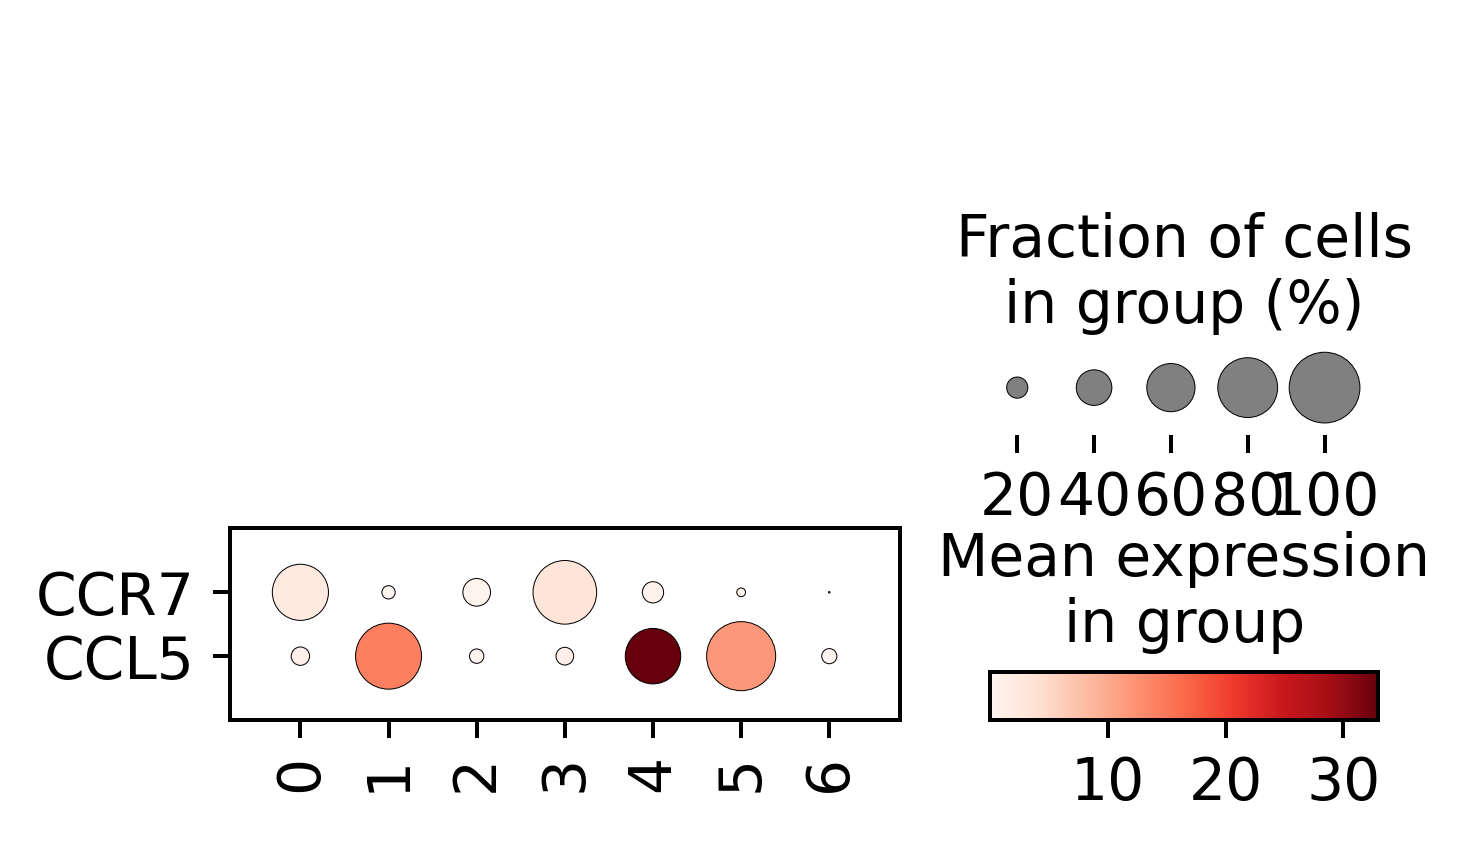

In [150]:
sc.pl.dotplot(adata_tcells, var_names = ['CD3D', 'CD3G'], groupby = 'louvain_tcells', swap_axes = True)
sc.pl.dotplot(adata_tcells, var_names = ['PCNA', 'MKI67'], groupby = 'louvain_tcells', swap_axes = True) #Prolif. T
sc.pl.dotplot(adata_tcells, var_names = ['TRDV2', 'TRGV9'], groupby = 'louvain_tcells', swap_axes = True) #gdT
sc.pl.dotplot(adata_tcells, var_names = ['SLC4A10', 'TRAV1-2'], groupby = 'louvain_tcells', swap_axes = True) #MAIT
sc.pl.dotplot(adata_tcells, var_names = ['FOXP3'], groupby = 'louvain_tcells', swap_axes = True) #Treg
sc.pl.dotplot(adata_tcells, var_names = ['CD4'], groupby = 'louvain_tcells', swap_axes = True) #CD4+ T
sc.pl.dotplot(adata_tcells, var_names = ['CD8A', 'CD8B'], groupby = 'louvain_tcells', swap_axes = True) #CD8+ T
sc.pl.dotplot(adata_tcells, var_names = ['NCAM1','FCGR3A'], groupby = 'louvain_tcells', swap_axes = True) #NKT
sc.pl.dotplot(adata_tcells, var_names = ['CCR7', 'CCL5'], groupby = 'louvain_tcells', swap_axes = True) #Naive/memory

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 10 clusters and added
    'louvain_tcells_4', the cluster labels (adata.obs, categorical) (0:00:00)


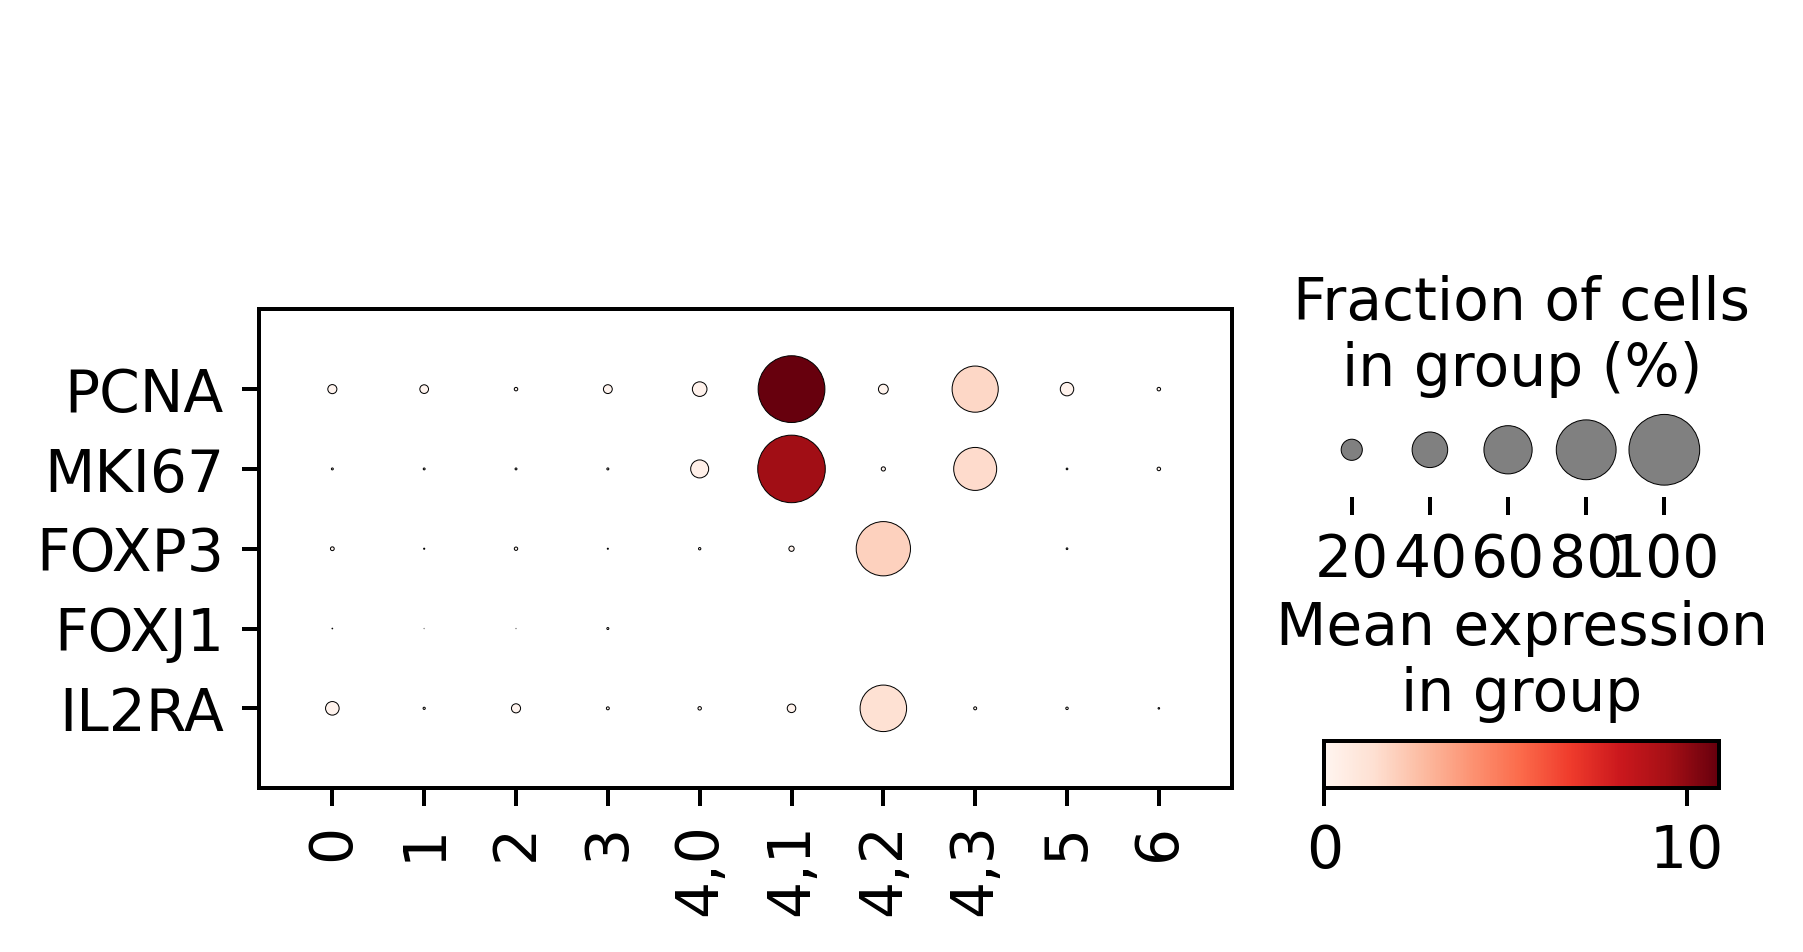

In [33]:
# zoom-in on cluster 4
sc.tl.louvain(adata_tcells, restrict_to = ('louvain_tcells',['4']), key_added = 'louvain_tcells_4', resolution = 0.2)
sc.pl.dotplot(adata_tcells, var_names = ['PCNA', 'MKI67', 'FOXP3', 'FOXJ1', 'IL2RA'], groupby = 'louvain_tcells_4', swap_axes = True)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'louvain_tcells_5', the cluster labels (adata.obs, categorical) (0:00:00)


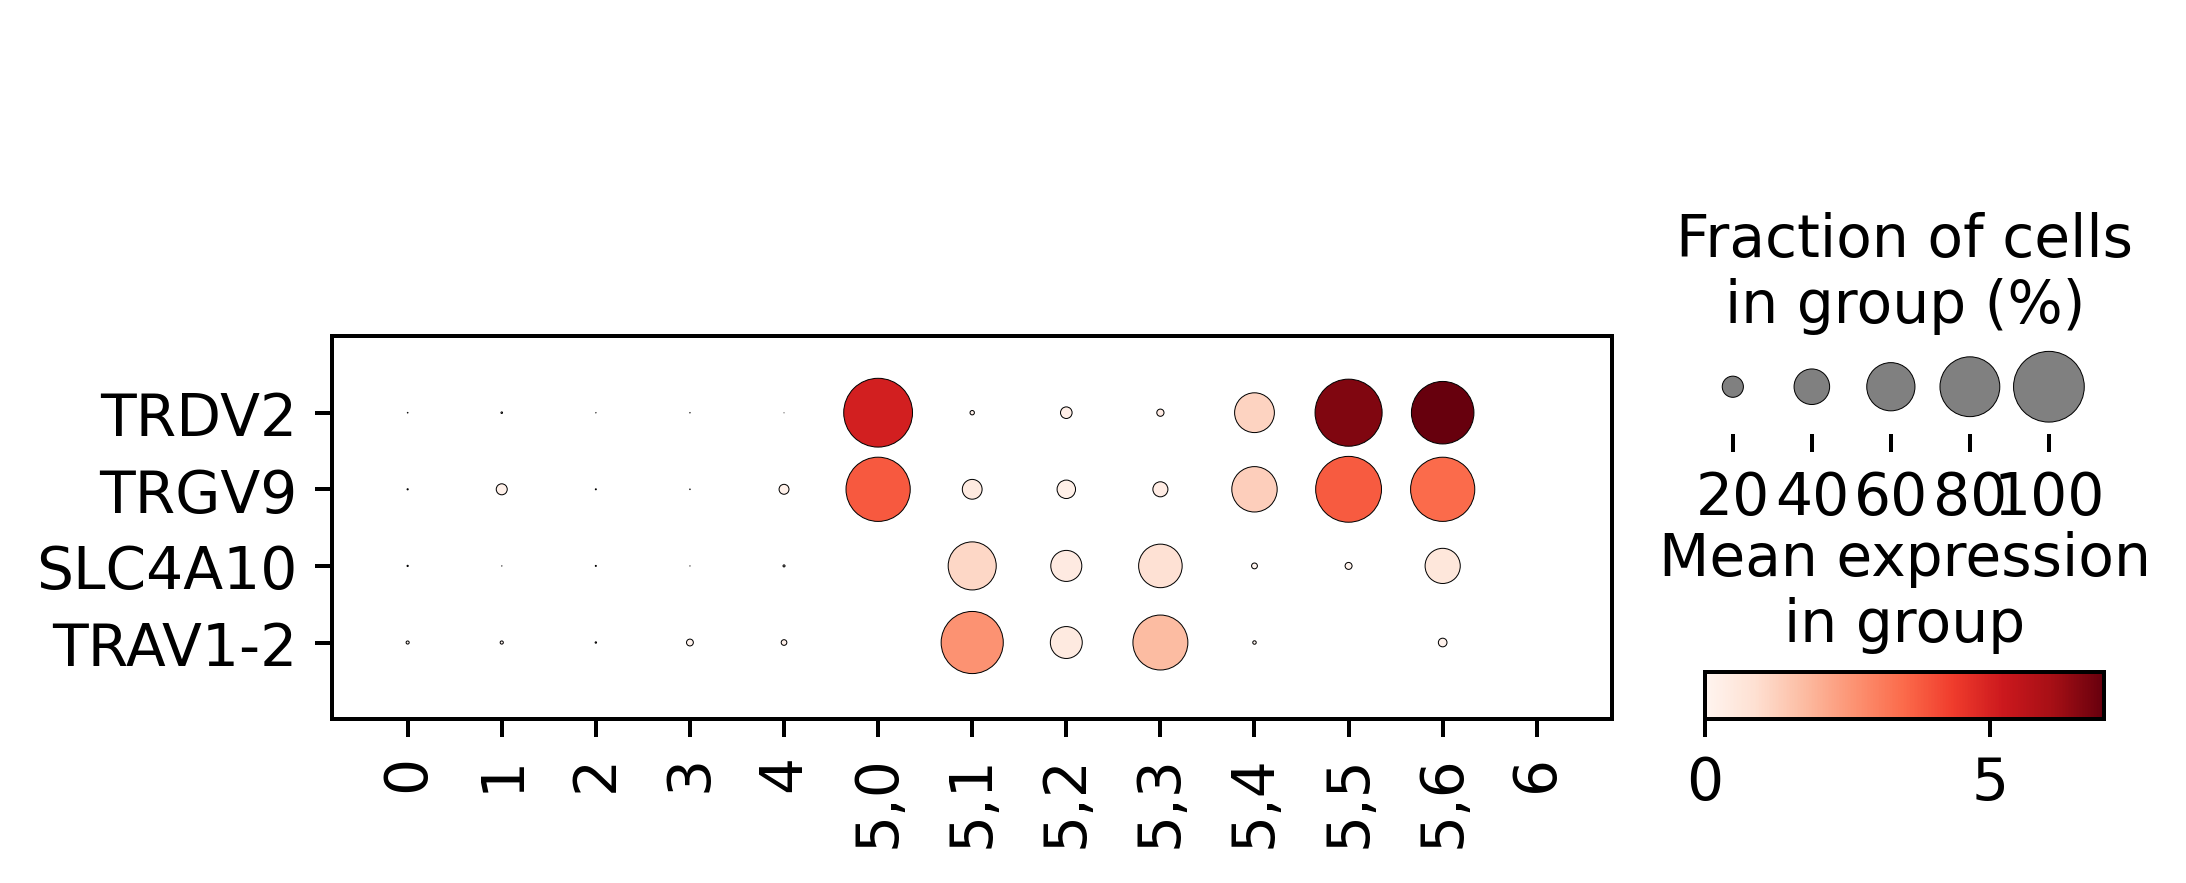

In [34]:
# zoom-in on cluster 5
sc.tl.louvain(adata_tcells, restrict_to = ('louvain_tcells',['5']), key_added = 'louvain_tcells_5', resolution = 1)
sc.pl.dotplot(adata_tcells, var_names = ['TRDV2', 'TRGV9', 'SLC4A10', 'TRAV1-2'], groupby = 'louvain_tcells_5', swap_axes = True) #gdT

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 19 clusters and added
    'louvain_tcells_2', the cluster labels (adata.obs, categorical) (0:00:00)


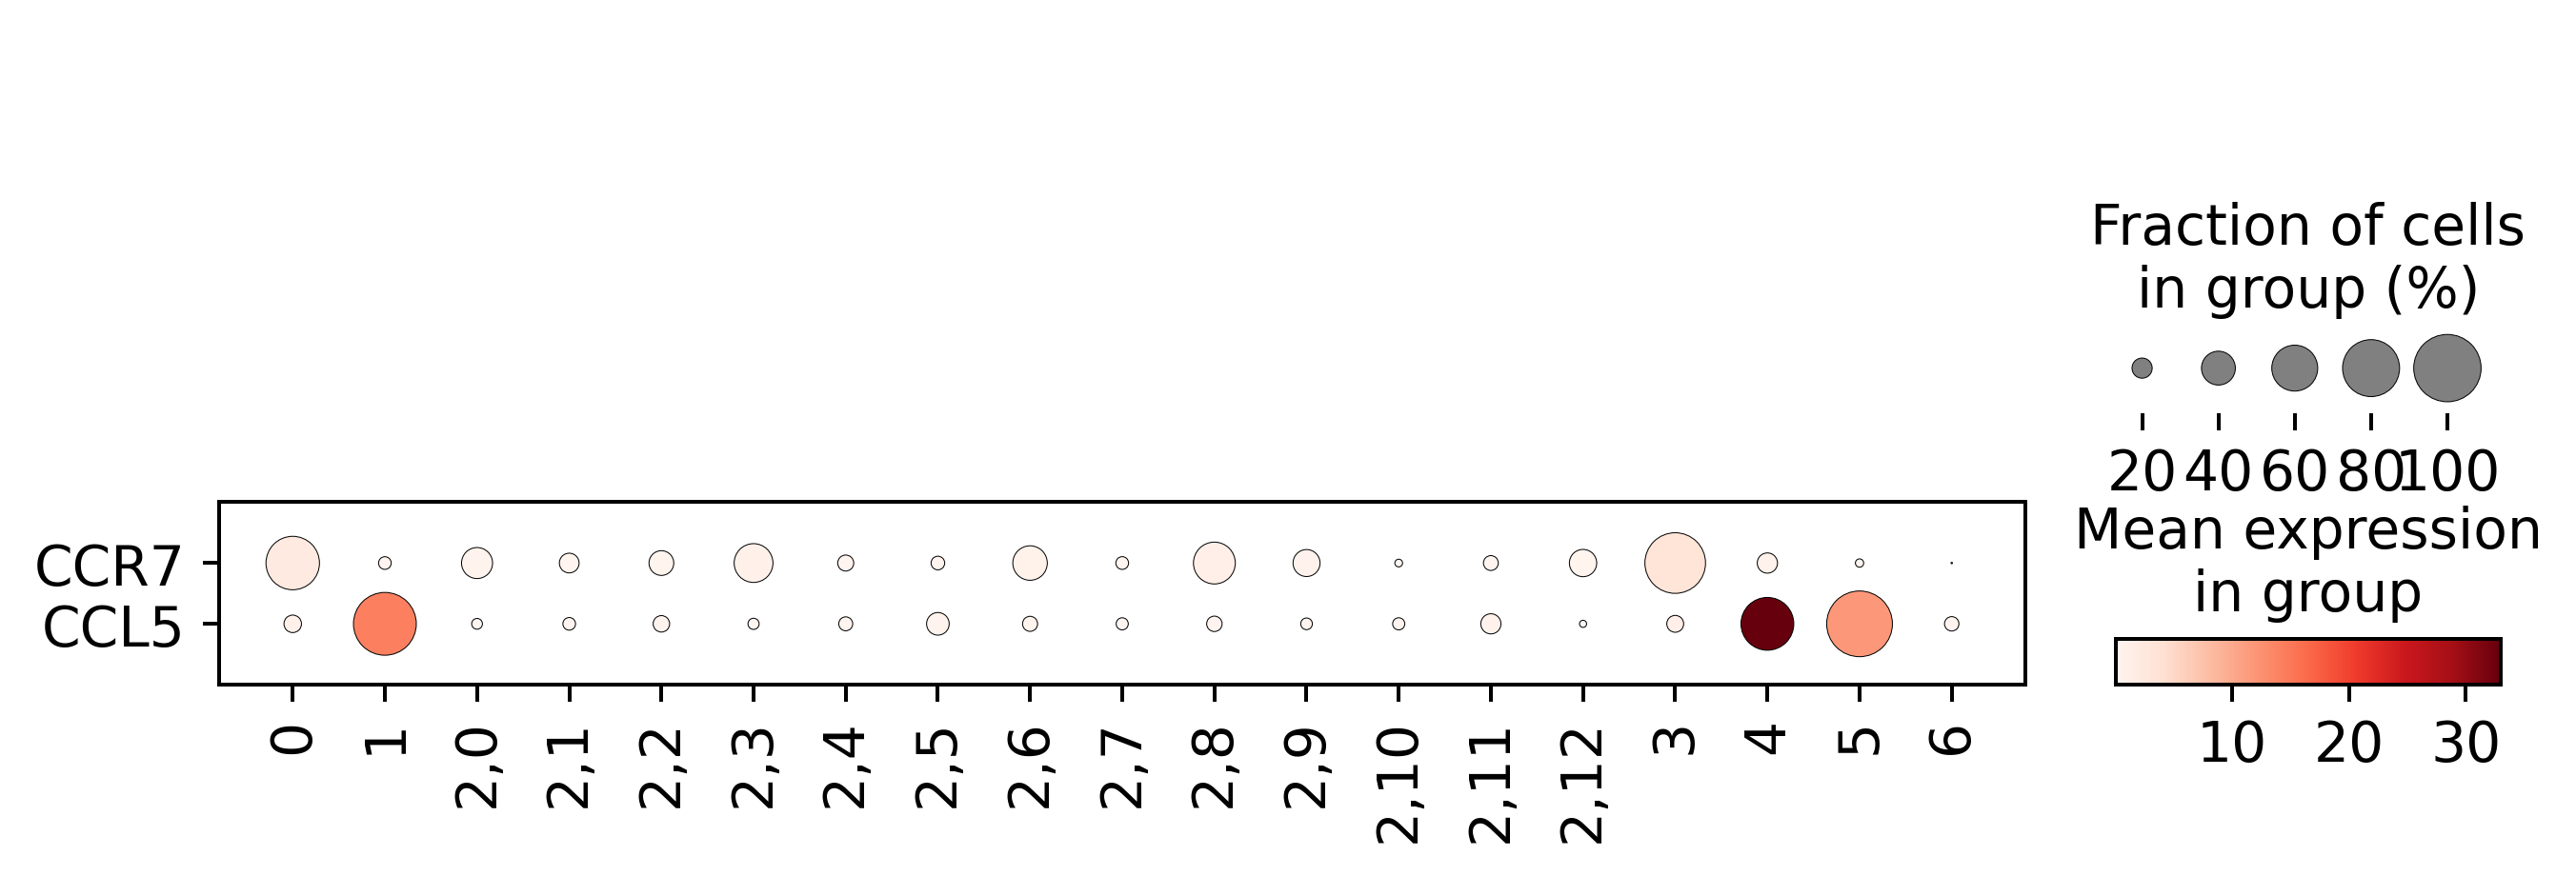

In [35]:
# zoom-in on cluster 2
sc.tl.louvain(adata_tcells, restrict_to = ('louvain_tcells',['2']), key_added = 'louvain_tcells_2', resolution = 1)
sc.pl.dotplot(adata_tcells, var_names = ['CCR7', 'CCL5'], groupby = 'louvain_tcells_2', swap_axes = True) #CD4+ T

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 25 clusters and added
    'louvain_tcells_1', the cluster labels (adata.obs, categorical) (0:00:00)


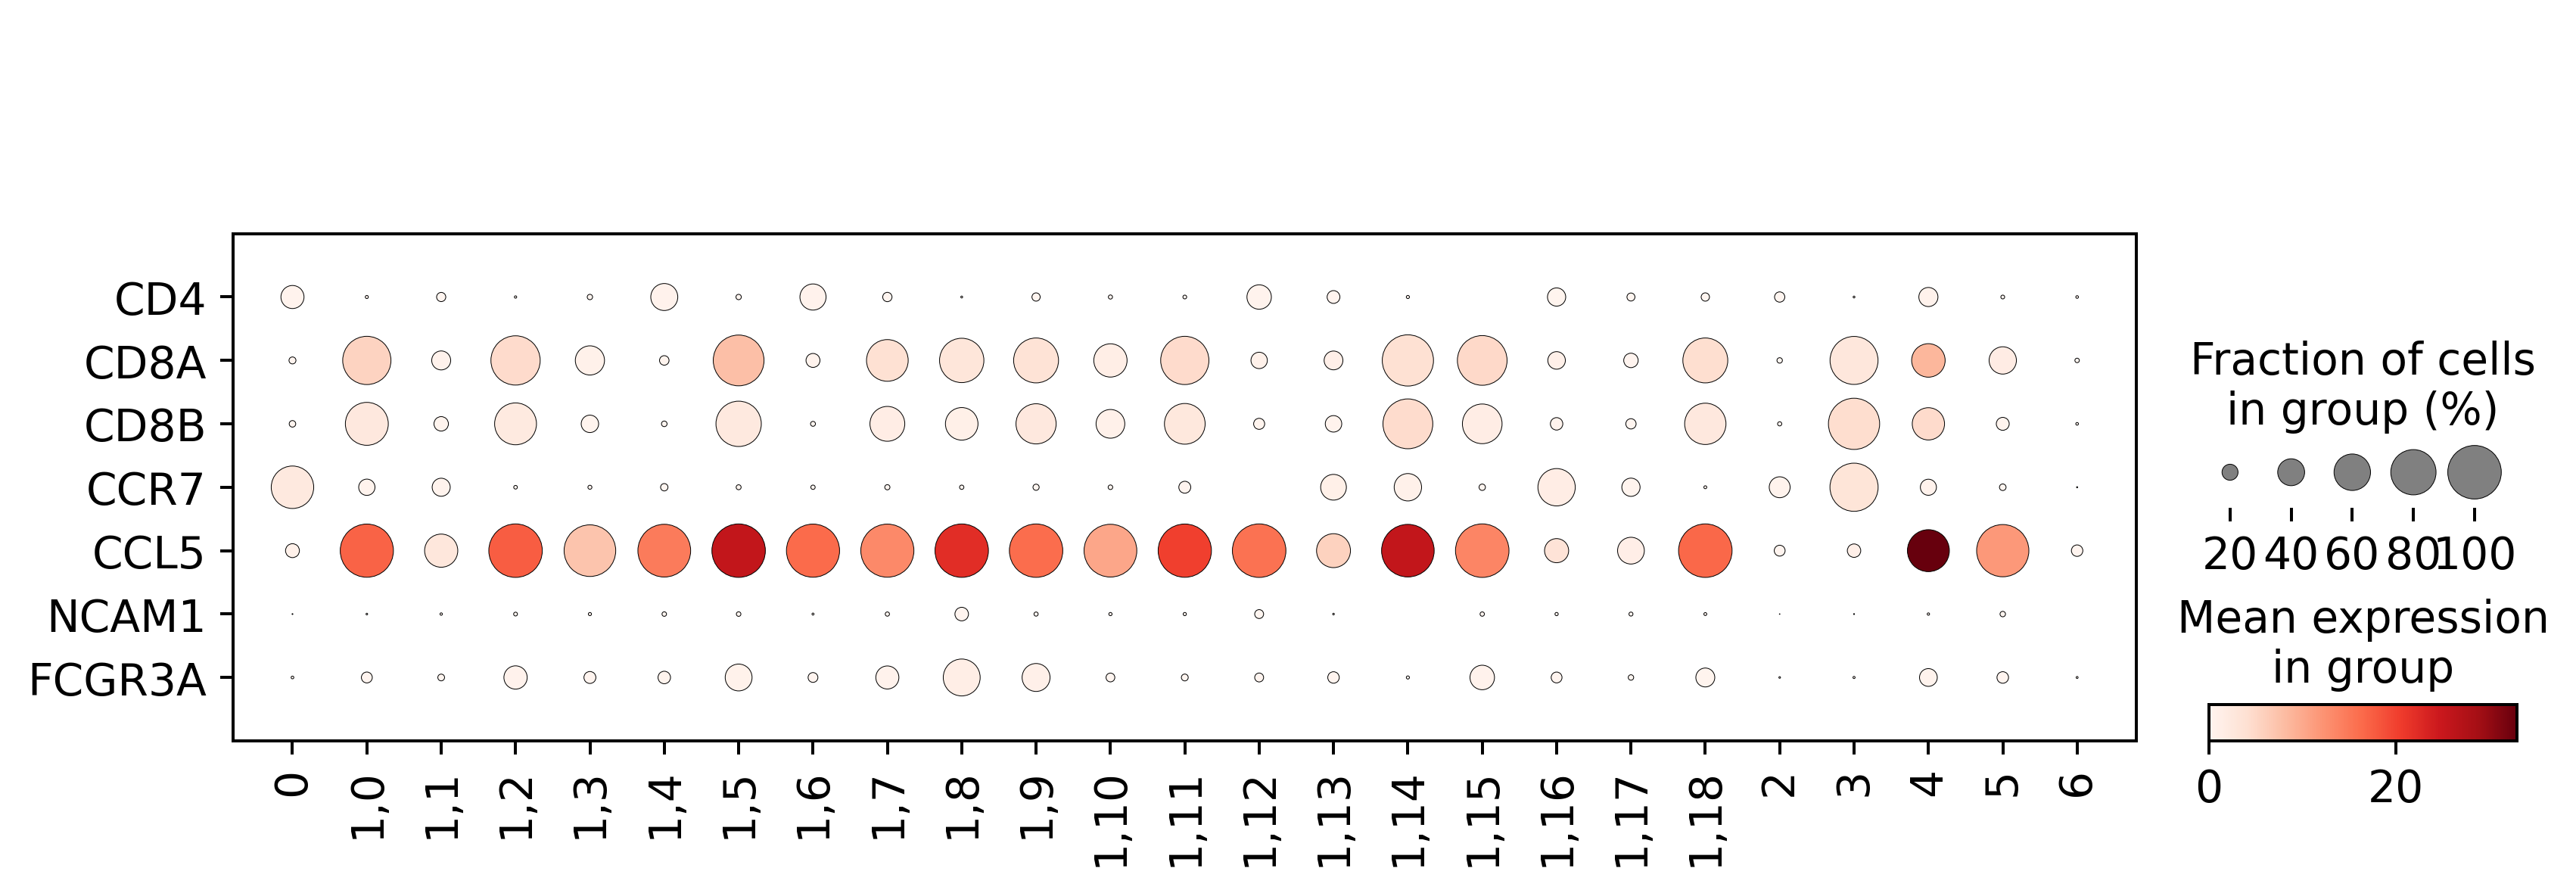

In [36]:
# zoom-in on cluster 1
sc.tl.louvain(adata_tcells, restrict_to = ('louvain_tcells',['1']), key_added = 'louvain_tcells_1', resolution = 1)
sc.pl.dotplot(adata_tcells, var_names = ['CD4', 'CD8A', 'CD8B', 'CCR7', 'CCL5', 'NCAM1','FCGR3A'], groupby = 'louvain_tcells_1', swap_axes = True) #CD4+ T

In [172]:
# define subclusters
def Annotation_tcells(adata_obj, barcode):
    
    curr_louvain_coarse = adata_obj.obs.loc[barcode,'louvain_tcells']
    
    if curr_louvain_coarse in ['0']:
        return('CD4 naïve T')
    
    if curr_louvain_coarse in ['6']:
        return('CD4 memory T')
    
    elif curr_louvain_coarse == '2':
        zoomed_in_louvain = adata_obj.obs.loc[barcode,'louvain_tcells_2']
        if zoomed_in_louvain in ['2,0', '2,1', '2,2', '2,3', '2,6', '2,8', '2,9', '2,12']:
            return('CD4 naïve T')
        elif zoomed_in_louvain in ['2,4', '2,5', '2,7', '2,10', '2,11']:
            return('CD4 memory T')
    
    elif curr_louvain_coarse == '1':
        zoomed_in_louvain = adata_obj.obs.loc[barcode,'louvain_tcells_1']
        if zoomed_in_louvain in ['1,0', '1,1', '1,2', '1,3', '1,5', '1,7', '1,9', '1,10', '1,11', '1,13', '1,14', '1,15', '1,17', '1,18']:
            return('CD8 memory T')
        elif zoomed_in_louvain in ['1,8']:
            return('NKT')
        elif zoomed_in_louvain in ['1,16']:
            return('CD8 naïve T')
        elif zoomed_in_louvain in ['1,4', '1,6', '1,12']:
            return('CD4 memory T')
    
    elif curr_louvain_coarse == '3':
        return('CD8 naïve T')
    
    elif curr_louvain_coarse == '4':
        zoomed_in_louvain = adata_obj.obs.loc[barcode,'louvain_tcells_4']
        if zoomed_in_louvain in ['4,0', '4,1', '4,3']:
            return('Prolif T')
        elif zoomed_in_louvain == '4,2':
            return('Treg')
        
    elif curr_louvain_coarse == '5':
        zoomed_in_louvain = adata_obj.obs.loc[barcode,'louvain_tcells_5']
        if zoomed_in_louvain in ['5,0', '5,4', '5,5', '5,6']:
            return('γδT')
        elif zoomed_in_louvain in ['5,1', '5,2', '5,3']:
            return('MAIT')

    else:
        return('Unassigned')

In [173]:
# add annotations to object to transfer at the end
adata_tcells.obs['barcode'] = adata_tcells.obs.index
adata_tcells.obs['Tcells_Celltype'] = adata_tcells.obs['barcode'].apply(lambda x: Annotation_tcells(adata_tcells, x))

... storing 'Tcells_Celltype' as categorical


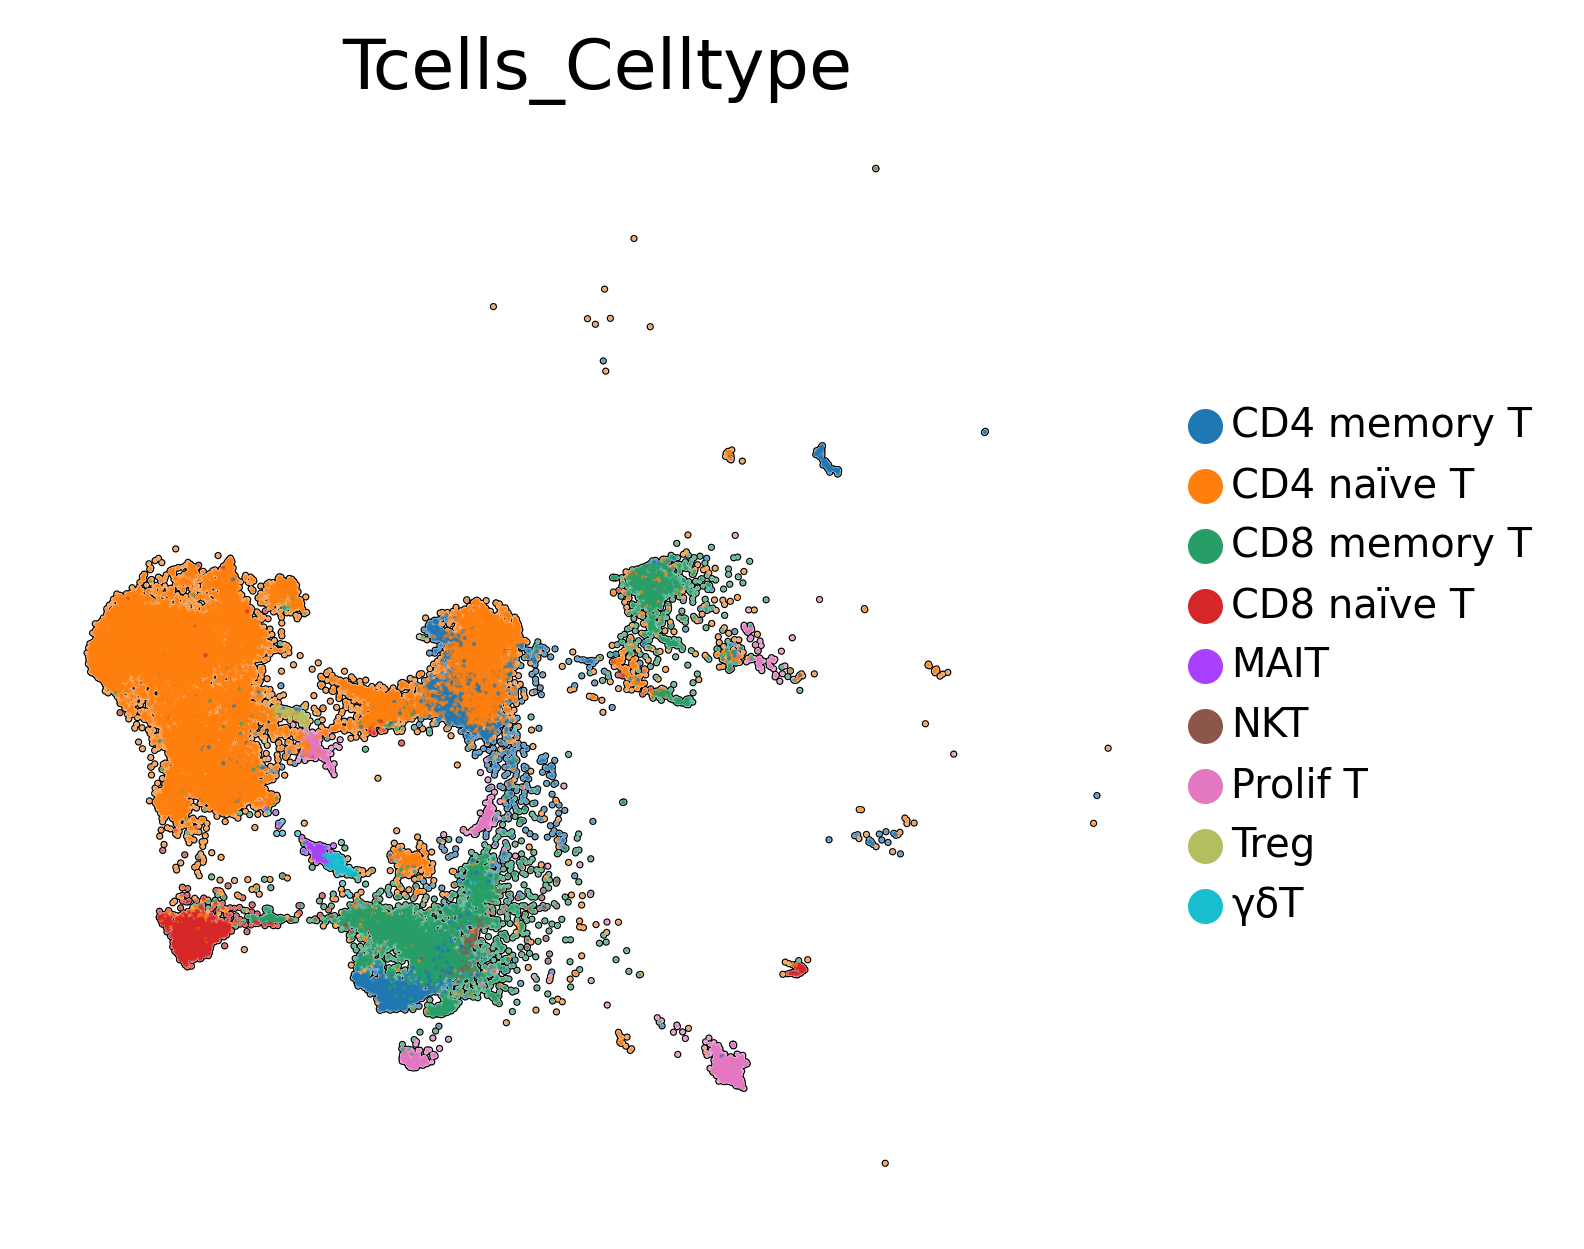

In [174]:
sc.pl.umap(adata_tcells, color = ['Tcells_Celltype'], legend_fontsize = 8, frameon = False, add_outline = True)

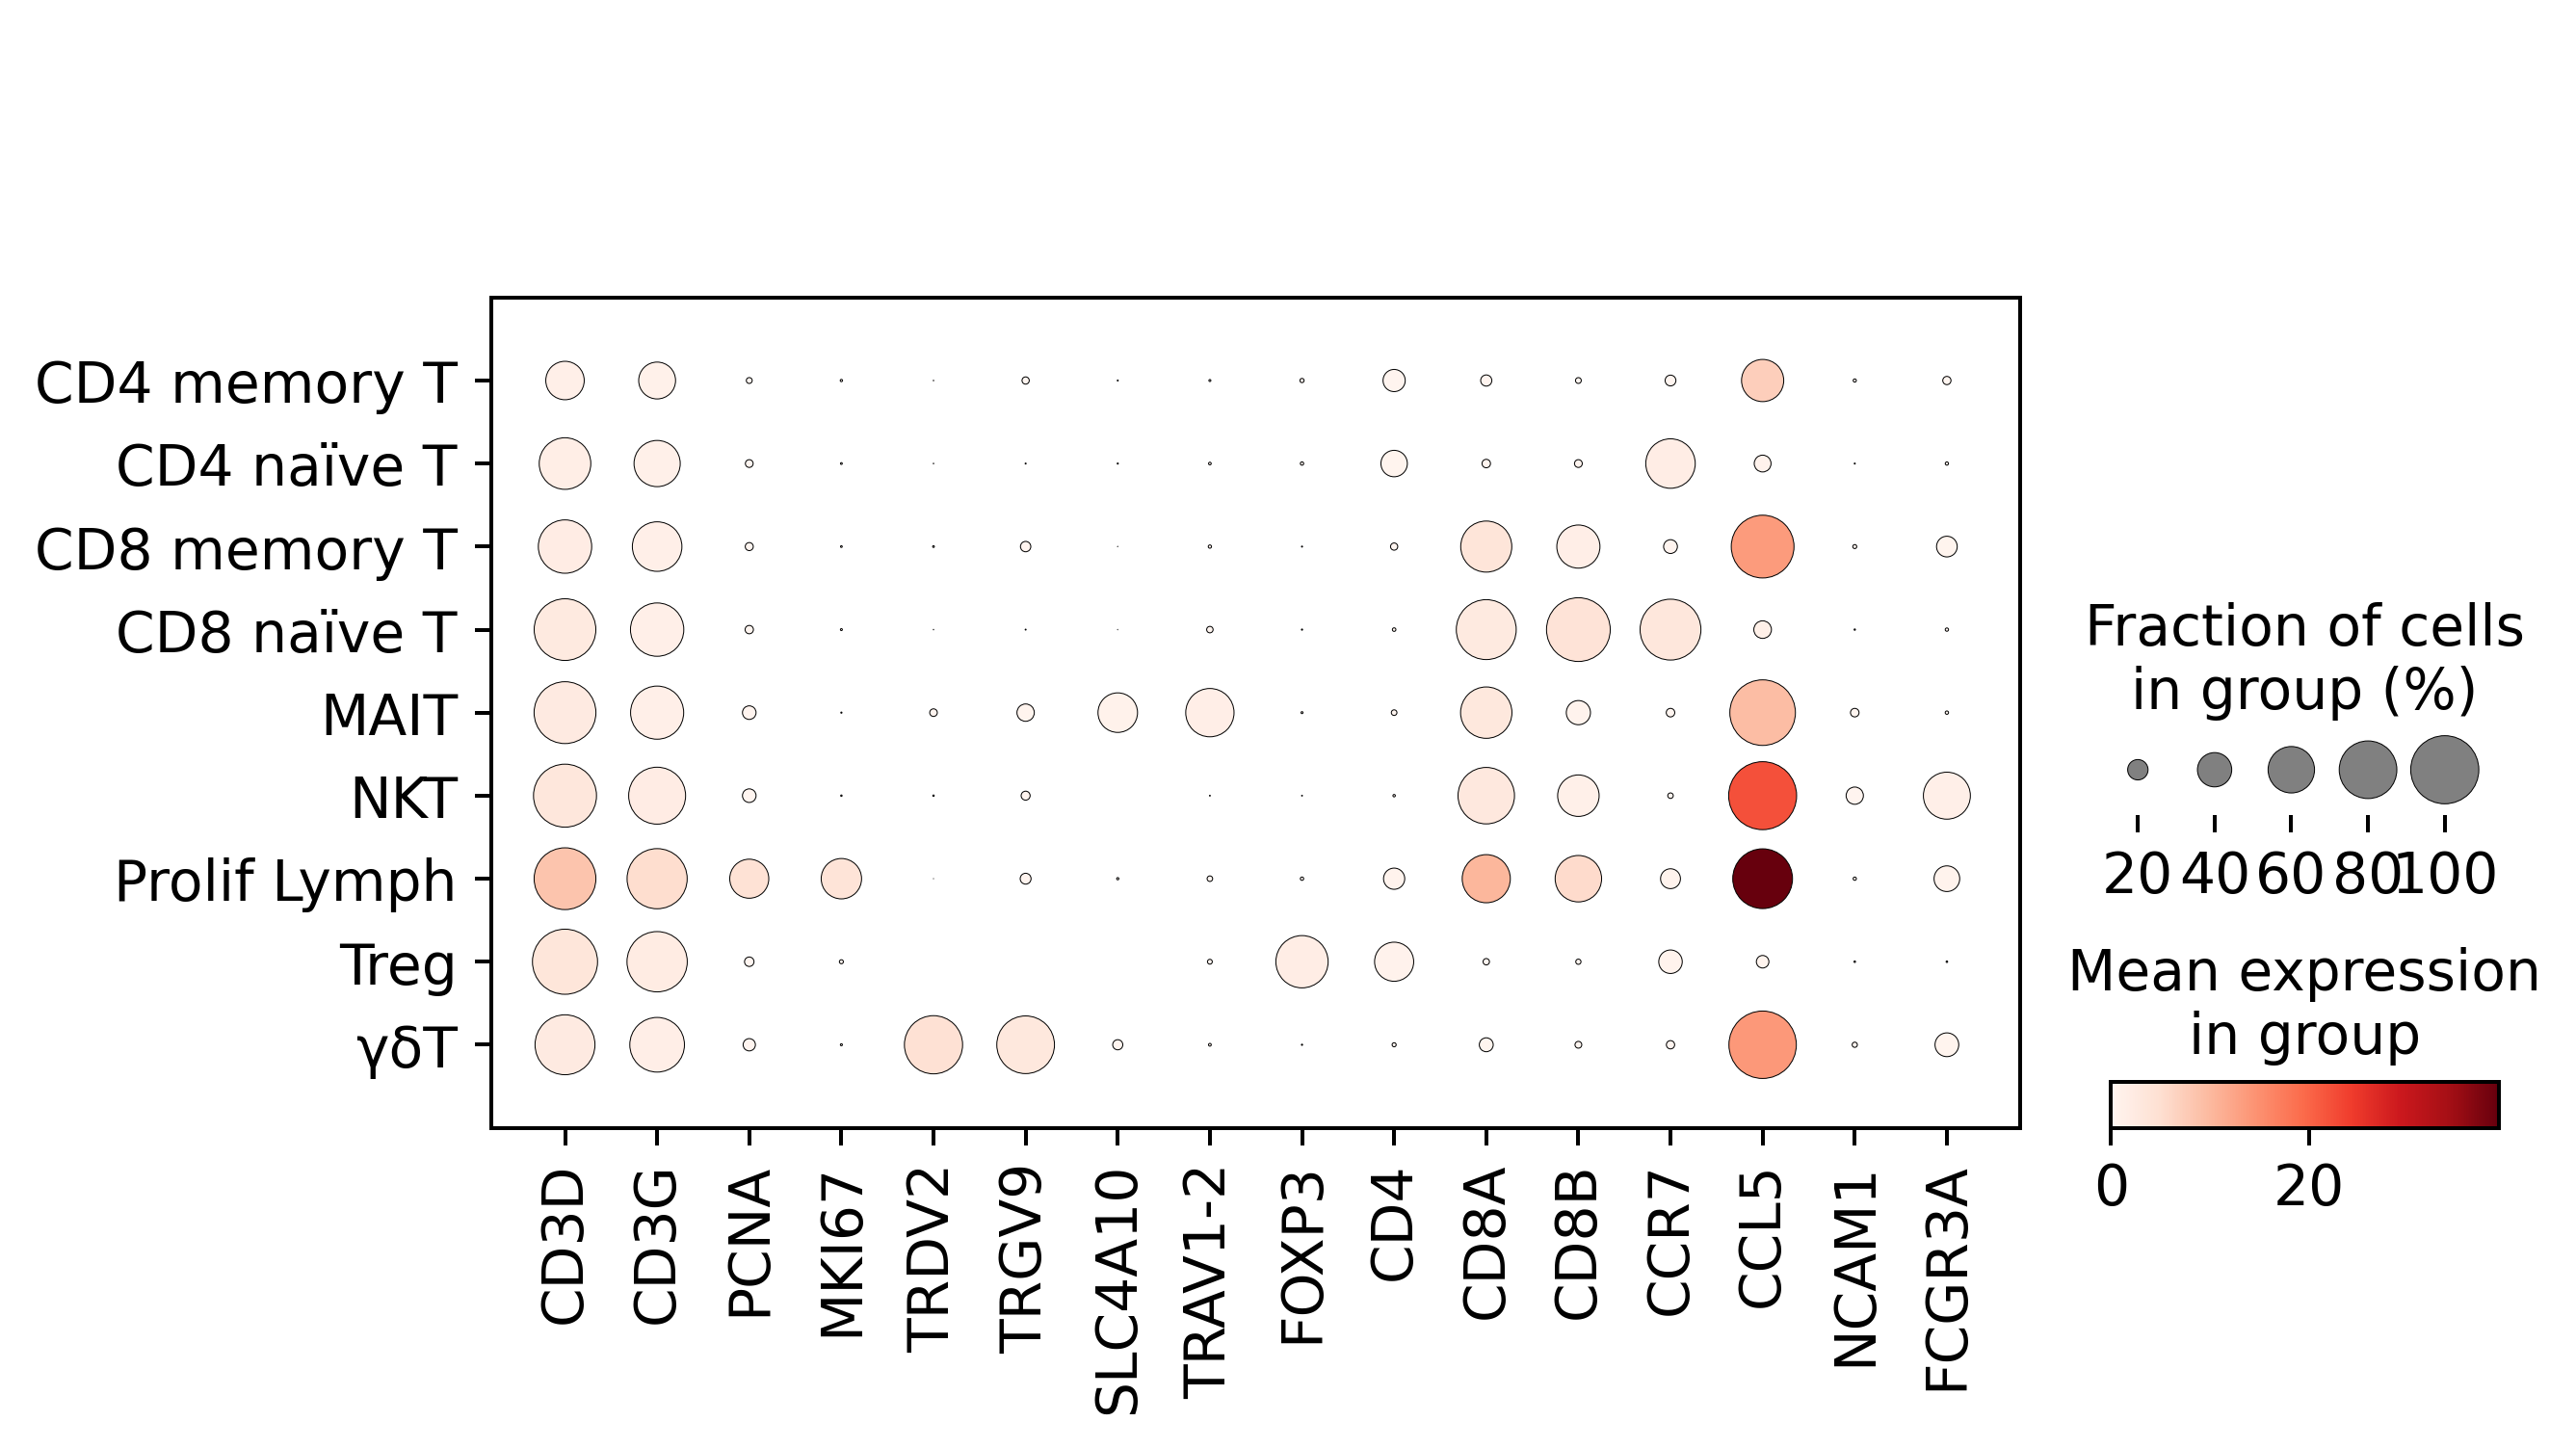

In [169]:
sc.pl.dotplot(adata_tcells, var_names = ['CD3D', 'CD3G', 'PCNA', 'MKI67', 'TRDV2', 'TRGV9', 'SLC4A10', 'TRAV1-2', 'FOXP3', 'CD4', 'CD8A', 'CD8B', 'CCR7', 'CCL5', 'NCAM1','FCGR3A'], groupby = 'Tcells_Celltype')

Naive B cells

In [40]:
# use totalVI representation of only the B cell subset for higher resolution
adata_bcells = anndata.read_h5ad(save_path + "N3-pbmc-bcells-tvi.h5ad")
adata_bcells

AnnData object with n_obs × n_vars = 97499 × 33759
    obs: 'souporcell', 'demultiplexed', 'sample_names', 'log2p1_count', 'percent_mito', 'n_genes', 'batch', 'FolderName', 'Lane', 'Sort', 'Type', 'Donor Id', 'Age', 'Sex', 'Race', 'Ethnicity', 'BMI', 'Pre-existing heart disease', 'Pre-existing lung disease', 'Pre-existing kidney disease', 'Pre-existing diabetes', 'Pre-existing Hypertension', 'Pre-existing immunocompromised condition', 'Smoking', 'SARS-CoV-2 PCR', 'SARS-CoV-2 Ab', 'Symptomatic', 'Admitted to hospital', 'Highest level of respiratory support', 'Vasoactive agents required during hospitalization', '28-day death', 'scrublet_pred', 'scrublet_local_pred', 'scrublet_score', 'scrublet_cluster_score', 'filtered_cells', 'S_score', 'G2M_score', 'phase', 'leiden_sampl_cc', 'leidenres2_sampl_cc', 'DonorSubset', 'leiden_scvi_subset_cc', 'leidenres2_scvi_subset_cc', 'leiden_tvi_subset_cc', 'leidenres2_tvi_subset_cc', 'louvain', 'Celltype_Predictions', 'Prediction_Probabilities', 'louva

In [43]:
# to separate naïve from immature B cells
adata_naive = adata_bcells[adata_bcells.obs["Initial_Celltype"] == "Naïve B"]
adata_naive

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


View of AnnData object with n_obs × n_vars = 8934 × 33759
    obs: 'souporcell', 'demultiplexed', 'sample_names', 'log2p1_count', 'percent_mito', 'n_genes', 'batch', 'FolderName', 'Lane', 'Sort', 'Type', 'Donor Id', 'Age', 'Sex', 'Race', 'Ethnicity', 'BMI', 'Pre-existing heart disease', 'Pre-existing lung disease', 'Pre-existing kidney disease', 'Pre-existing diabetes', 'Pre-existing Hypertension', 'Pre-existing immunocompromised condition', 'Smoking', 'SARS-CoV-2 PCR', 'SARS-CoV-2 Ab', 'Symptomatic', 'Admitted to hospital', 'Highest level of respiratory support', 'Vasoactive agents required during hospitalization', '28-day death', 'scrublet_pred', 'scrublet_local_pred', 'scrublet_score', 'scrublet_cluster_score', 'filtered_cells', 'S_score', 'G2M_score', 'phase', 'leiden_sampl_cc', 'leidenres2_sampl_cc', 'DonorSubset', 'leiden_scvi_subset_cc', 'leidenres2_scvi_subset_cc', 'leiden_tvi_subset_cc', 'leidenres2_tvi_subset_cc', 'louvain', 'Celltype_Predictions', 'Prediction_Probabilities',

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 18 clusters and added
    'louvain_bcells', the cluster labels (adata.obs, categorical) (0:00:00)


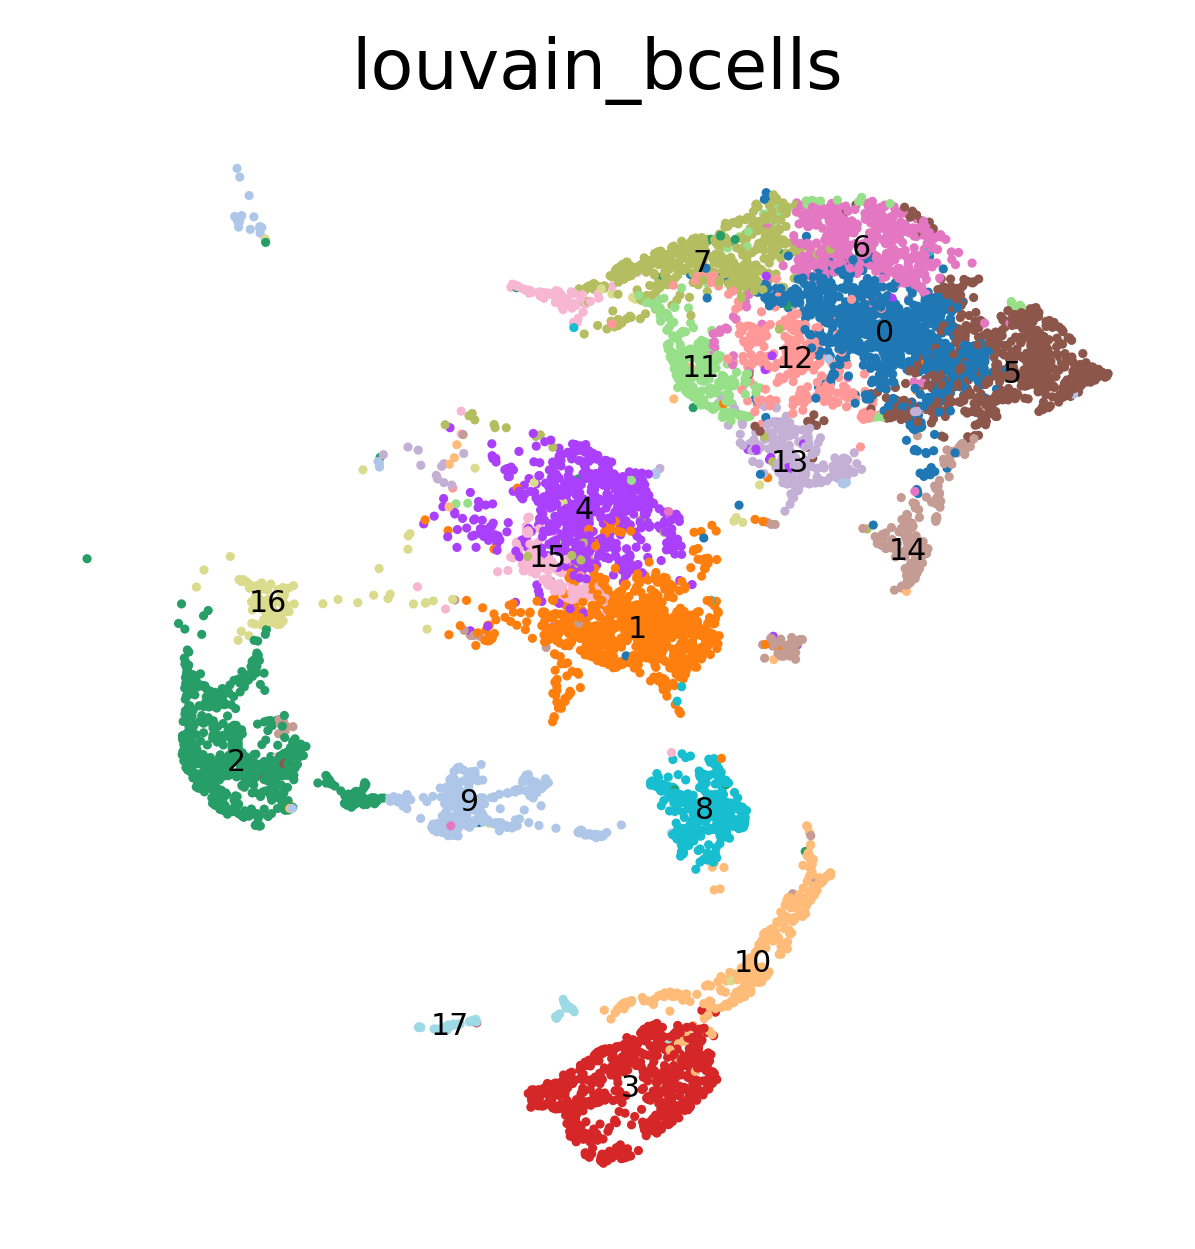

In [46]:
# subcluster cell types using known cell-specific marker genes
sc.tl.louvain(adata_naive, key_added = 'louvain_bcells', resolution = 0.8)
sc.pl.umap(adata_naive, color = ["louvain_bcells"], legend_loc = 'on data', legend_fontweight = 'normal', legend_fontsize = 6, frameon = False)

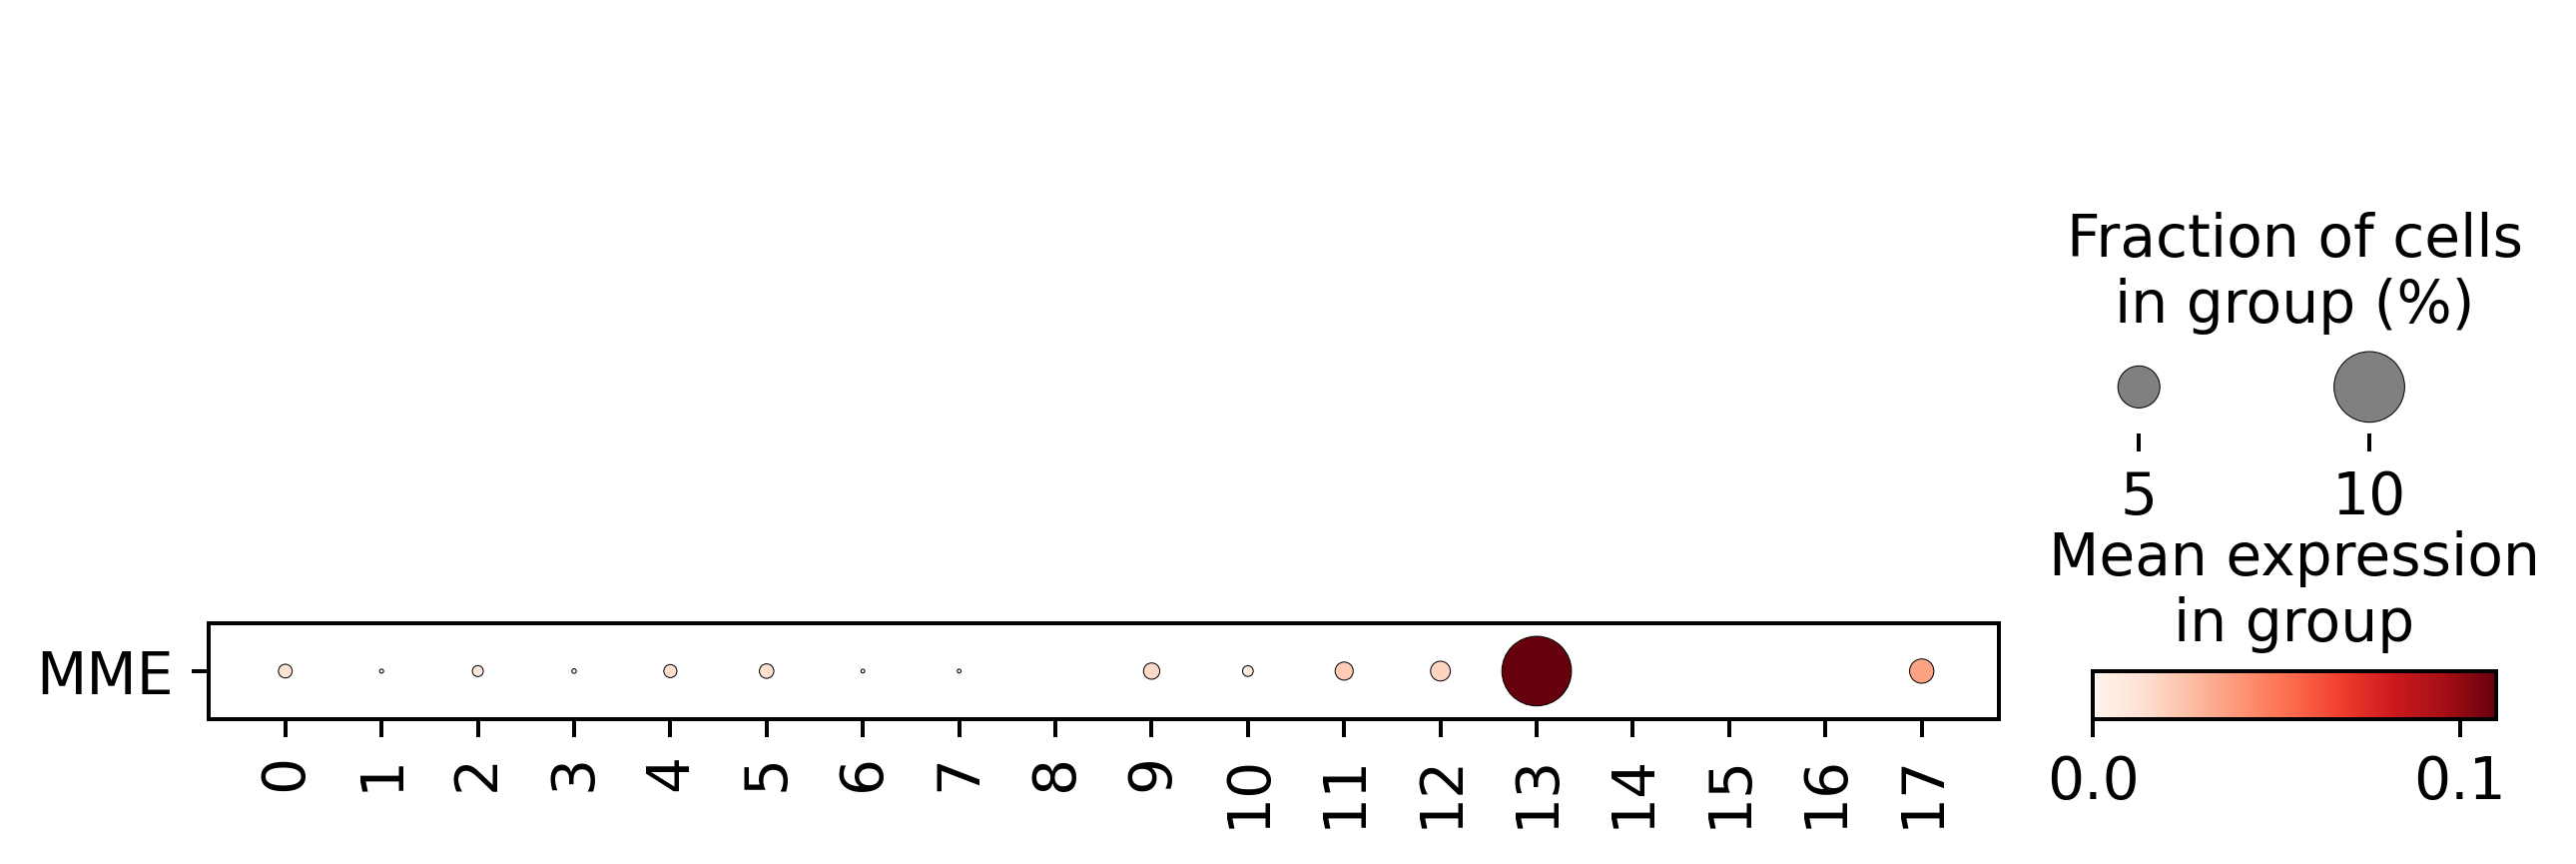

In [336]:
sc.pl.dotplot(adata_naive, var_names = ['MME'], groupby = 'louvain_bcells', swap_axes = True) #Immature B

In [47]:
# define subclusters
def Annotation_bcells(adata_obj, barcode):
    
    curr_louvain_coarse = adata_obj.obs.loc[barcode,'louvain_bcells']
    
    if curr_louvain_coarse in ['13']:
        return('Immature B')
    
    else:
        return('Naïve B')

In [48]:
# add annotations to object to transfer at the end
adata_naive.obs['barcode'] = adata_naive.obs.index
adata_naive.obs['Bcells_Celltype'] = adata_naive.obs['barcode'].apply(lambda x: Annotation_bcells(adata_naive, x))

... storing 'Bcells_Celltype' as categorical


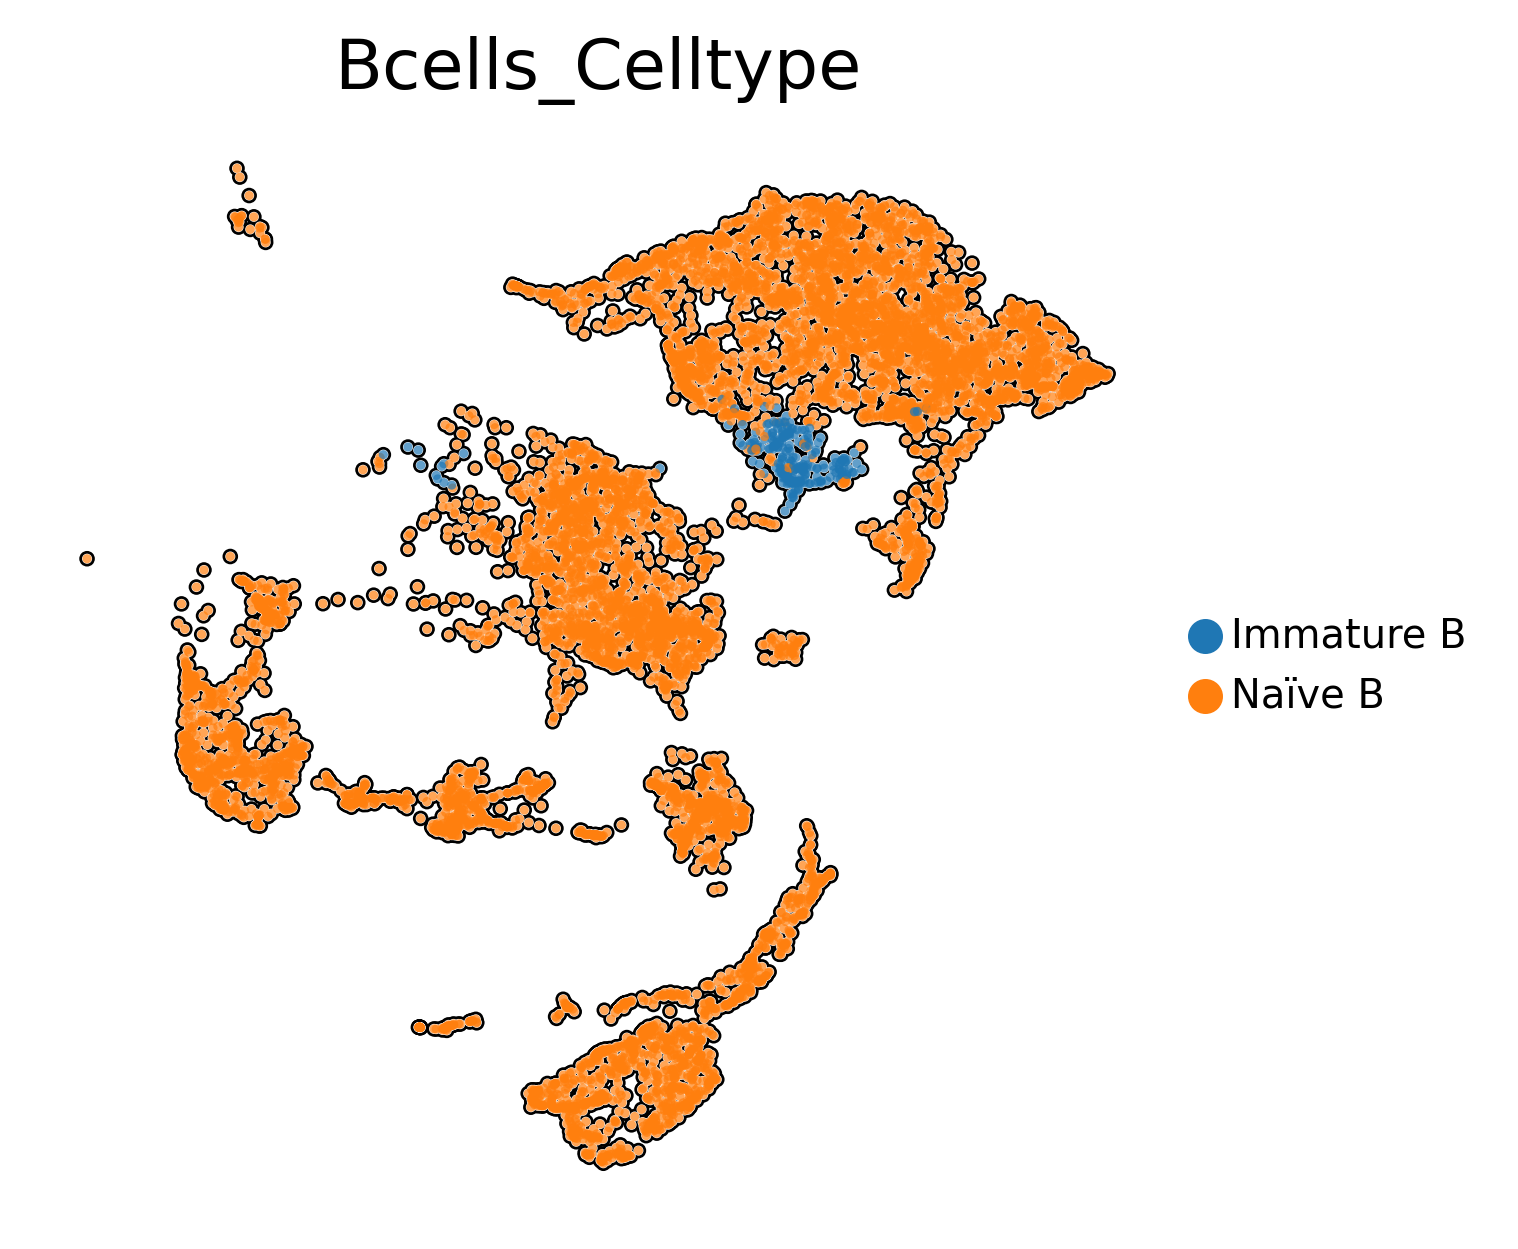

In [49]:
sc.pl.umap(adata_naive, color = ['Bcells_Celltype'], legend_fontsize = 8, frameon = False, add_outline = True)

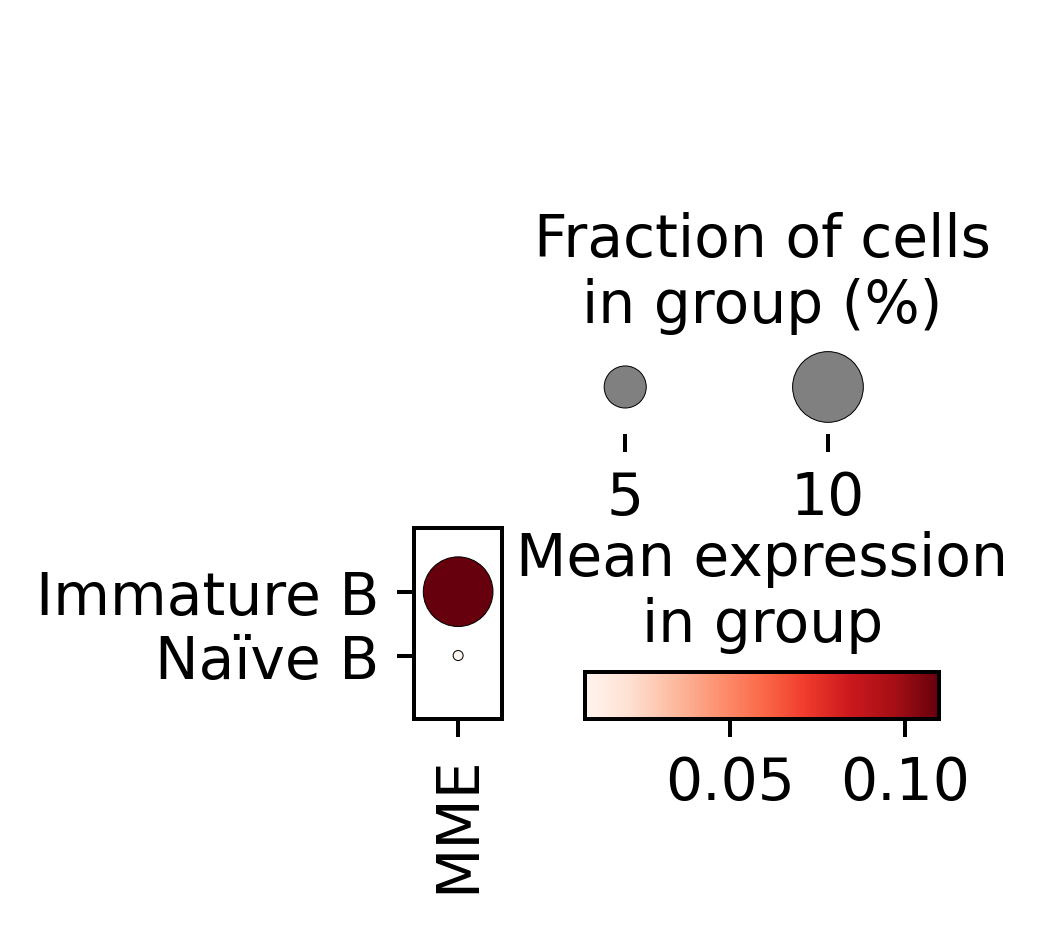

In [341]:
sc.pl.dotplot(adata_naive, var_names = ['MME'], groupby = 'Bcells_Celltype')

Saving Data

In [14]:
# add the final annotations to the original filtered object
adata = anndata.read_h5ad(save_path + "N3-pbmc-predictions.h5ad")
adata

AnnData object with n_obs × n_vars = 97499 × 22572
    obs: 'souporcell', 'demultiplexed', 'sample_names', 'log2p1_count', 'percent_mito', 'n_genes', 'batch', 'FolderName', 'Lane', 'Sort', 'Type', 'Donor Id', 'Age', 'Sex', 'Race', 'Ethnicity', 'BMI', 'Pre-existing heart disease', 'Pre-existing lung disease', 'Pre-existing kidney disease', 'Pre-existing diabetes', 'Pre-existing Hypertension', 'Pre-existing immunocompromised condition', 'Smoking', 'SARS-CoV-2 PCR', 'SARS-CoV-2 Ab', 'Symptomatic', 'Admitted to hospital', 'Highest level of respiratory support', 'Vasoactive agents required during hospitalization', '28-day death', 'scrublet_pred', 'scrublet_local_pred', 'scrublet_score', 'scrublet_cluster_score', 'filtered_cells', 'S_score', 'G2M_score', 'phase', 'leiden_sampl_cc', 'leidenres2_sampl_cc', 'DonorSubset', 'leiden_scvi_subset_cc', 'leidenres2_scvi_subset_cc', 'leiden_tvi_subset_cc', 'leidenres2_tvi_subset_cc', 'louvain', 'Celltype_Predictions', 'Prediction_Probabilities'
    var

In [18]:
Annotations_NK_table = adata_NK.obs.loc[:,['NK_Celltype']]
Annotations_NK_table.to_csv('./table_NK_celltype_annotations.csv')
Annotations_NK_table

NK_Celltype
RV8919578_AAACCTGAGAAACCTA-1  NK CD56(bright)
RV8919578_AAACCTGAGCGAAGGG-1     NK CD56(dim)
RV8919578_AAACCTGAGCGATGAC-1  NK CD56(bright)
RV8919578_AAACCTGAGCTGTTCA-1     NK CD56(dim)
RV8919578_AAACCTGCAGCCAATT-1     NK CD56(dim)
...                                       ...
RV8959686_TTTATGCCAGCGATCC-1     NK CD56(dim)
RV8959686_TTTCCTCGTGCGCTTG-1     NK CD56(dim)
RV8959686_TTTCCTCTCATGTGGT-1     NK CD56(dim)
RV8959686_TTTGCGCGTGGTAACG-1     NK CD56(dim)
RV8959686_TTTGTCAGTGACAAAT-1  NK CD56(bright)

[12356 rows x 1 columns]

In [87]:
Annotations_DC_table = adata_DC.obs.loc[:,['DC_Celltype']]
Annotations_DC_table.to_csv('./table_DC_celltype_annotations.csv')
Annotations_DC_table

DC_Celltype
RV8919578_AACTCCCGTCCCGACA-1        cDC2
RV8919578_ACACCCTCAAGGTTCT-1        cDC3
RV8919578_ACACCGGCAAGCGTAG-1        cDC2
RV8919578_AGAATAGCAAACTGCT-1        cDC2
RV8919578_AGGGATGCAGGATCGA-1        cDC3
...                                  ...
RV8959686_TGCGGGTCACCTCGTT-1        cDC3
RV8959686_TGCTACCAGGTAGCTG-1        cDC3
RV8959686_TGCTACCCACCAACCG-1        cDC3
RV8959686_TGGTTAGAGGATGGAA-1        cDC3
RV8959686_TTTGCGCTCAGCCTAA-1        cDC3

[543 rows x 1 columns]

In [176]:
Annotations_tcells_table = adata_tcells.obs.loc[:,['Tcells_Celltype']]
Annotations_tcells_table.to_csv('./table_tcells_celltype_annotations.csv')
Annotations_tcells_table

Tcells_Celltype
RV8919578_AAACCTGAGGTGCTAG-1     CD4 naïve T
RV8919578_AAACCTGAGTAGGTGC-1     CD4 naïve T
RV8919578_AAACCTGAGTGGTAAT-1     CD4 naïve T
RV8919578_AAACCTGAGTTCGCAT-1     CD4 naïve T
RV8919578_AAACCTGCAGACAGGT-1     CD4 naïve T
...                                      ...
RV8959686_TTTGGTTGTTGAGTTC-1     CD4 naïve T
RV8959686_TTTGTCAAGCGCCTCA-1     CD4 naïve T
RV8959686_TTTGTCACAGCGATCC-1    CD4 memory T
RV8959686_TTTGTCAGTATGAATG-1     CD4 naïve T
RV8959686_TTTGTCAGTTGCCTCT-1     CD4 naïve T

[41479 rows x 1 columns]

In [89]:
Annotations_bcells_table = adata_naive.obs.loc[:,['Bcells_Celltype']]
Annotations_bcells_table.to_csv('./table_bcells_celltype_annotations.csv')
Annotations_bcells_table

Bcells_Celltype
RV8919578_AAACCTGAGAGCAATT-1         Naïve B
RV8919578_AAACCTGCACTCTGTC-1         Naïve B
RV8919578_AAACCTGGTGGGTATG-1         Naïve B
RV8919578_AAACGGGAGTGGTAGC-1         Naïve B
RV8919578_AAACGGGGTGCTAGCC-1         Naïve B
...                                      ...
RV8959686_TTTGCGCAGAAGGTTT-1         Naïve B
RV8959686_TTTGCGCTCCCAAGTA-1         Naïve B
RV8959686_TTTGGTTAGAGGTTAT-1         Naïve B
RV8959686_TTTGTCAAGAGTCTGG-1         Naïve B
RV8959686_TTTGTCAGTCGGCATC-1         Naïve B

[8934 rows x 1 columns]

In [17]:
Annotations_general_table = pd.read_csv('./table_general_celltype_annotations.csv', index_col = 0 )
Annotations_general_table

General_Celltype
RV8919578_AAACCTGAGAAACCTA-1               NK
RV8919578_AAACCTGAGAGCAATT-1          Naïve B
RV8919578_AAACCTGAGAGCTGGT-1              pDC
RV8919578_AAACCTGAGCGAAGGG-1               NK
RV8919578_AAACCTGAGCGATGAC-1               NK
...                                       ...
RV8959686_TTTGTCAGTATGAATG-1          T-cells
RV8959686_TTTGTCAGTCGGCATC-1          Naïve B
RV8959686_TTTGTCAGTGACAAAT-1               NK
RV8959686_TTTGTCAGTTGCCTCT-1          T-cells
RV8959686_TTTGTCATCAGTCCCT-1        Platelets

[97499 rows x 1 columns]

In [146]:
np.unique(Annotations_general_table, return_counts = True)

(array(['CD14 mono', 'CD16 mono', 'DC', 'Exhausted B', 'HSC', 'Memory B',
        'NK', 'Naïve B', 'Neutrophil', 'Plasma B', 'Plasmablast',
        'Platelets', 'RBC', 'T-cells', 'pDC'], dtype=object),
 array([23648,  1923,   543,   510,   270,   457, 12356,  8934,   299,
          415,  1239,  1444,  3907, 41479,    75]))

In [19]:
Annotations_table = Annotations_general_table[(Annotations_general_table['General_Celltype'] != 'NK')]
np.unique(Annotations_table, return_counts = True)

(array(['CD14 mono', 'CD16 mono', 'DC', 'Exhausted B', 'HSC', 'Memory B',
        'Naïve B', 'Neutrophil', 'Plasma B', 'Plasmablast', 'Platelets',
        'RBC', 'T-cells', 'pDC'], dtype=object),
 array([23648,  1923,   543,   510,   270,   457,  8934,   299,   415,
         1239,  1444,  3907, 41479,    75]))

In [20]:
Annotations_general_table.shape

(97499, 1)

In [21]:
Annotations_table.shape

(85143, 1)

In [22]:
Annotations_NK_table.shape

(12356, 1)

In [23]:
Annotations_table_final = Annotations_table.append(Annotations_NK_table)
Annotations_table_final

General_Celltype      NK_Celltype
RV8919578_AAACCTGAGAGCAATT-1          Naïve B              NaN
RV8919578_AAACCTGAGAGCTGGT-1              pDC              NaN
RV8919578_AAACCTGAGGTGCTAG-1          T-cells              NaN
RV8919578_AAACCTGAGTAGGTGC-1          T-cells              NaN
RV8919578_AAACCTGAGTGGTAAT-1          T-cells              NaN
...                                       ...              ...
RV8959686_TTTATGCCAGCGATCC-1              NaN     NK CD56(dim)
RV8959686_TTTCCTCGTGCGCTTG-1              NaN     NK CD56(dim)
RV8959686_TTTCCTCTCATGTGGT-1              NaN     NK CD56(dim)
RV8959686_TTTGCGCGTGGTAACG-1              NaN     NK CD56(dim)
RV8959686_TTTGTCAGTGACAAAT-1              NaN  NK CD56(bright)

[97499 rows x 2 columns]

In [24]:
Annotations_table_final = Annotations_table_final.assign(**{
    'General_Celltype': Annotations_table_final['General_Celltype'].fillna(Annotations_table_final['NK_Celltype'])})
Annotations_table_final

General_Celltype      NK_Celltype
RV8919578_AAACCTGAGAGCAATT-1          Naïve B              NaN
RV8919578_AAACCTGAGAGCTGGT-1              pDC              NaN
RV8919578_AAACCTGAGGTGCTAG-1          T-cells              NaN
RV8919578_AAACCTGAGTAGGTGC-1          T-cells              NaN
RV8919578_AAACCTGAGTGGTAAT-1          T-cells              NaN
...                                       ...              ...
RV8959686_TTTATGCCAGCGATCC-1     NK CD56(dim)     NK CD56(dim)
RV8959686_TTTCCTCGTGCGCTTG-1     NK CD56(dim)     NK CD56(dim)
RV8959686_TTTCCTCTCATGTGGT-1     NK CD56(dim)     NK CD56(dim)
RV8959686_TTTGCGCGTGGTAACG-1     NK CD56(dim)     NK CD56(dim)
RV8959686_TTTGTCAGTGACAAAT-1  NK CD56(bright)  NK CD56(bright)

[97499 rows x 2 columns]

In [25]:
Annotations_table = Annotations_table_final[(Annotations_table_final['General_Celltype'] != 'DC')].copy()
np.unique(Annotations_table['General_Celltype'], return_counts = True)

(array(['CD14 mono', 'CD16 mono', 'Exhausted B', 'HSC', 'Memory B',
        'NK CD56(bright)', 'NK CD56(dim)', 'NKT', 'Naïve B', 'Neutrophil',
        'Plasma B', 'Plasmablast', 'Platelets', 'Prolif NK', 'Prolif T',
        'RBC', 'T-cells', 'pDC'], dtype=object),
 array([23648,  1923,   510,   270,   457,  3638,  6948,  1464,  8934,
          299,   415,  1239,  1444,   226,    80,  3907, 41479,    75]))

In [154]:
Annotations_table.shape

(96956, 2)

In [155]:
Annotations_DC_table.shape

(543, 1)

In [28]:
Annotations_table_final = Annotations_table.append(Annotations_DC_table)
Annotations_table_final

General_Celltype NK_Celltype DC_Celltype
RV8919578_AAACCTGAGAGCAATT-1          Naïve B         NaN         NaN
RV8919578_AAACCTGAGAGCTGGT-1              pDC         NaN         NaN
RV8919578_AAACCTGAGGTGCTAG-1          T-cells         NaN         NaN
RV8919578_AAACCTGAGTAGGTGC-1          T-cells         NaN         NaN
RV8919578_AAACCTGAGTGGTAAT-1          T-cells         NaN         NaN
...                                       ...         ...         ...
RV8959686_TGCGGGTCACCTCGTT-1              NaN         NaN        cDC3
RV8959686_TGCTACCAGGTAGCTG-1              NaN         NaN        cDC3
RV8959686_TGCTACCCACCAACCG-1              NaN         NaN        cDC3
RV8959686_TGGTTAGAGGATGGAA-1              NaN         NaN        cDC3
RV8959686_TTTGCGCTCAGCCTAA-1              NaN         NaN        cDC3

[97499 rows x 3 columns]

In [29]:
Annotations_table_final = Annotations_table_final.assign(**{
    'General_Celltype': Annotations_table_final['General_Celltype'].fillna(Annotations_table_final['DC_Celltype'])})
Annotations_table_final

General_Celltype NK_Celltype DC_Celltype
RV8919578_AAACCTGAGAGCAATT-1          Naïve B         NaN         NaN
RV8919578_AAACCTGAGAGCTGGT-1              pDC         NaN         NaN
RV8919578_AAACCTGAGGTGCTAG-1          T-cells         NaN         NaN
RV8919578_AAACCTGAGTAGGTGC-1          T-cells         NaN         NaN
RV8919578_AAACCTGAGTGGTAAT-1          T-cells         NaN         NaN
...                                       ...         ...         ...
RV8959686_TGCGGGTCACCTCGTT-1             cDC3         NaN        cDC3
RV8959686_TGCTACCAGGTAGCTG-1             cDC3         NaN        cDC3
RV8959686_TGCTACCCACCAACCG-1             cDC3         NaN        cDC3
RV8959686_TGGTTAGAGGATGGAA-1             cDC3         NaN        cDC3
RV8959686_TTTGCGCTCAGCCTAA-1             cDC3         NaN        cDC3

[97499 rows x 3 columns]

In [30]:
Annotations_table = Annotations_table_final[(Annotations_table_final['General_Celltype'] != 'T-cells')].copy()
np.unique(Annotations_table['General_Celltype'], return_counts = True)

(array(['CD14 mono', 'CD16 mono', 'Exhausted B', 'HSC', 'Memory B',
        'NK CD56(bright)', 'NK CD56(dim)', 'NKT', 'Naïve B', 'Neutrophil',
        'Plasma B', 'Plasmablast', 'Platelets', 'Prolif NK', 'Prolif T',
        'RBC', 'cDC1', 'cDC2', 'cDC3', 'pDC'], dtype=object),
 array([23648,  1923,   510,   270,   457,  3638,  6948,  1464,  8934,
          299,   415,  1239,  1444,   226,    80,  3907,    23,   254,
          266,    75]))

In [159]:
Annotations_table.shape

(56020, 3)

In [160]:
Annotations_tcells_table.shape

(41479, 1)

In [31]:
Annotations_table_final = Annotations_table.append(Annotations_tcells_table)
Annotations_table_final

General_Celltype NK_Celltype DC_Celltype  \
RV8919578_AAACCTGAGAGCAATT-1          Naïve B         NaN         NaN   
RV8919578_AAACCTGAGAGCTGGT-1              pDC         NaN         NaN   
RV8919578_AAACCTGCACCGAATT-1        CD16 mono         NaN         NaN   
RV8919578_AAACCTGCACTCTGTC-1          Naïve B         NaN         NaN   
RV8919578_AAACCTGGTGGGTATG-1          Naïve B         NaN         NaN   
...                                       ...         ...         ...   
RV8959686_TTTGGTTGTTGAGTTC-1              NaN         NaN         NaN   
RV8959686_TTTGTCAAGCGCCTCA-1              NaN         NaN         NaN   
RV8959686_TTTGTCACAGCGATCC-1              NaN         NaN         NaN   
RV8959686_TTTGTCAGTATGAATG-1              NaN         NaN         NaN   
RV8959686_TTTGTCAGTTGCCTCT-1              NaN         NaN         NaN   

                             Tcells_Celltype  
RV8919578_AAACCTGAGAGCAATT-1             NaN  
RV8919578_AAACCTGAGAGCTGGT-1             NaN  
RV8919578_AAACCTGCACCGAATT-1             NaN  
RV8919578_AAACCTGCACTCTGTC-1             NaN  
RV8919578_AAACCTGGTGGGTATG-1             NaN  
...                                      ...  
RV8959686_TTTGGTTGTTGAGTTC-1     CD4 naïve T  
RV8959686_TTTGTCAAGCGCCTCA-1     CD4 naïve T  
RV8959686_TTTGTCACAGCGATCC-1    CD4 memory T  
RV8959686_TTTGTCAGTATGAATG-1     CD4 naïve T  
RV8959686_TTTGTCAGTTGCCTCT-1     CD4 naïve T  

[97499 rows x 4 columns]

In [32]:
Annotations_table_final = Annotations_table_final.assign(**{
    'General_Celltype': Annotations_table_final['General_Celltype'].fillna(Annotations_table_final['Tcells_Celltype'])})
Annotations_table_final

General_Celltype NK_Celltype DC_Celltype  \
RV8919578_AAACCTGAGAGCAATT-1          Naïve B         NaN         NaN   
RV8919578_AAACCTGAGAGCTGGT-1              pDC         NaN         NaN   
RV8919578_AAACCTGCACCGAATT-1        CD16 mono         NaN         NaN   
RV8919578_AAACCTGCACTCTGTC-1          Naïve B         NaN         NaN   
RV8919578_AAACCTGGTGGGTATG-1          Naïve B         NaN         NaN   
...                                       ...         ...         ...   
RV8959686_TTTGGTTGTTGAGTTC-1      CD4 naïve T         NaN         NaN   
RV8959686_TTTGTCAAGCGCCTCA-1      CD4 naïve T         NaN         NaN   
RV8959686_TTTGTCACAGCGATCC-1     CD4 memory T         NaN         NaN   
RV8959686_TTTGTCAGTATGAATG-1      CD4 naïve T         NaN         NaN   
RV8959686_TTTGTCAGTTGCCTCT-1      CD4 naïve T         NaN         NaN   

                             Tcells_Celltype  
RV8919578_AAACCTGAGAGCAATT-1             NaN  
RV8919578_AAACCTGAGAGCTGGT-1             NaN  
RV8919578_AAACCTGCACCGAATT-1             NaN  
RV8919578_AAACCTGCACTCTGTC-1             NaN  
RV8919578_AAACCTGGTGGGTATG-1             NaN  
...                                      ...  
RV8959686_TTTGGTTGTTGAGTTC-1     CD4 naïve T  
RV8959686_TTTGTCAAGCGCCTCA-1     CD4 naïve T  
RV8959686_TTTGTCACAGCGATCC-1    CD4 memory T  
RV8959686_TTTGTCAGTATGAATG-1     CD4 naïve T  
RV8959686_TTTGTCAGTTGCCTCT-1     CD4 naïve T  

[97499 rows x 4 columns]

In [33]:
Annotations_table = Annotations_table_final[(Annotations_table_final['General_Celltype'] != 'Naïve B')].copy()
np.unique(Annotations_table['General_Celltype'], return_counts = True)

(array(['CD14 mono', 'CD16 mono', 'CD4 memory T', 'CD4 naïve T',
        'CD8 memory T', 'CD8 naïve T', 'Exhausted B', 'HSC', 'MAIT',
        'Memory B', 'NK CD56(bright)', 'NK CD56(dim)', 'NKT', 'Neutrophil',
        'Plasma B', 'Plasmablast', 'Platelets', 'Prolif NK', 'Prolif T',
        'RBC', 'Treg', 'cDC1', 'cDC2', 'cDC3', 'pDC', 'γδT'], dtype=object),
 array([23648,  1923,  3276, 26887,  6224,  2387,   510,   270,   223,
          457,  3638,  6948,  1807,   299,   415,  1239,  1444,   226,
         1697,  3907,   306,    23,   254,   266,    75,   216]))

In [164]:
Annotations_table.shape

(88565, 4)

In [165]:
Annotations_bcells_table.shape

(8934, 1)

In [34]:
Annotations_table_final = Annotations_table.append(Annotations_bcells_table)
Annotations_table_final

General_Celltype NK_Celltype DC_Celltype  \
RV8919578_AAACCTGAGAGCTGGT-1              pDC         NaN         NaN   
RV8919578_AAACCTGCACCGAATT-1        CD16 mono         NaN         NaN   
RV8919578_AAACCTGGTTCGAATC-1        CD16 mono         NaN         NaN   
RV8919578_AAACGGGAGATATGGT-1        CD14 mono         NaN         NaN   
RV8919578_AAACGGGCAACACGCC-1        CD14 mono         NaN         NaN   
...                                       ...         ...         ...   
RV8959686_TTTGCGCAGAAGGTTT-1              NaN         NaN         NaN   
RV8959686_TTTGCGCTCCCAAGTA-1              NaN         NaN         NaN   
RV8959686_TTTGGTTAGAGGTTAT-1              NaN         NaN         NaN   
RV8959686_TTTGTCAAGAGTCTGG-1              NaN         NaN         NaN   
RV8959686_TTTGTCAGTCGGCATC-1              NaN         NaN         NaN   

                             Tcells_Celltype Bcells_Celltype  
RV8919578_AAACCTGAGAGCTGGT-1             NaN             NaN  
RV8919578_AAACCTGCACCGAATT-1             NaN             NaN  
RV8919578_AAACCTGGTTCGAATC-1             NaN             NaN  
RV8919578_AAACGGGAGATATGGT-1             NaN             NaN  
RV8919578_AAACGGGCAACACGCC-1             NaN             NaN  
...                                      ...             ...  
RV8959686_TTTGCGCAGAAGGTTT-1             NaN         Naïve B  
RV8959686_TTTGCGCTCCCAAGTA-1             NaN         Naïve B  
RV8959686_TTTGGTTAGAGGTTAT-1             NaN         Naïve B  
RV8959686_TTTGTCAAGAGTCTGG-1             NaN         Naïve B  
RV8959686_TTTGTCAGTCGGCATC-1             NaN         Naïve B  

[97499 rows x 5 columns]

In [35]:
Annotations_table_final = Annotations_table_final.assign(**{
    'General_Celltype': Annotations_table_final['General_Celltype'].fillna(Annotations_table_final['Bcells_Celltype'])})
Annotations_table_final

General_Celltype NK_Celltype DC_Celltype  \
RV8919578_AAACCTGAGAGCTGGT-1              pDC         NaN         NaN   
RV8919578_AAACCTGCACCGAATT-1        CD16 mono         NaN         NaN   
RV8919578_AAACCTGGTTCGAATC-1        CD16 mono         NaN         NaN   
RV8919578_AAACGGGAGATATGGT-1        CD14 mono         NaN         NaN   
RV8919578_AAACGGGCAACACGCC-1        CD14 mono         NaN         NaN   
...                                       ...         ...         ...   
RV8959686_TTTGCGCAGAAGGTTT-1          Naïve B         NaN         NaN   
RV8959686_TTTGCGCTCCCAAGTA-1          Naïve B         NaN         NaN   
RV8959686_TTTGGTTAGAGGTTAT-1          Naïve B         NaN         NaN   
RV8959686_TTTGTCAAGAGTCTGG-1          Naïve B         NaN         NaN   
RV8959686_TTTGTCAGTCGGCATC-1          Naïve B         NaN         NaN   

                             Tcells_Celltype Bcells_Celltype  
RV8919578_AAACCTGAGAGCTGGT-1             NaN             NaN  
RV8919578_AAACCTGCACCGAATT-1             NaN             NaN  
RV8919578_AAACCTGGTTCGAATC-1             NaN             NaN  
RV8919578_AAACGGGAGATATGGT-1             NaN             NaN  
RV8919578_AAACGGGCAACACGCC-1             NaN             NaN  
...                                      ...             ...  
RV8959686_TTTGCGCAGAAGGTTT-1             NaN         Naïve B  
RV8959686_TTTGCGCTCCCAAGTA-1             NaN         Naïve B  
RV8959686_TTTGGTTAGAGGTTAT-1             NaN         Naïve B  
RV8959686_TTTGTCAAGAGTCTGG-1             NaN         Naïve B  
RV8959686_TTTGTCAGTCGGCATC-1             NaN         Naïve B  

[97499 rows x 5 columns]

In [190]:
np.unique(Annotations_table_final['General_Celltype'])

array(['CD14 mono', 'CD16 mono', 'CD4 memory T', 'CD4 naïve T',
       'CD8 memory T', 'CD8 naïve T', 'Exhausted B', 'HSC', 'Immature B',
       'MAIT', 'Memory B', 'NK CD56(bright)', 'NK CD56(dim)', 'NKT',
       'Naïve B', 'Neutrophil', 'Plasma B', 'Plasmablast', 'Platelets',
       'Prolif NK', 'Prolif T', 'RBC', 'Treg', 'cDC1', 'cDC2', 'cDC3',
       'pDC', 'γδT'], dtype=object)

In [36]:
adata.obs['Final_Celltype'] = Annotations_table_final.loc[adata.obs_names,'General_Celltype']
adata.obs

souporcell demultiplexed sample_names  \
RV8919578_AAACCTGAGAAACCTA-1    singlet    CV19-I-O-3    RV8919578   
RV8919578_AAACCTGAGAGCAATT-1    singlet    CV19-I-O-3    RV8919578   
RV8919578_AAACCTGAGAGCTGGT-1    singlet    CV19-I-O-2    RV8919578   
RV8919578_AAACCTGAGCGAAGGG-1    singlet    CV19-I-O-3    RV8919578   
RV8919578_AAACCTGAGCGATGAC-1    singlet    CV19-I-O-2    RV8919578   
...                                 ...           ...          ...   
RV8959686_TTTGTCAGTATGAATG-1    singlet   CV19-I-O-71    RV8959686   
RV8959686_TTTGTCAGTCGGCATC-1    singlet   CV19-I-O-71    RV8959686   
RV8959686_TTTGTCAGTGACAAAT-1    singlet   CV19-I-O-71    RV8959686   
RV8959686_TTTGTCAGTTGCCTCT-1    singlet   CV19-I-O-71    RV8959686   
RV8959686_TTTGTCATCAGTCCCT-1    singlet   CV19-I-O-71    RV8959686   

                              log2p1_count  percent_mito  n_genes batch  \
RV8919578_AAACCTGAGAAACCTA-1     11.406736      0.017318     1159     2   
RV8919578_AAACCTGAGAGCAATT-1     12.939213      0.026614     2058     2   
RV8919578_AAACCTGAGAGCTGGT-1     13.342491      0.007992     2597     2   
RV8919578_AAACCTGAGCGAAGGG-1     12.463013      0.031887     1902     2   
RV8919578_AAACCTGAGCGATGAC-1     11.874598      0.034896      882     2   
...                                    ...           ...      ...   ...   
RV8959686_TTTGTCAGTATGAATG-1     11.049168      0.131728      689    24   
RV8959686_TTTGTCAGTCGGCATC-1     11.604091      0.026028     1058    24   
RV8959686_TTTGTCAGTGACAAAT-1     11.200898      0.064173      792    24   
RV8959686_TTTGTCAGTTGCCTCT-1     12.747355      0.008582     1535    24   
RV8959686_TTTGTCATCAGTCCCT-1     13.331057      0.025330     1206    24   

                               FolderName     Lane  Sort  ...  \
RV8919578_AAACCTGAGAAACCTA-1  I-O-2_3_C-0  34527_1  None  ...   
RV8919578_AAACCTGAGAGCAATT-1  I-O-2_3_C-0  34527_1  None  ...   
RV8919578_AAACCTGAGAGCTGGT-1  I-O-2_3_C-0  34527_1  None  ...   
RV8919578_AAACCTGAGCGAAGGG-1  I-O-2_3_C-0  34527_1  None  ...   
RV8919578_AAACCTGAGCGATGAC-1  I-O-2_3_C-0  34527_1  None  ...   
...                                   ...      ...   ...  ...   
RV8959686_TTTGTCAGTATGAATG-1   I-O-71_C-0    38186  None  ...   
RV8959686_TTTGTCAGTCGGCATC-1   I-O-71_C-0    38186  None  ...   
RV8959686_TTTGTCAGTGACAAAT-1   I-O-71_C-0    38186  None  ...   
RV8959686_TTTGTCAGTTGCCTCT-1   I-O-71_C-0    38186  None  ...   
RV8959686_TTTGTCATCAGTCCCT-1   I-O-71_C-0    38186  None  ...   

                             leidenres2_sampl_cc DonorSubset  \
RV8919578_AAACCTGAGAAACCTA-1                  13        True   
RV8919578_AAACCTGAGAGCAATT-1                   7        True   
RV8919578_AAACCTGAGAGCTGGT-1                  46        True   
RV8919578_AAACCTGAGCGAAGGG-1                   2        True   
RV8919578_AAACCTGAGCGATGAC-1                  13        True   
...                                          ...         ...   
RV8959686_TTTGTCAGTATGAATG-1                  22        True   
RV8959686_TTTGTCAGTCGGCATC-1                  33        True   
RV8959686_TTTGTCAGTGACAAAT-1                  13        True   
RV8959686_TTTGTCAGTTGCCTCT-1                   6        True   
RV8959686_TTTGTCATCAGTCCCT-1                  39        True   

                              leiden_scvi_subset_cc leidenres2_scvi_subset_cc  \
RV8919578_AAACCTGAGAAACCTA-1                      2                        10   
RV8919578_AAACCTGAGAGCAATT-1                      6                         5   
RV8919578_AAACCTGAGAGCTGGT-1                     18                        43   
RV8919578_AAACCTGAGCGAAGGG-1                      2                         3   
RV8919578_AAACCTGAGCGATGAC-1                      5                        10   
...                                             ...                       ...   
RV8959686_TTTGTCAGTATGAATG-1                      3                         2   
RV8959686_TTTGTCAGTCGGCATC-1                     13                        25   
RV895968

In [37]:
np.unique(adata.obs['Final_Celltype'])

array(['CD14 mono', 'CD16 mono', 'CD4 memory T', 'CD4 naïve T',
       'CD8 memory T', 'CD8 naïve T', 'Exhausted B', 'HSC', 'Immature B',
       'MAIT', 'Memory B', 'NK CD56(bright)', 'NK CD56(dim)', 'NKT',
       'Naïve B', 'Neutrophil', 'Plasma B', 'Plasmablast', 'Platelets',
       'Prolif NK', 'Prolif T', 'RBC', 'Treg', 'cDC1', 'cDC2', 'cDC3',
       'pDC', 'γδT'], dtype=object)

In [38]:
# save the final object
adata.write_h5ad(save_path + "N3-pbmc-final-clustering.h5ad")

... storing 'Final_Celltype' as categorical


End of Notebook